In [621]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [622]:
data = pd.read_csv('data/SG.csv', delimiter=';')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time')
print(data.columns)


Index(['Time', 'Consumption', 'Grid consumption', 'Grid backflow',
       'PV generation', 'Battery charging', 'Battery discharging'],
      dtype='object')


/tmp/ipykernel_5712/3363309492.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Time'] = pd.to_datetime(data['Time'])


In [514]:
data.describe()

Consumption  Grid consumption  Grid backflow  PV generation  \
count    1437.000000       1437.000000         1437.0    1437.000000   
mean    48456.311510      43435.713841            0.0    4017.891074   
std     23624.558428      17378.616879            0.0    7276.769387   
min     19169.757024      17825.026587            0.0       0.000000   
25%     28570.989643      28510.857778            0.0       0.000000   
50%     32026.004405      31638.132063            0.0       0.000000   
75%     71705.554087      60312.784325            0.0    4821.814444   
max    110821.688532      79307.399918            0.0   29933.009444   

       Battery charging  Battery discharging  
count       1437.000000          1437.000000  
mean        1208.561564          1056.691827  
std         5589.746593          3129.960603  
min            0.000000             0.000000  
25%            0.000000             0.000000  
50%            0.000000             0.000000  
75%            0.000000           240.574540  
max        33812.363856         34008.119802

## Plot evolution in time

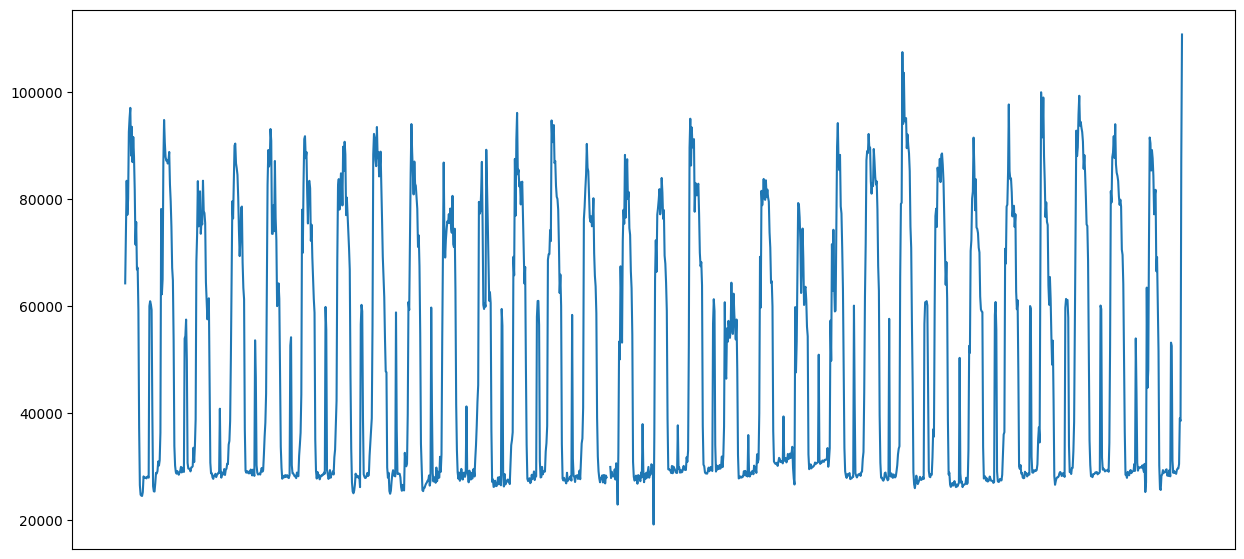

In [515]:
ax = data['Consumption'].plot(figsize=(15, 7), xticks=[])


<Axes: >

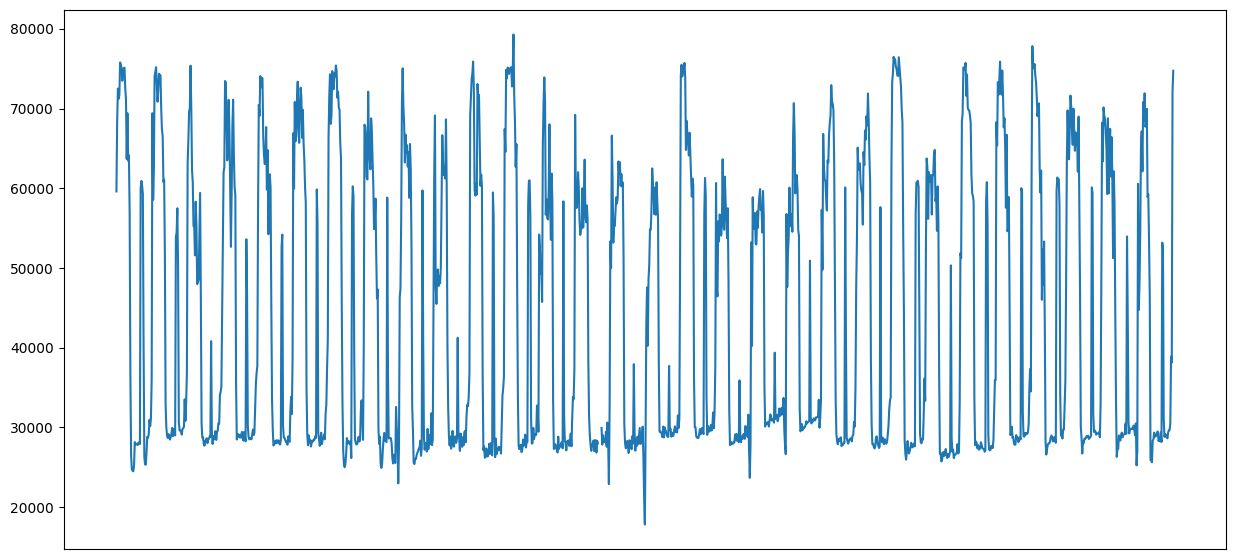

In [516]:
data['Grid consumption'].plot(figsize=(15, 7), xticks=[])

<Axes: >

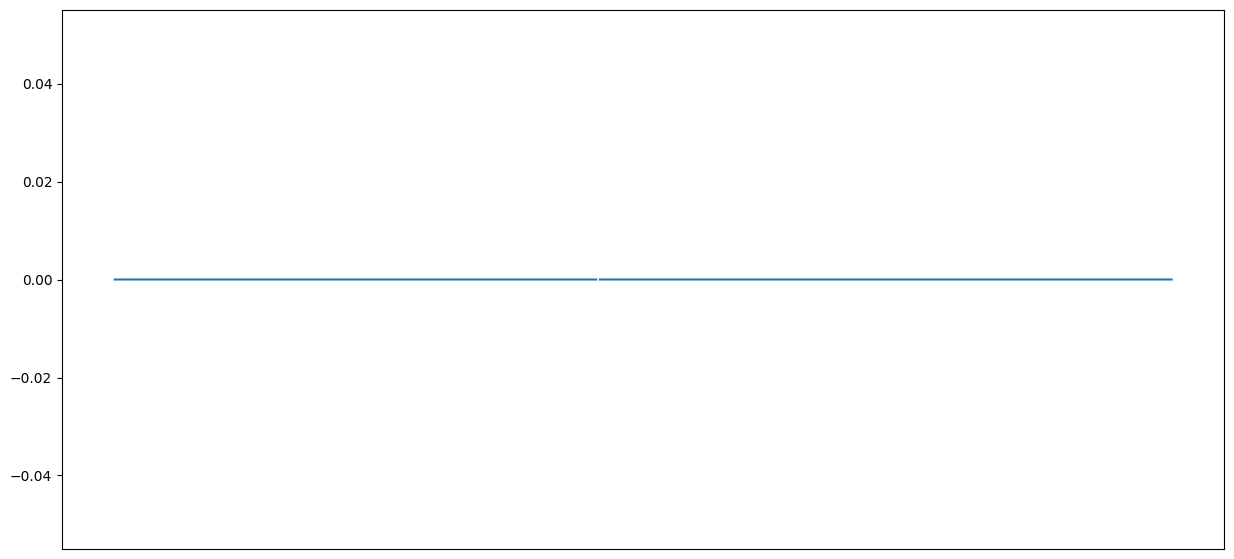

In [517]:
data['Grid backflow'].plot(figsize=(15, 7), xticks=[])

<Axes: >

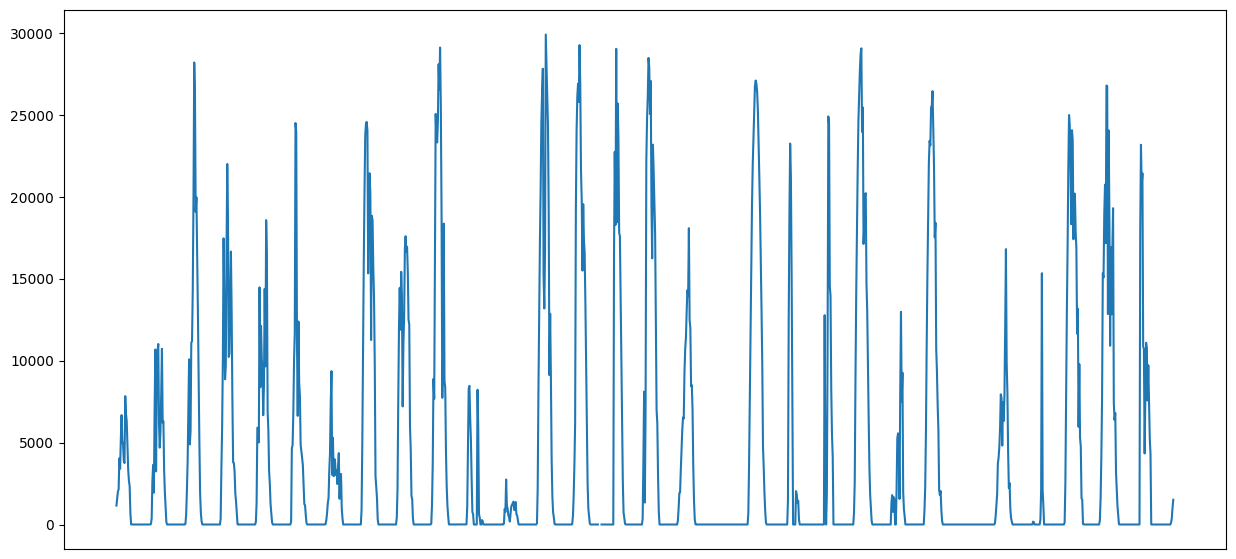

In [518]:
data['PV generation'].plot(figsize=(15, 7), xticks=[])

<Axes: >

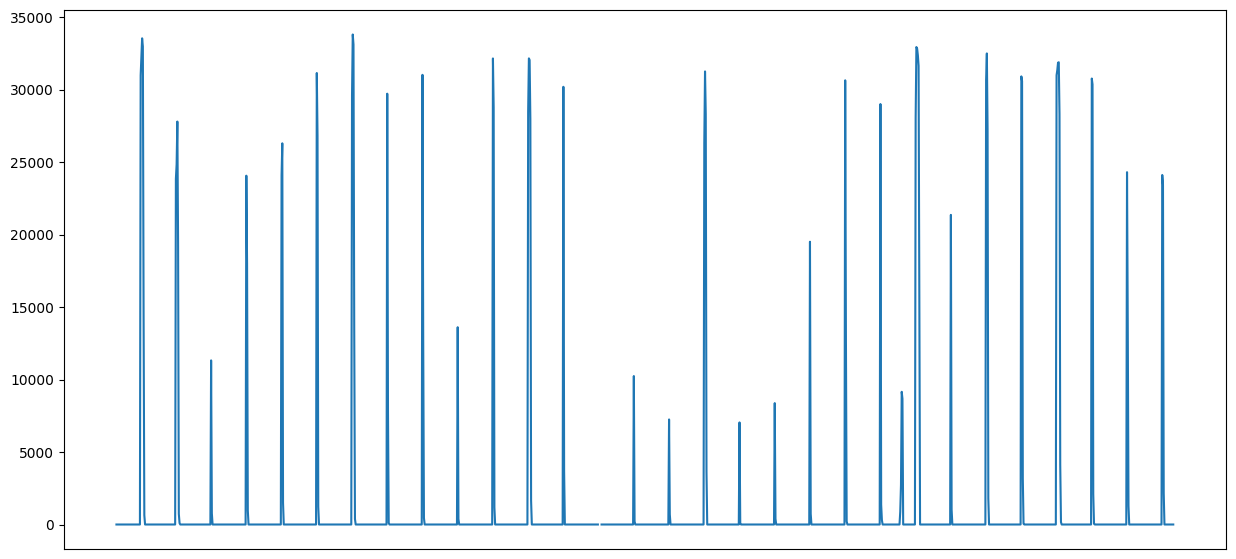

In [519]:
data['Battery charging'].plot(figsize=(15, 7), xticks=[])

<Axes: >

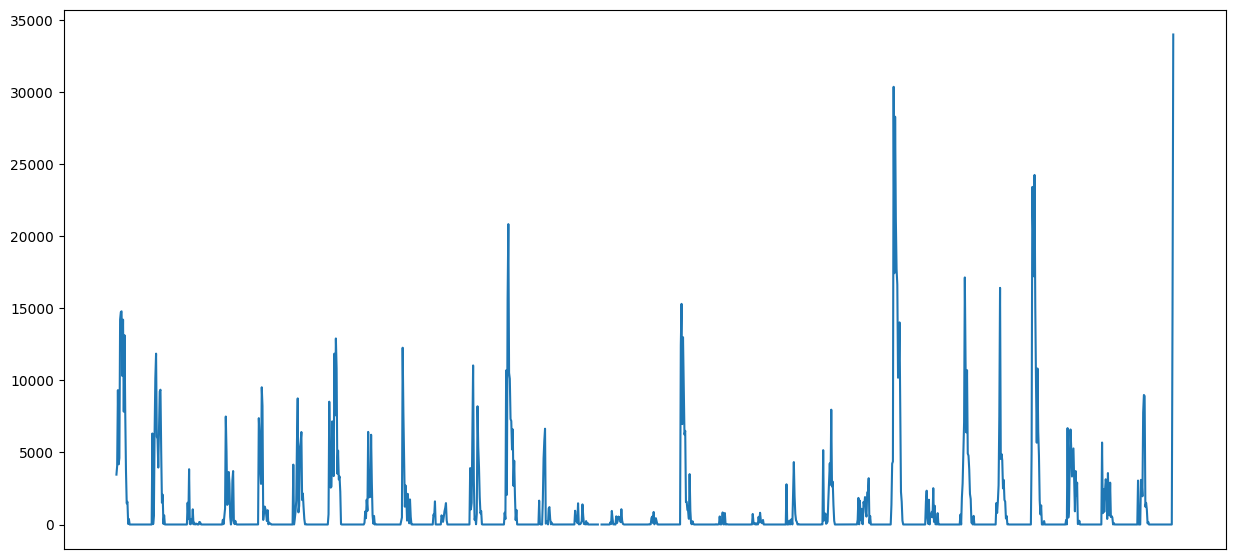

In [520]:
data['Battery discharging'].plot(figsize=(15, 7), xticks=[])

## Plot distribution

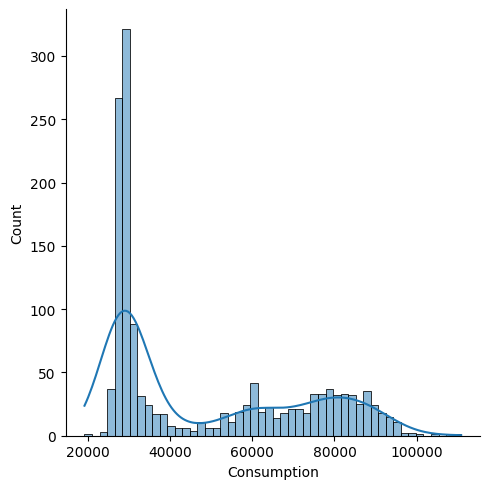

In [521]:
sns.displot(data['Consumption'], kde=True, bins=50)

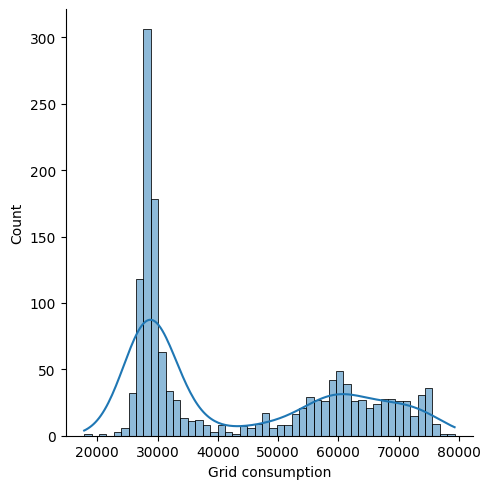

In [522]:
sns.displot(data['Grid consumption'], kde=True, bins=50)

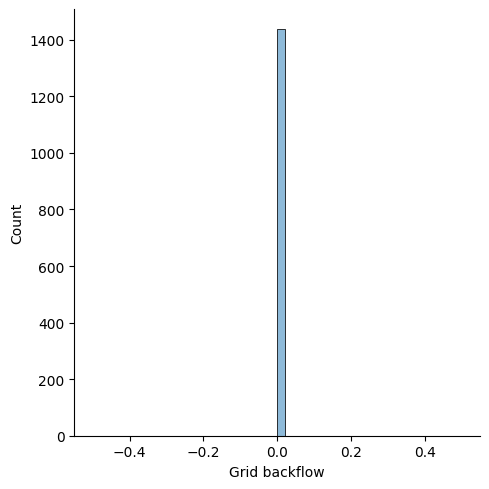

In [523]:
sns.displot(data['Grid backflow'], kde=True, bins=50)

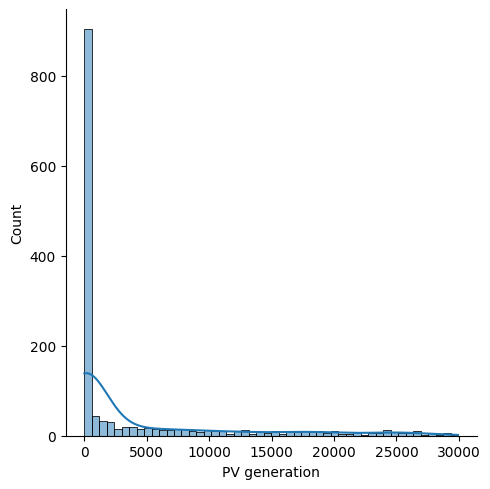

In [524]:
sns.displot(data['PV generation'], kde=True, bins=50)

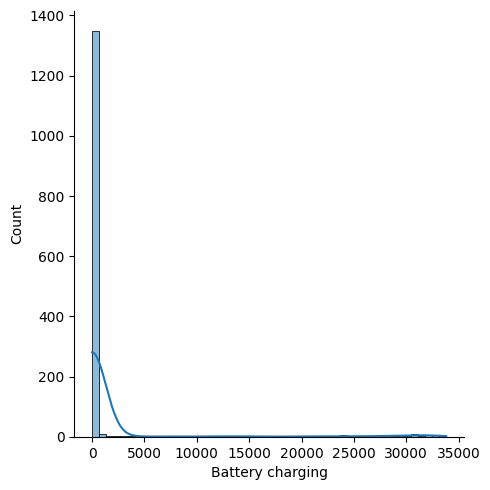

In [525]:
sns.displot(data['Battery charging'], kde=True, bins=50)

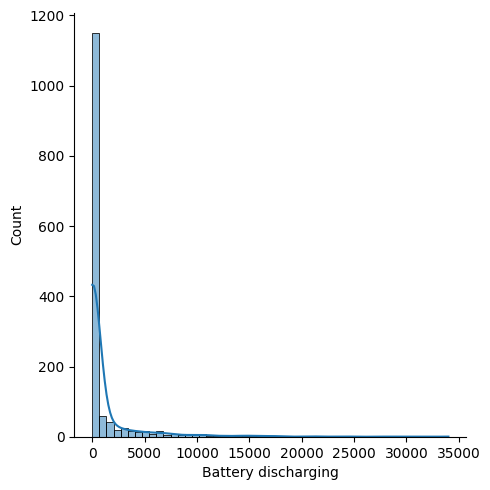

In [526]:
sns.displot(data['Battery discharging'], kde=True, bins=50)

## Lets deal with missing values

In [527]:
# We can see that we are not missing any values
missing = pd.DataFrame()
missing['Time_diff'] = data['Time'].diff()
missing.loc[missing['Time_diff'] != pd.Timedelta(minutes=30)]

Time_diff
0       NaT

In [528]:
missing = {}

for column in data:
    missing[column] = data[data[column].isna()].index.to_list()

for key, value in missing.items():
    if len(value) == 0:
        continue
    start_index = value[0] - 1
    end_index = value[-1] + 1

    start_value = data[key][start_index]
    end_value = data[key][end_index]

    fill_data = float((end_value - start_value) / (len(value) + 1))
    new_value = start_value + fill_data
    for item in value:
        data.at[item, key] = new_value
        new_value += fill_data

In [529]:
data[data['Consumption'].isna()]

Empty DataFrame
Columns: [Time, Consumption, Grid consumption, Grid backflow, PV generation, Battery charging, Battery discharging]
Index: []

## Lets check stationarity using augmented Dickey-Fuller test

In [530]:
columns = [i for i in data.columns if i not in ['Time']]

for column in columns:
    try:
        _, pval, _, _, _, _ = adfuller(data[column])
        if pval < 0.05:
            print(f"{column} is stationary.")
        else:
            print(f"{column} is not stationary.")
    except ValueError:
        print(f"{column} skipped because it is constant.")


Consumption is stationary.
Grid consumption is stationary.
Grid backflow skipped because it is constant.
PV generation is stationary.
Battery charging is stationary.
Battery discharging is stationary.


We can see that data are either stationary, or constant, so we dont need to apply any more methods to make data stationaty.

## Now lets focus on trend and seasonality

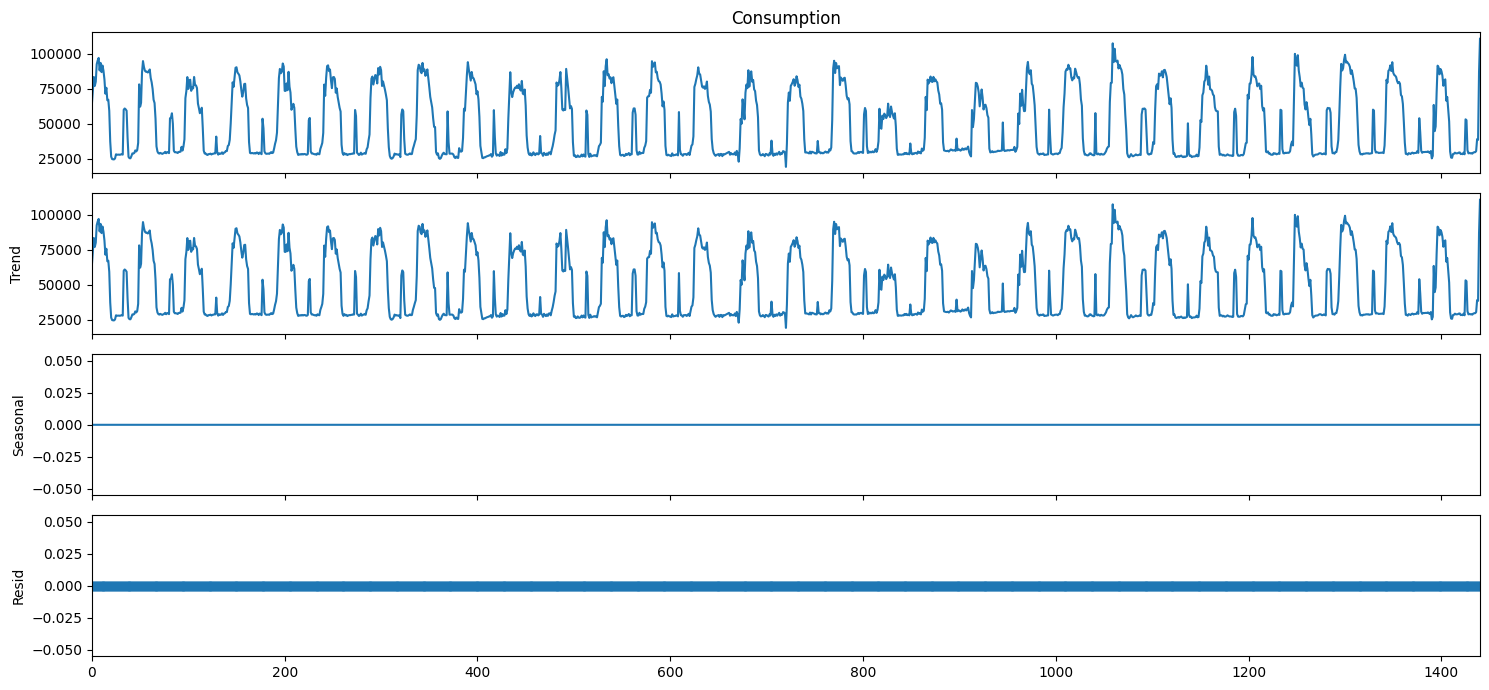

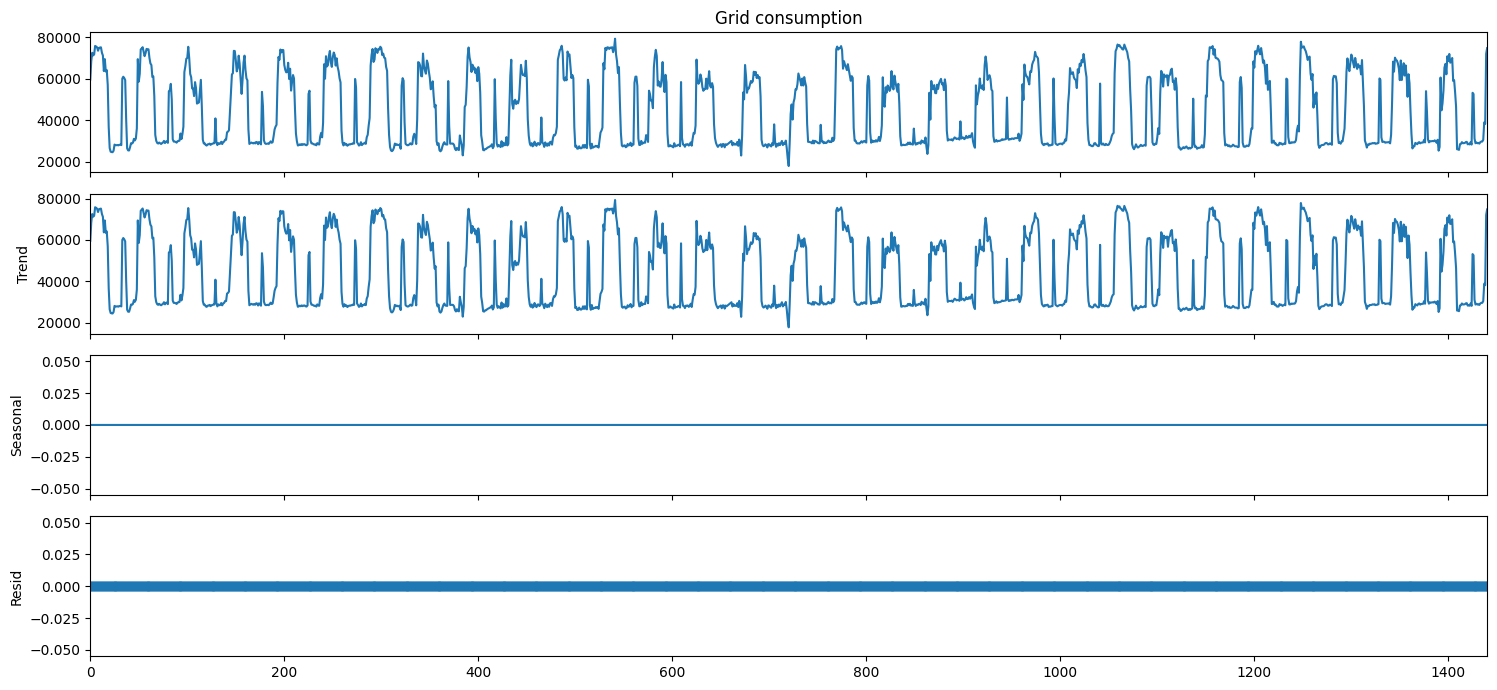

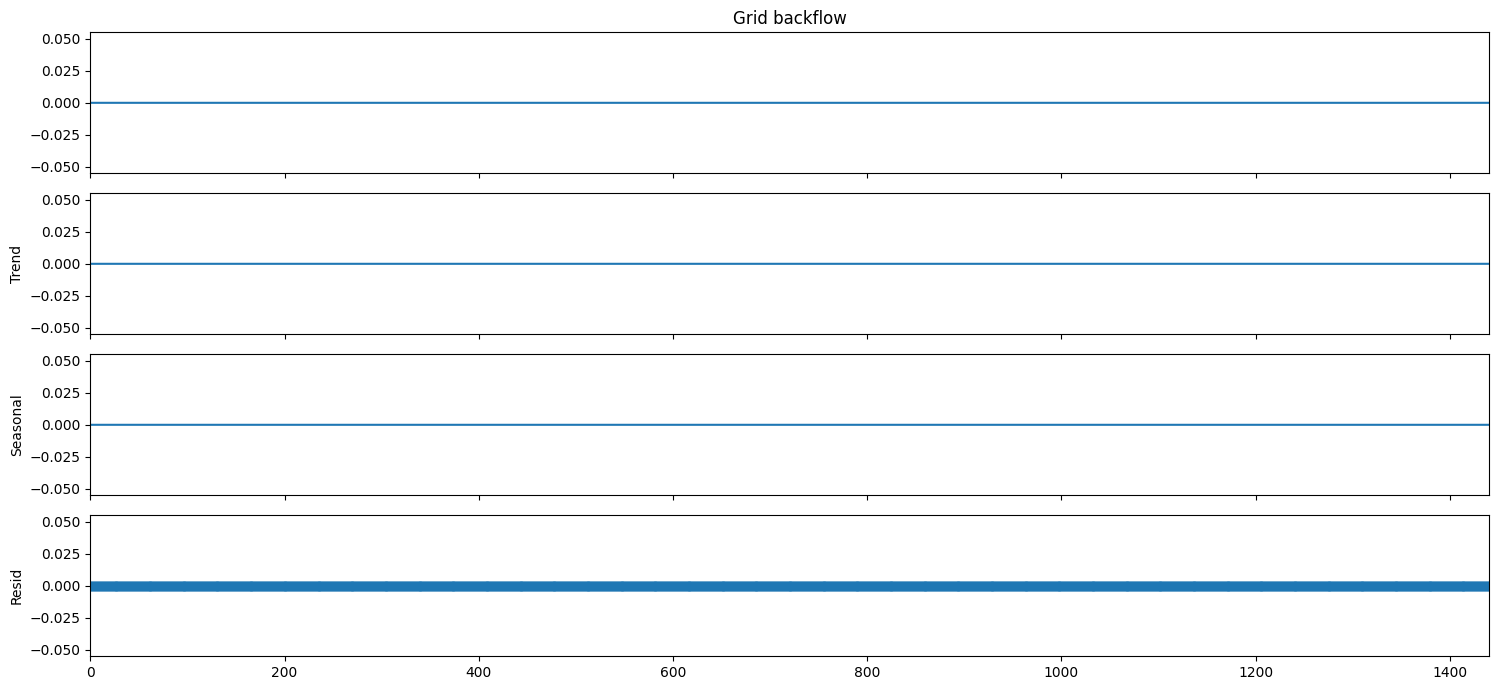

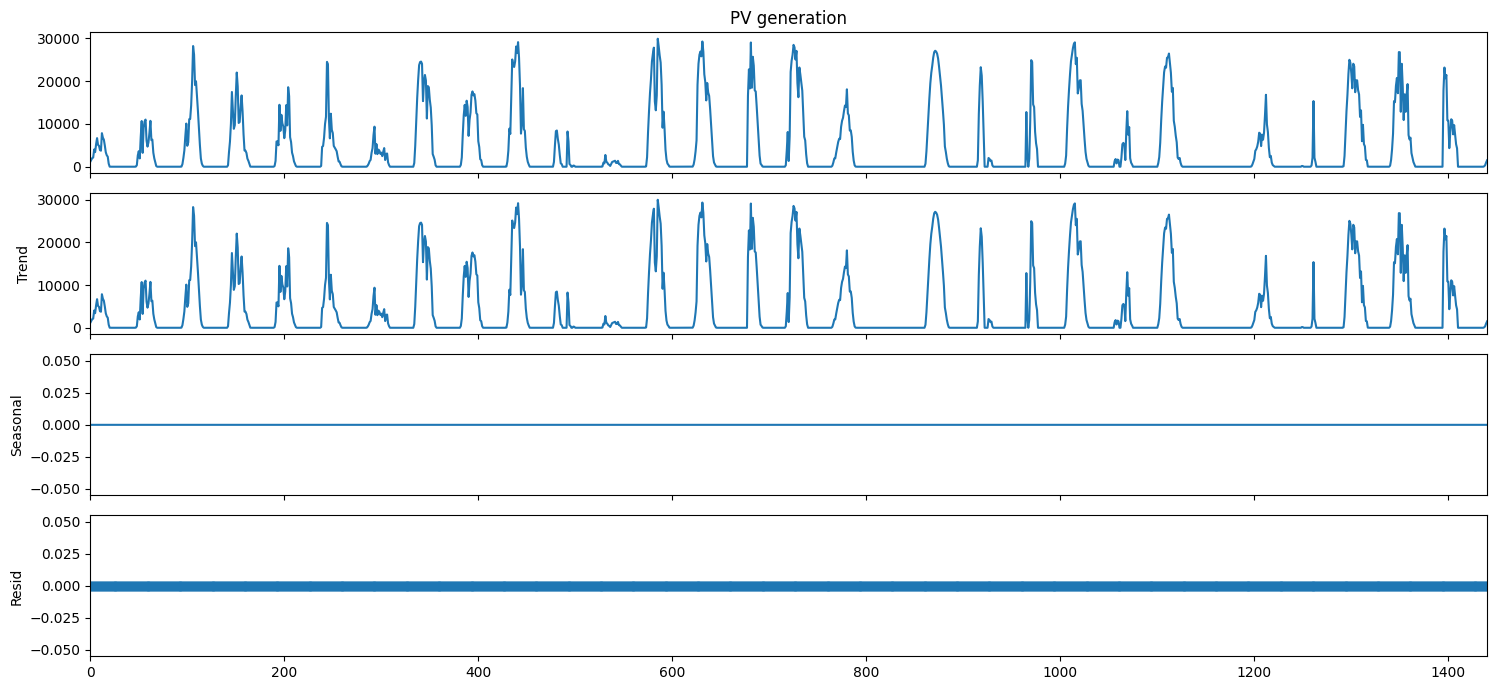

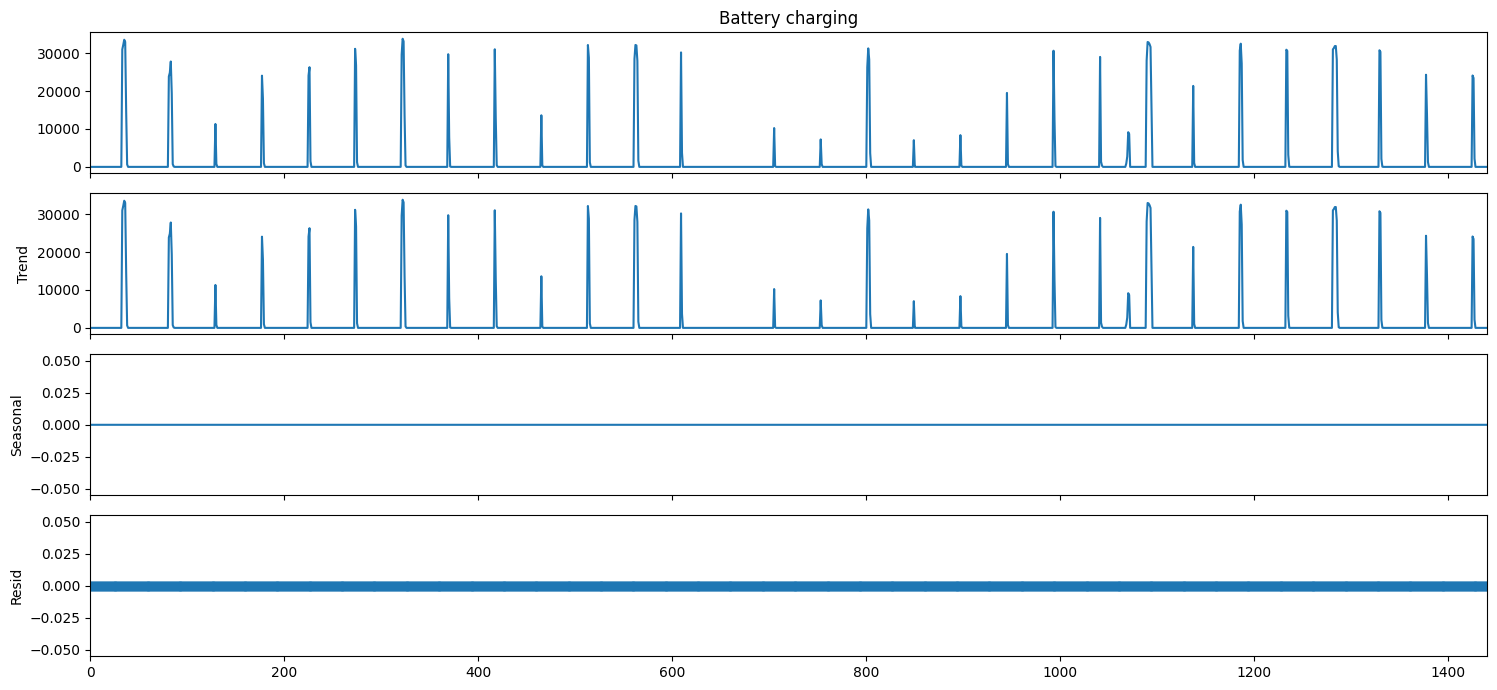

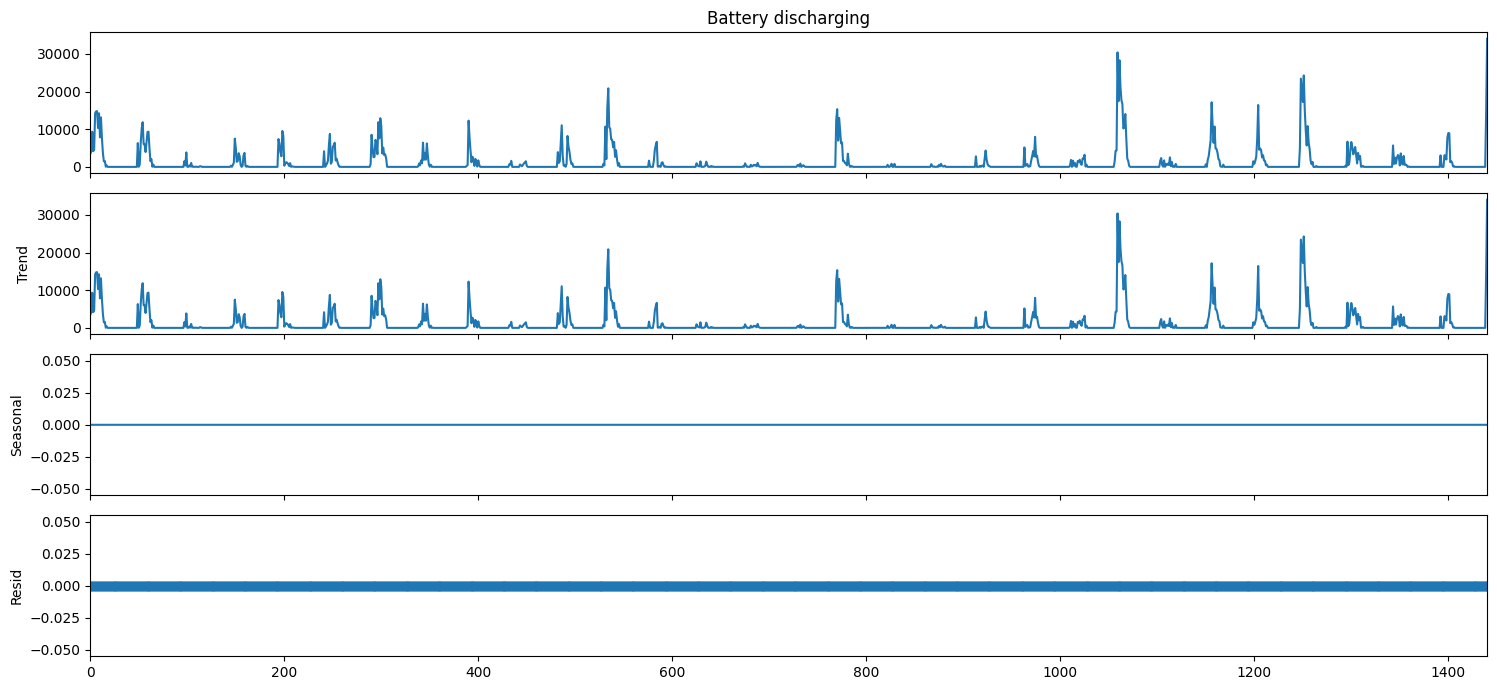

In [531]:
for column in columns:
    result_add = seasonal_decompose(x=data[column], model='additive', extrapolate_trend='freq', period=1)
    plt.rcParams.update({'figure.figsize': (15, 7)})
    result_add.plot()
    plt.show()

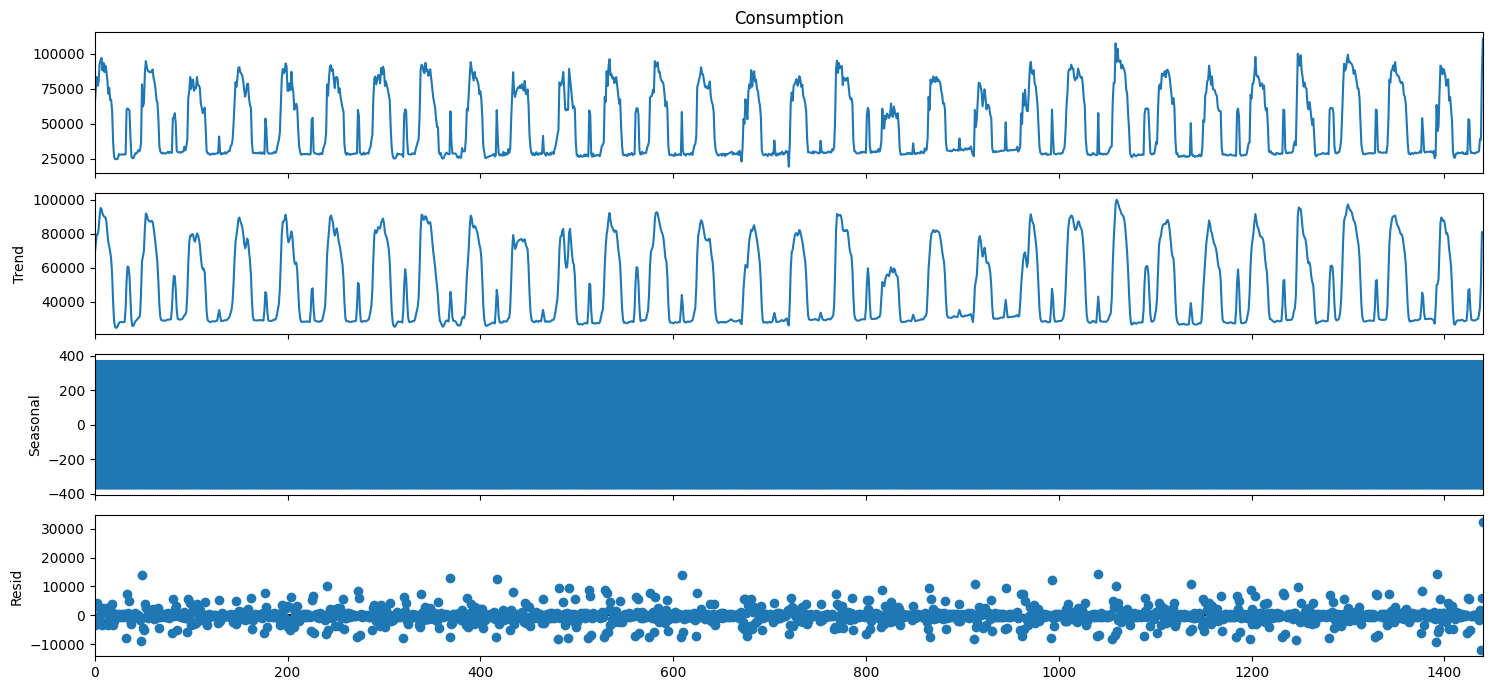

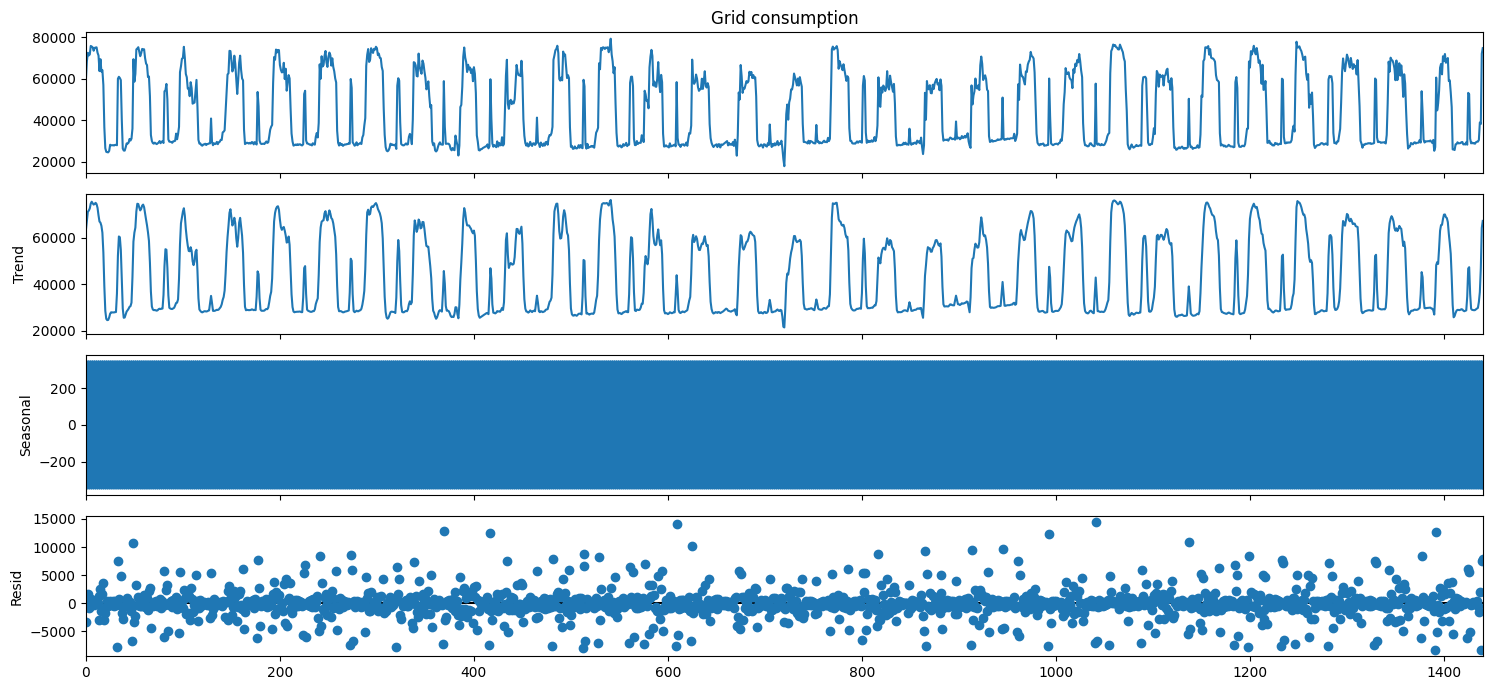

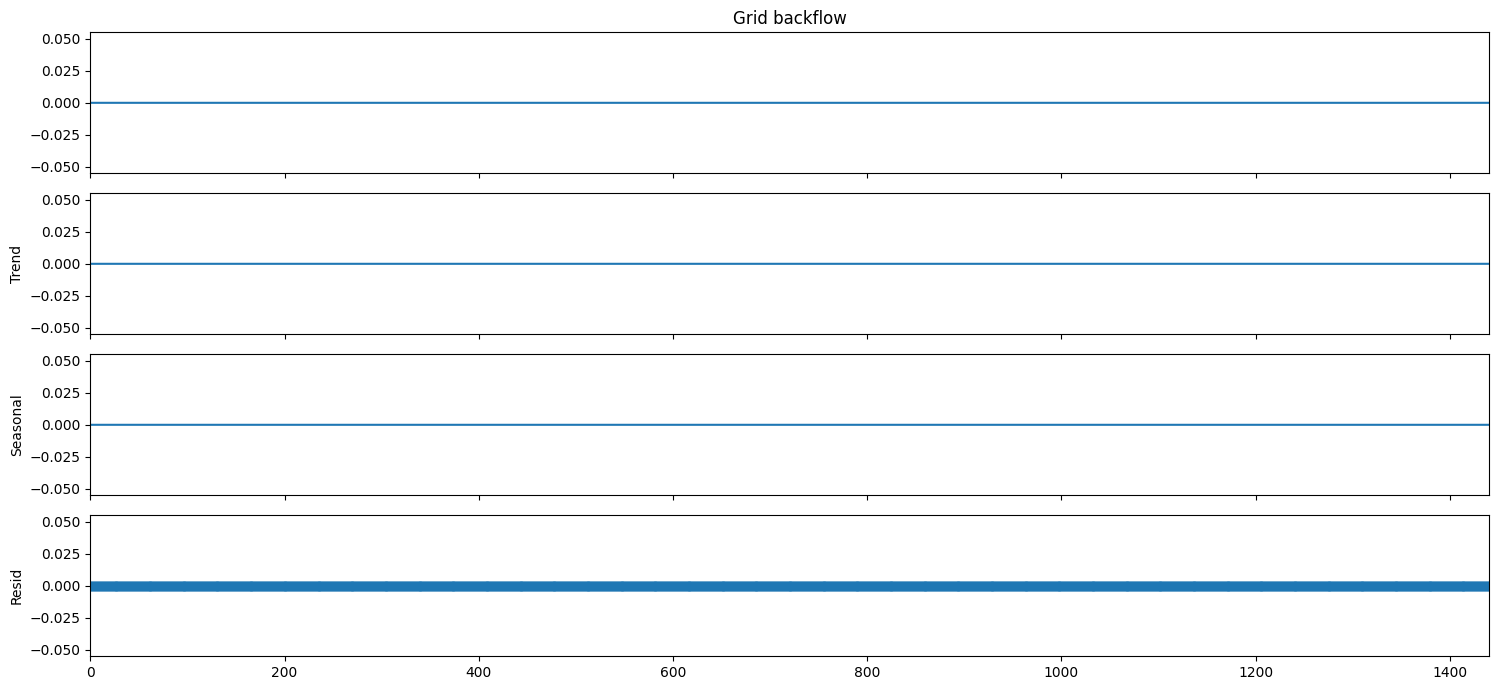

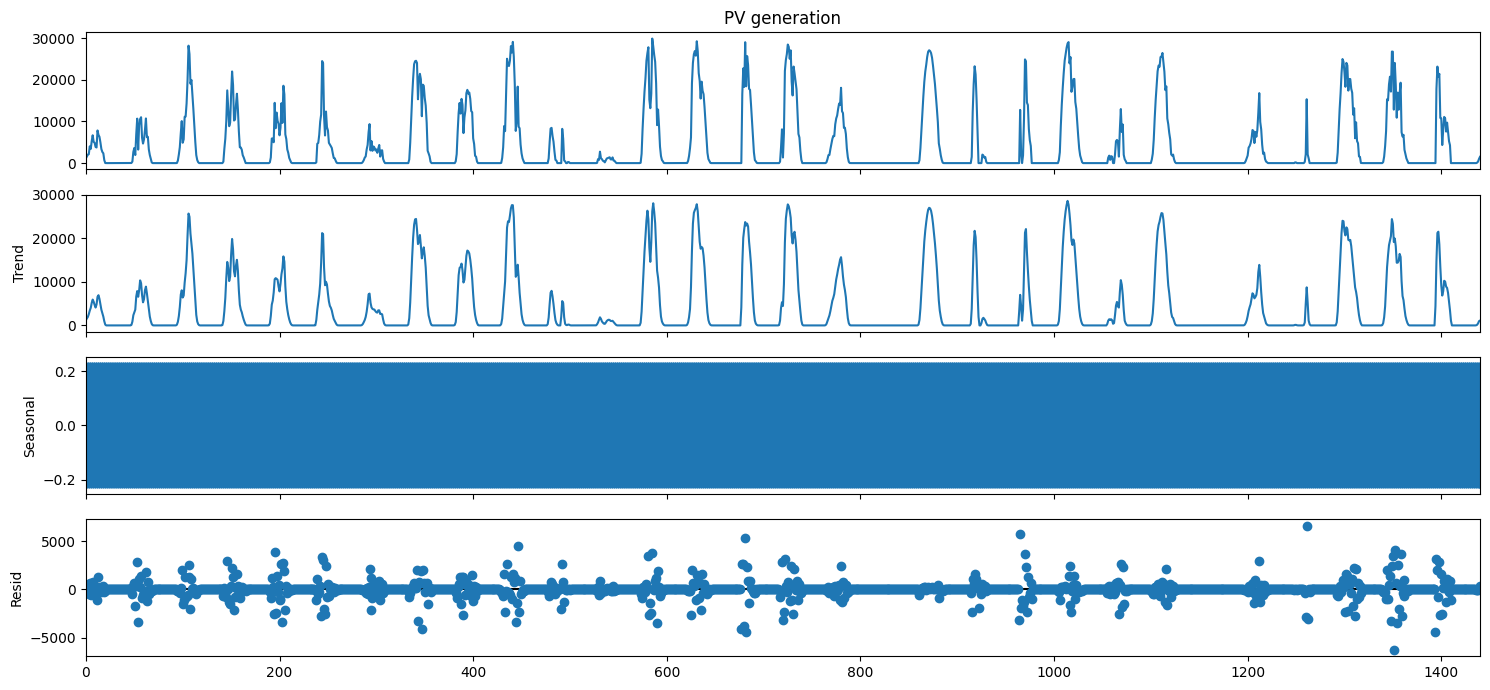

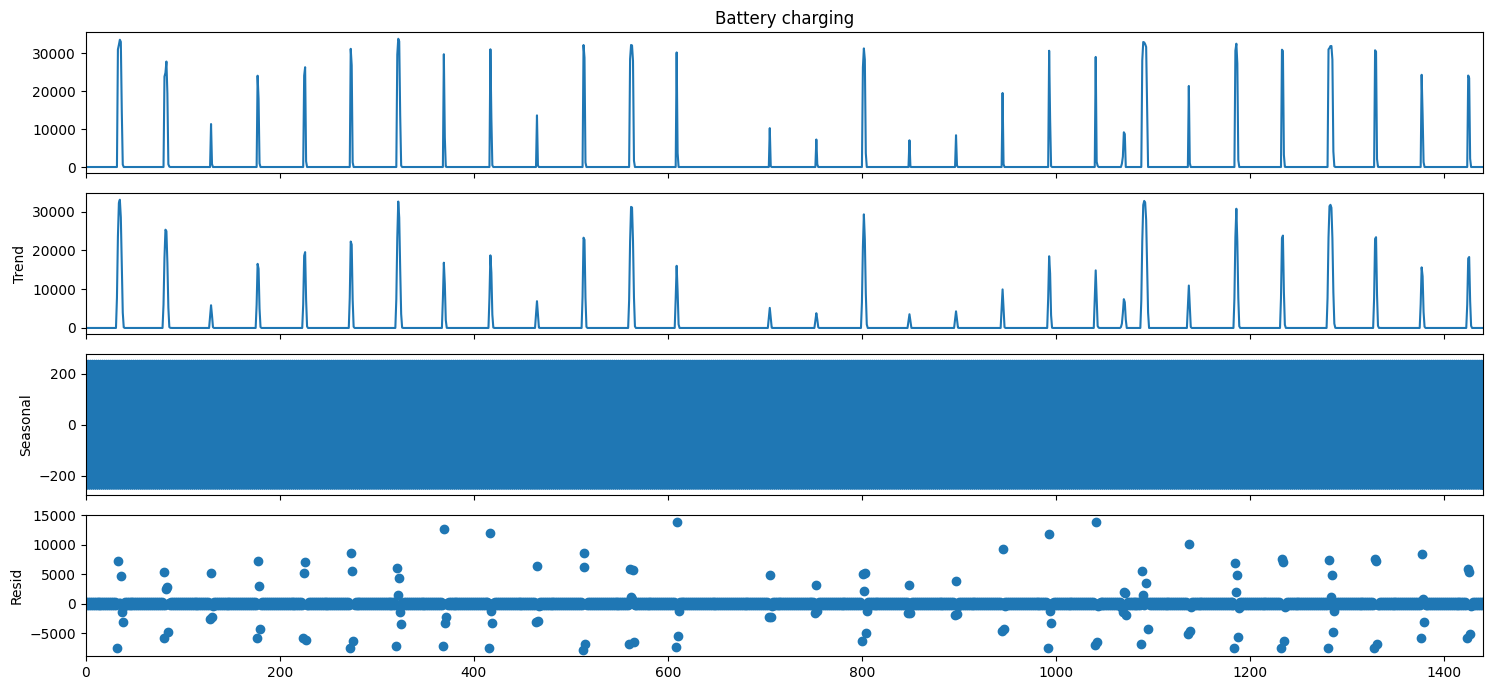

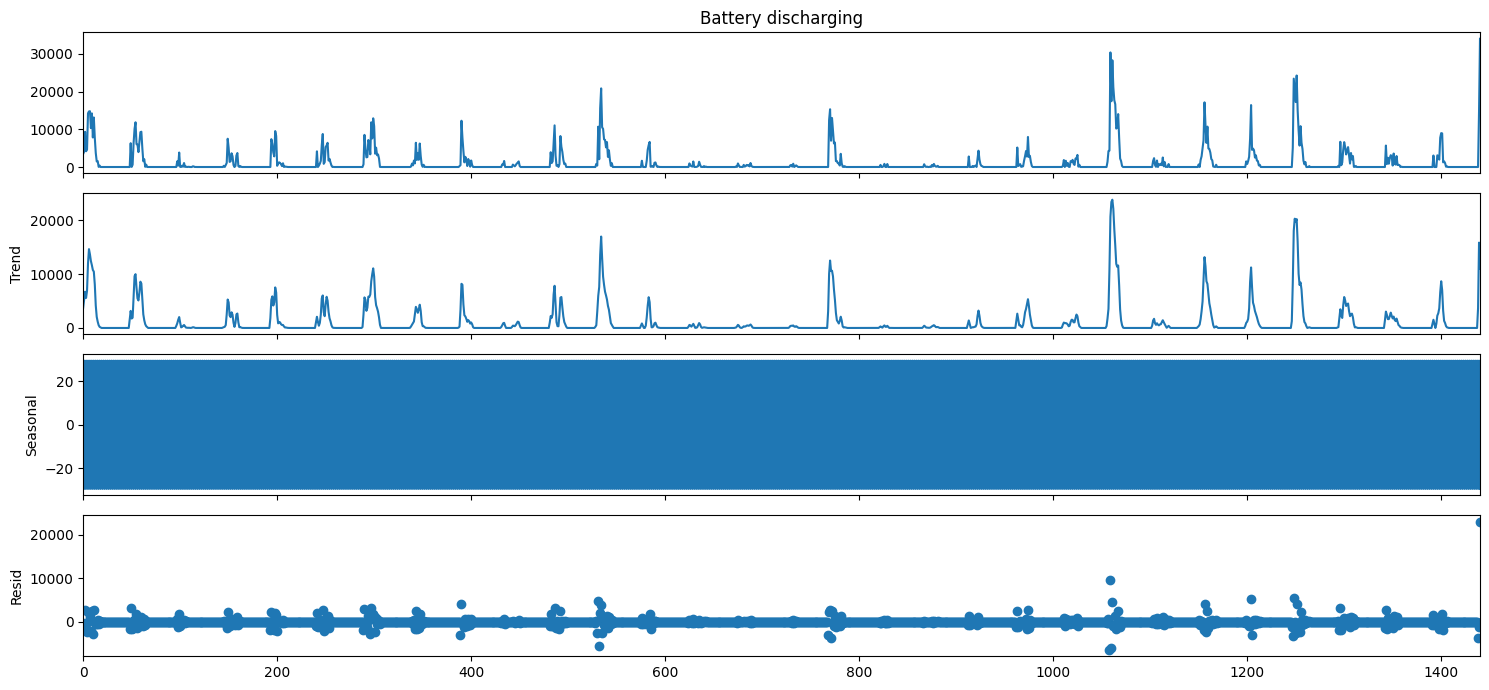

In [532]:
for column in columns:
    result_add = seasonal_decompose(x=data[column], model='additive', extrapolate_trend='freq', period=2)
    plt.rcParams.update({'figure.figsize': (15, 7)})
    result_add.plot()
    plt.show()

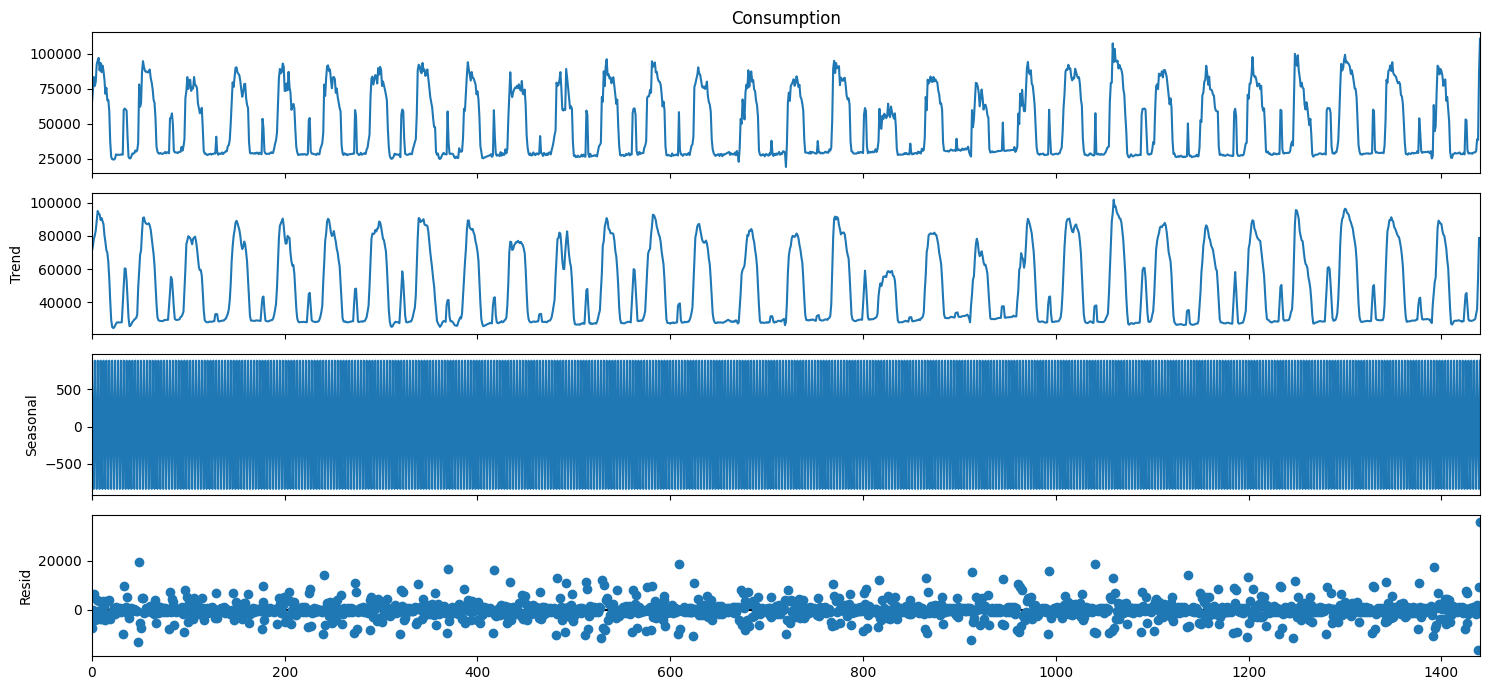

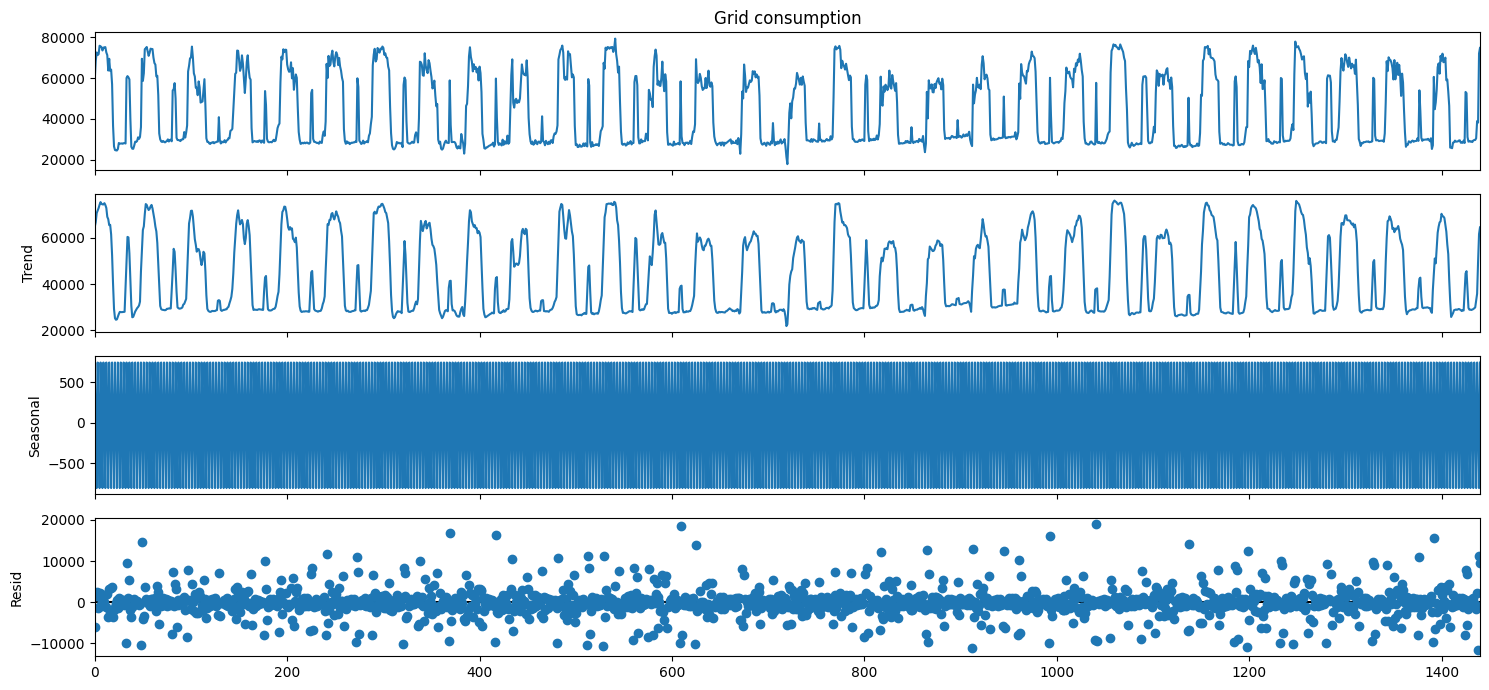

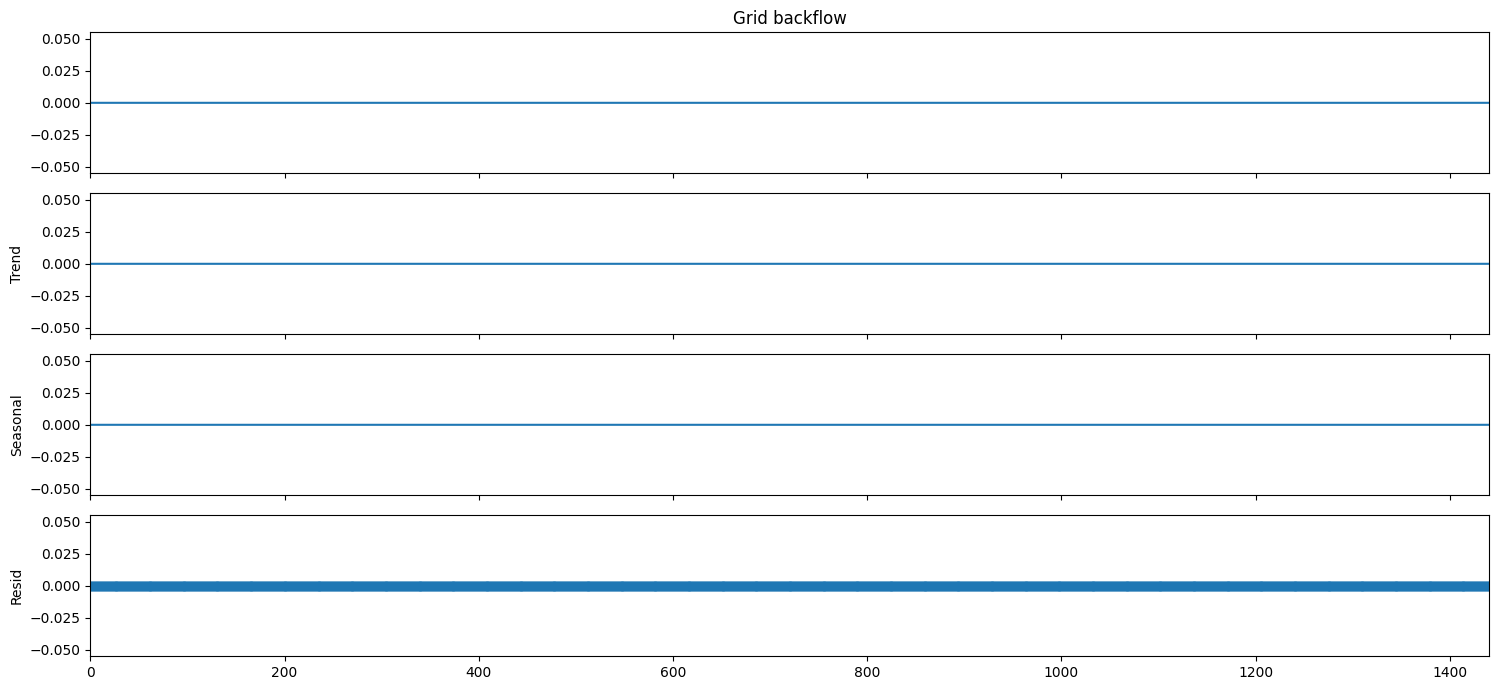

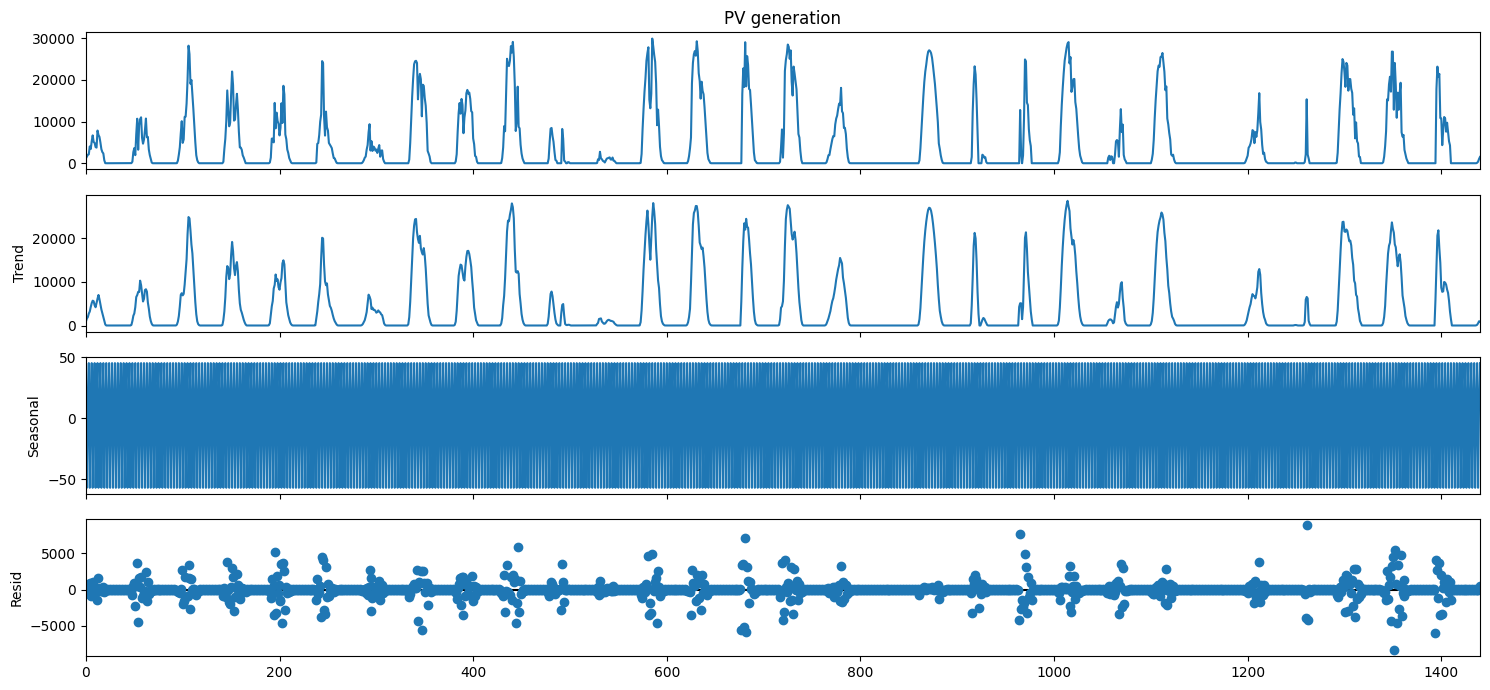

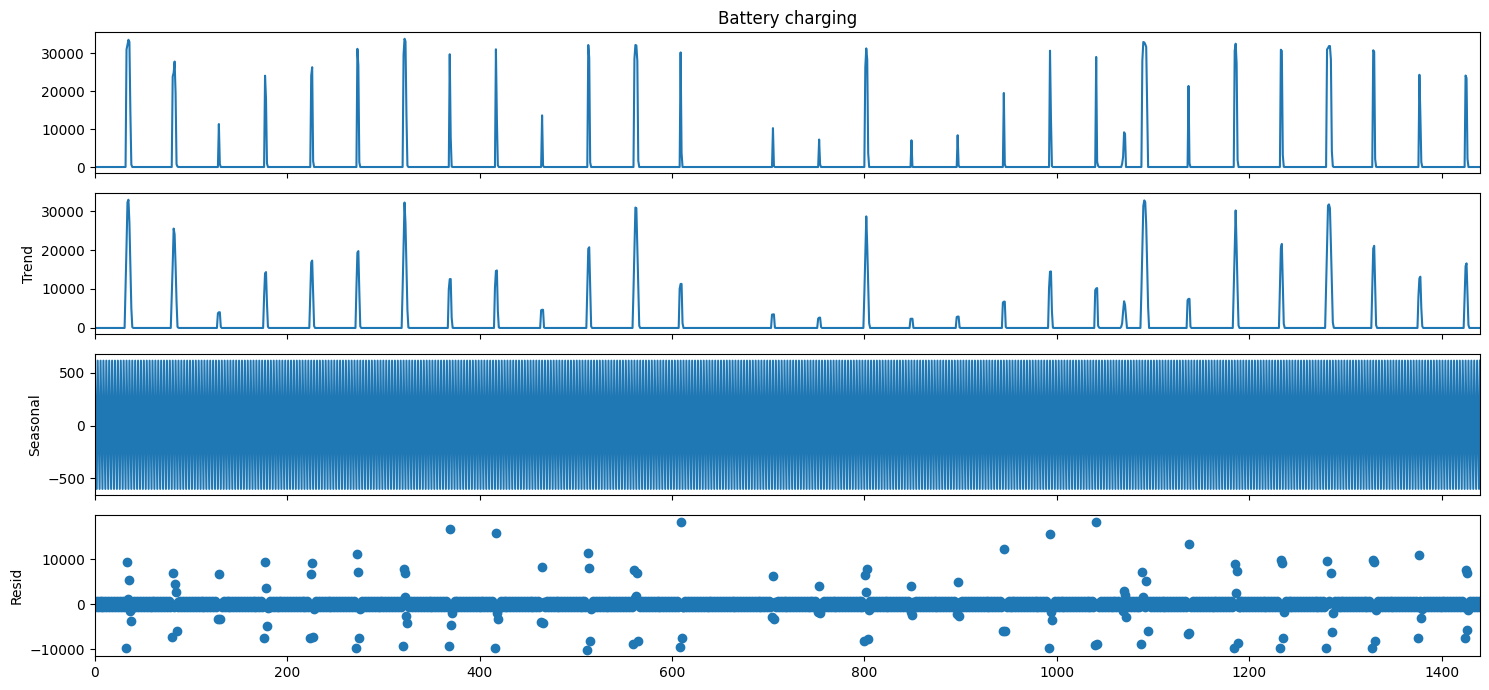

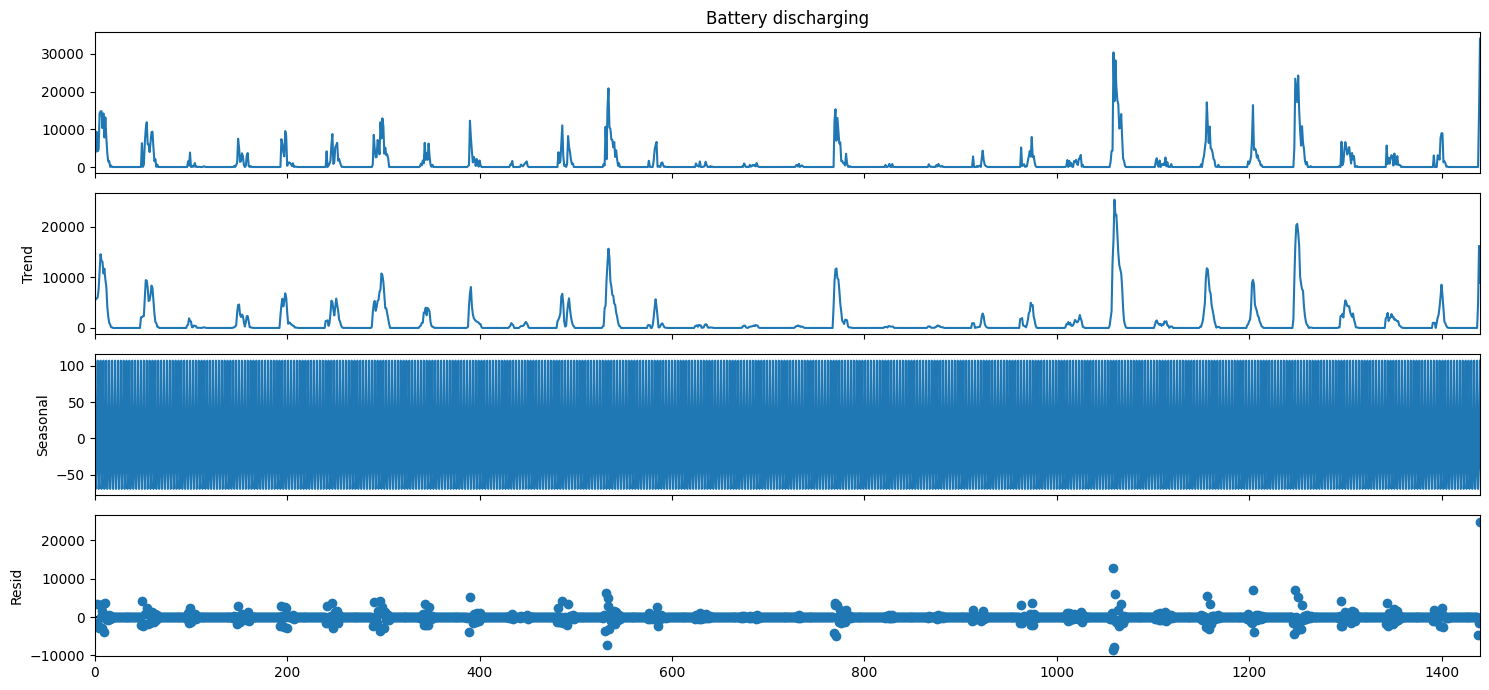

In [533]:
for column in columns:
    result_add = seasonal_decompose(x=data[column], model='additive', extrapolate_trend='freq', period=3)
    plt.rcParams.update({'figure.figsize': (15, 7)})
    result_add.plot()
    plt.show()

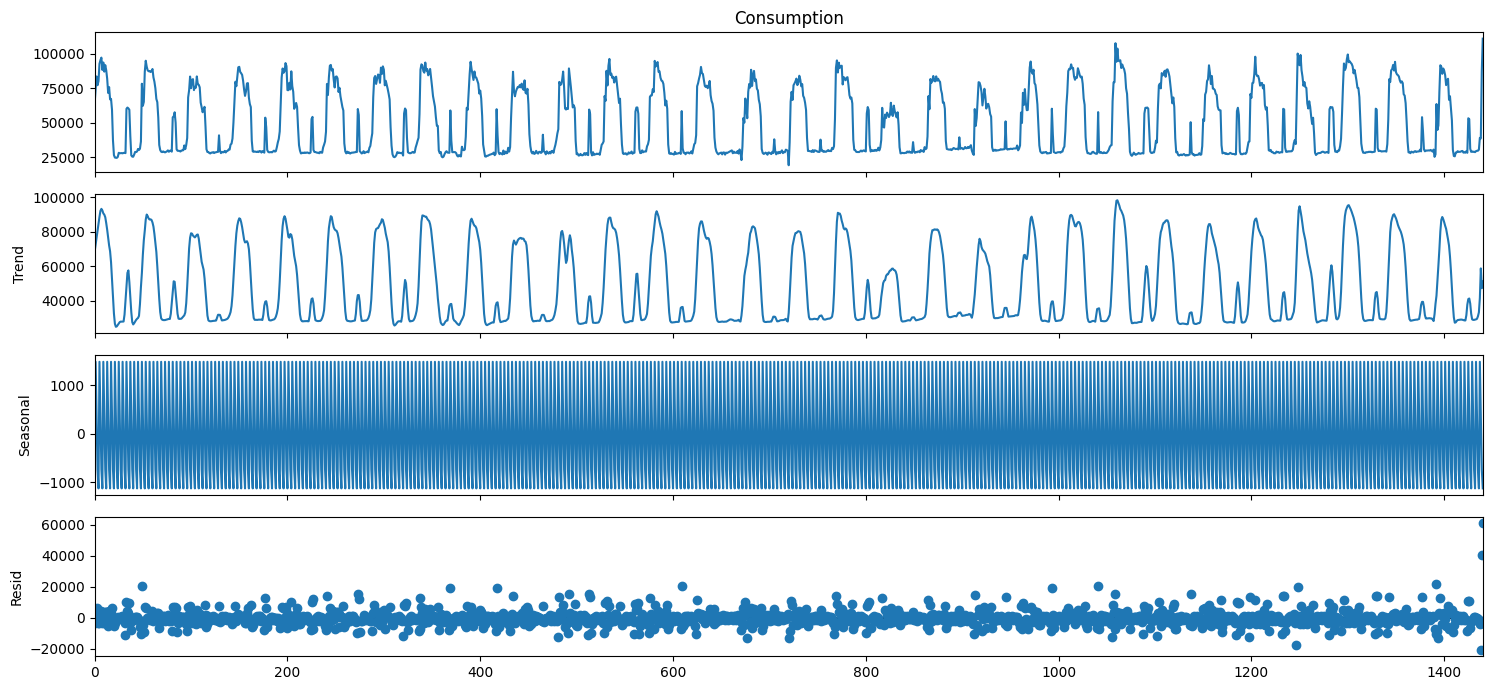

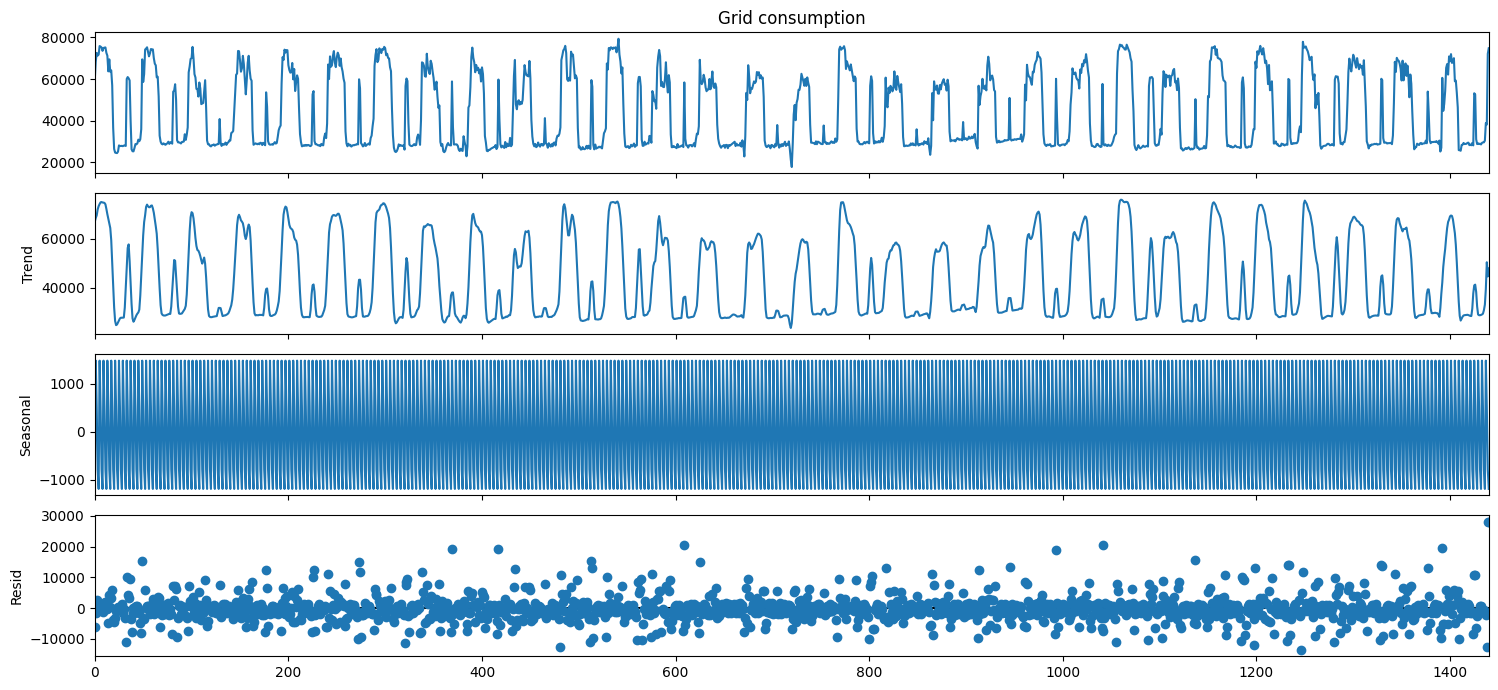

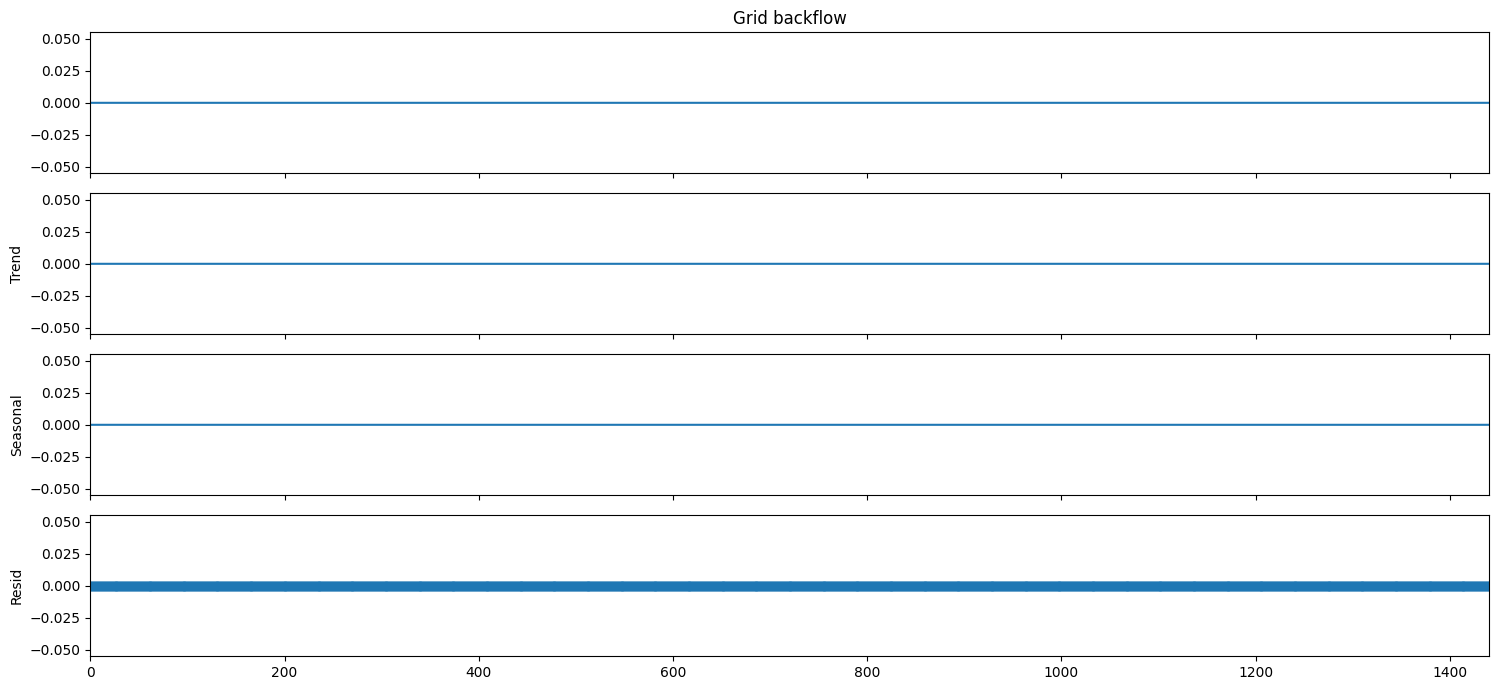

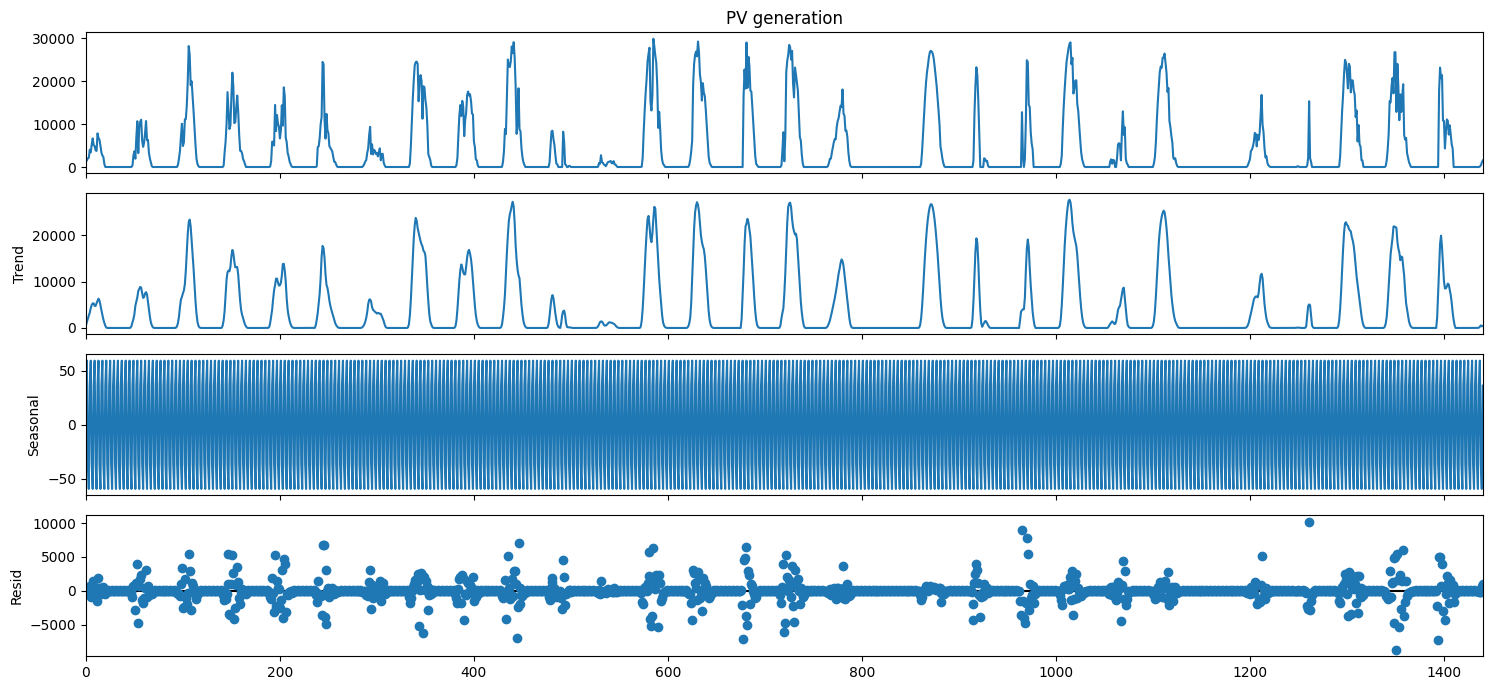

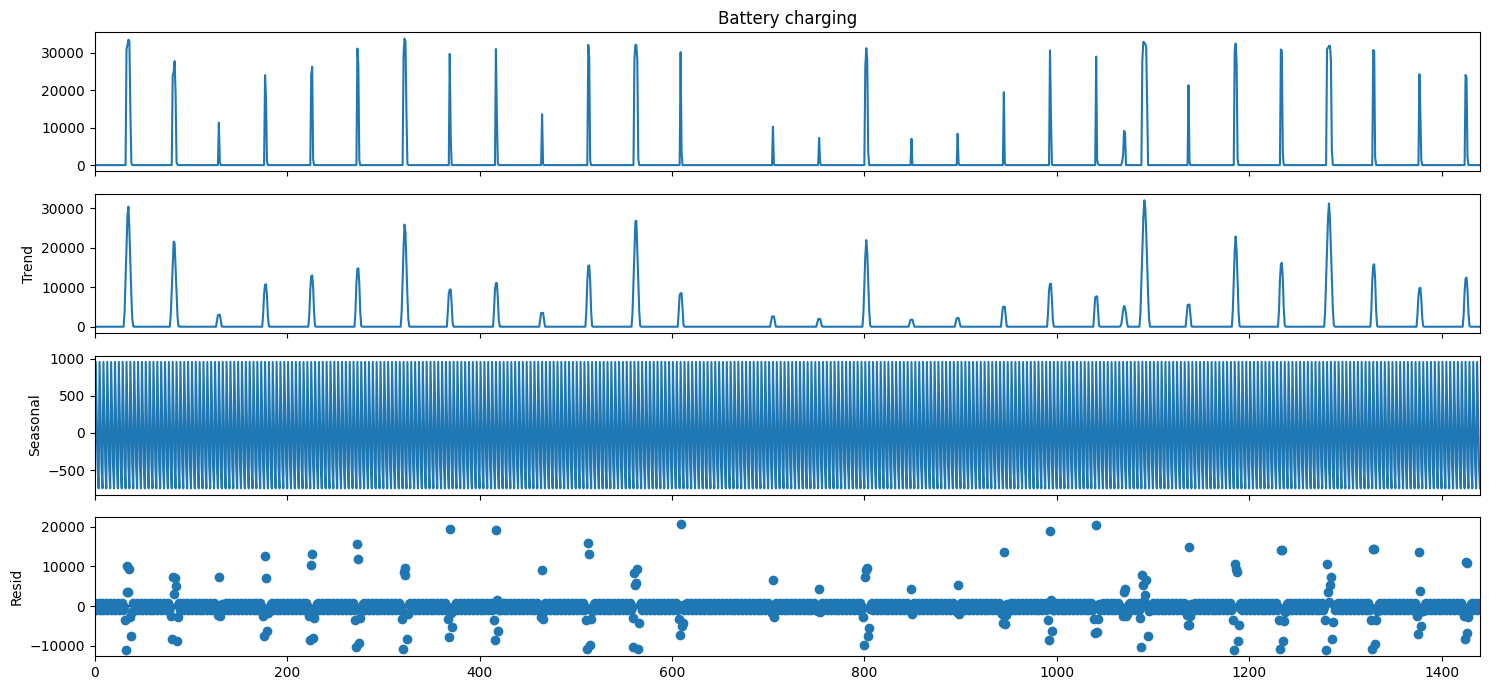

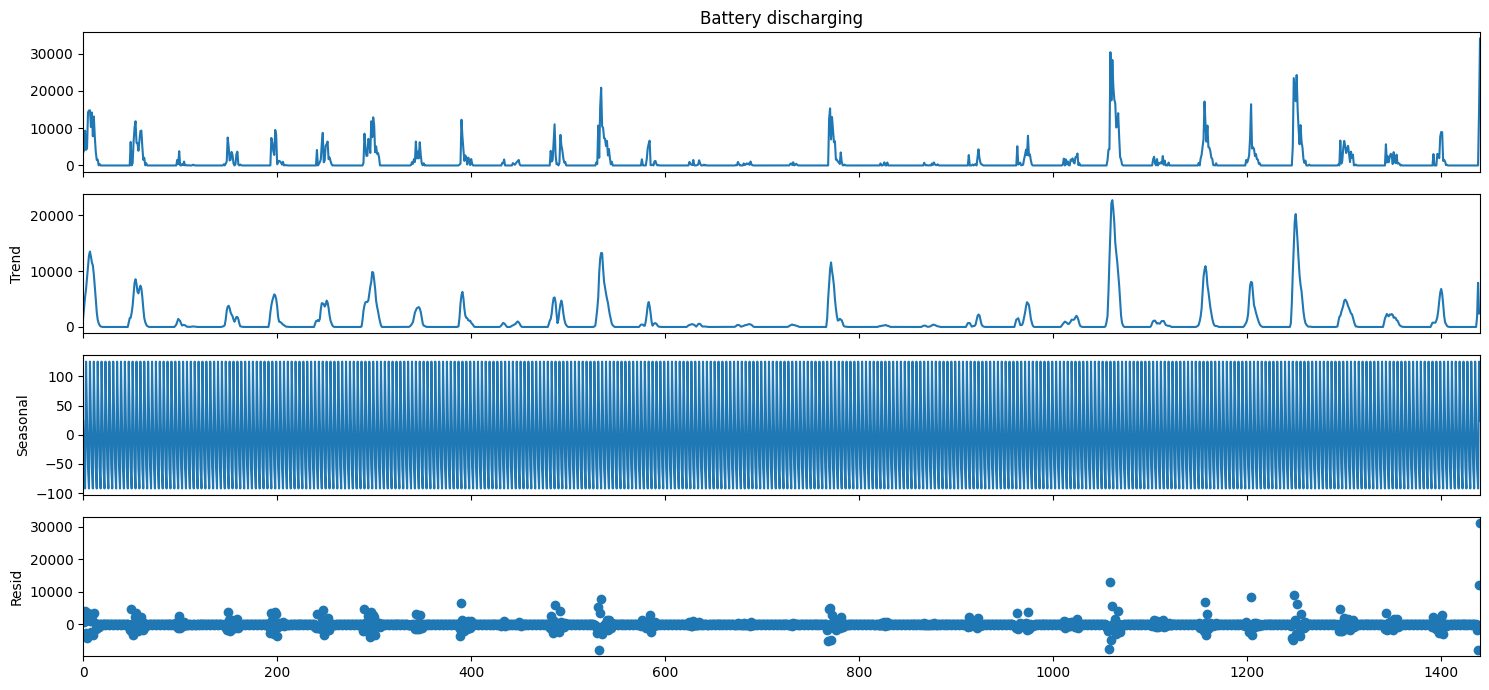

In [534]:
for column in columns:
    result_add = seasonal_decompose(x=data[column], model='additive', extrapolate_trend='freq', period=4)
    plt.rcParams.update({'figure.figsize': (15, 7)})
    result_add.plot()
    plt.show()

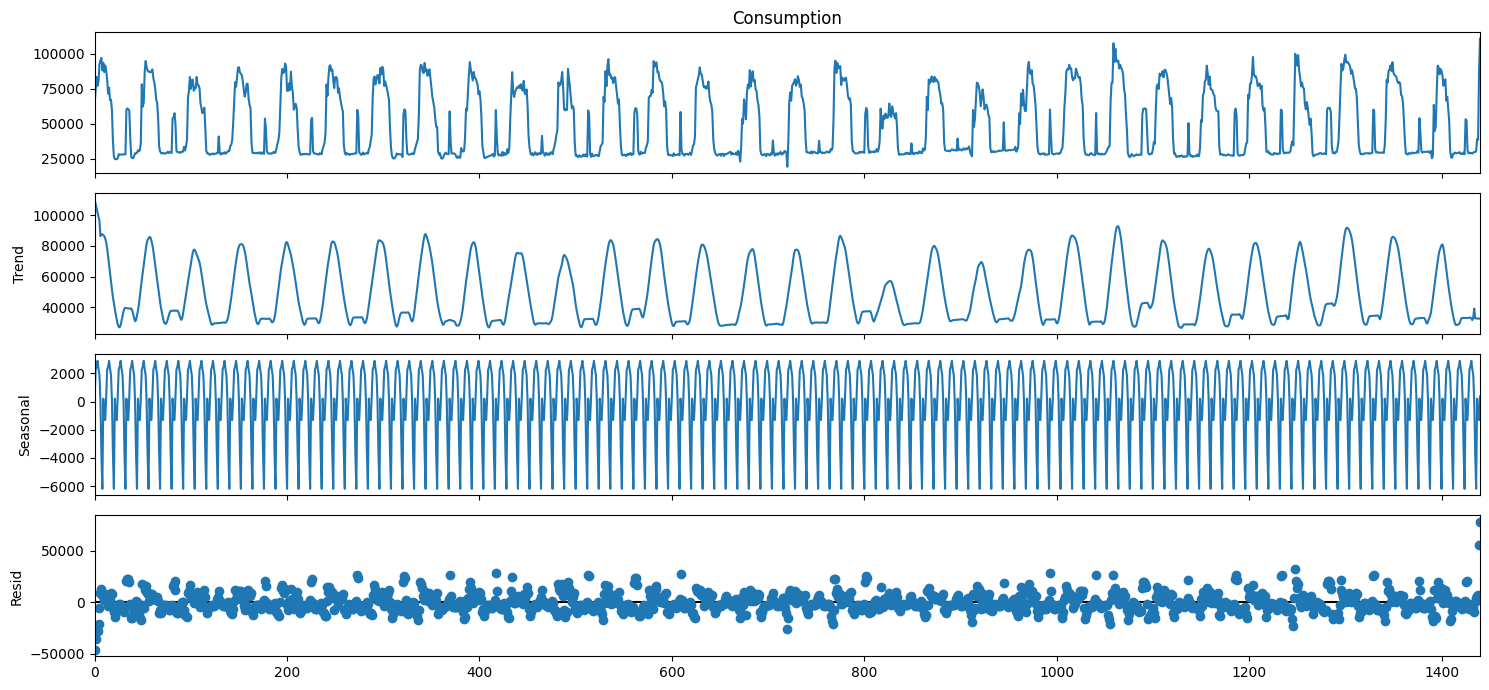

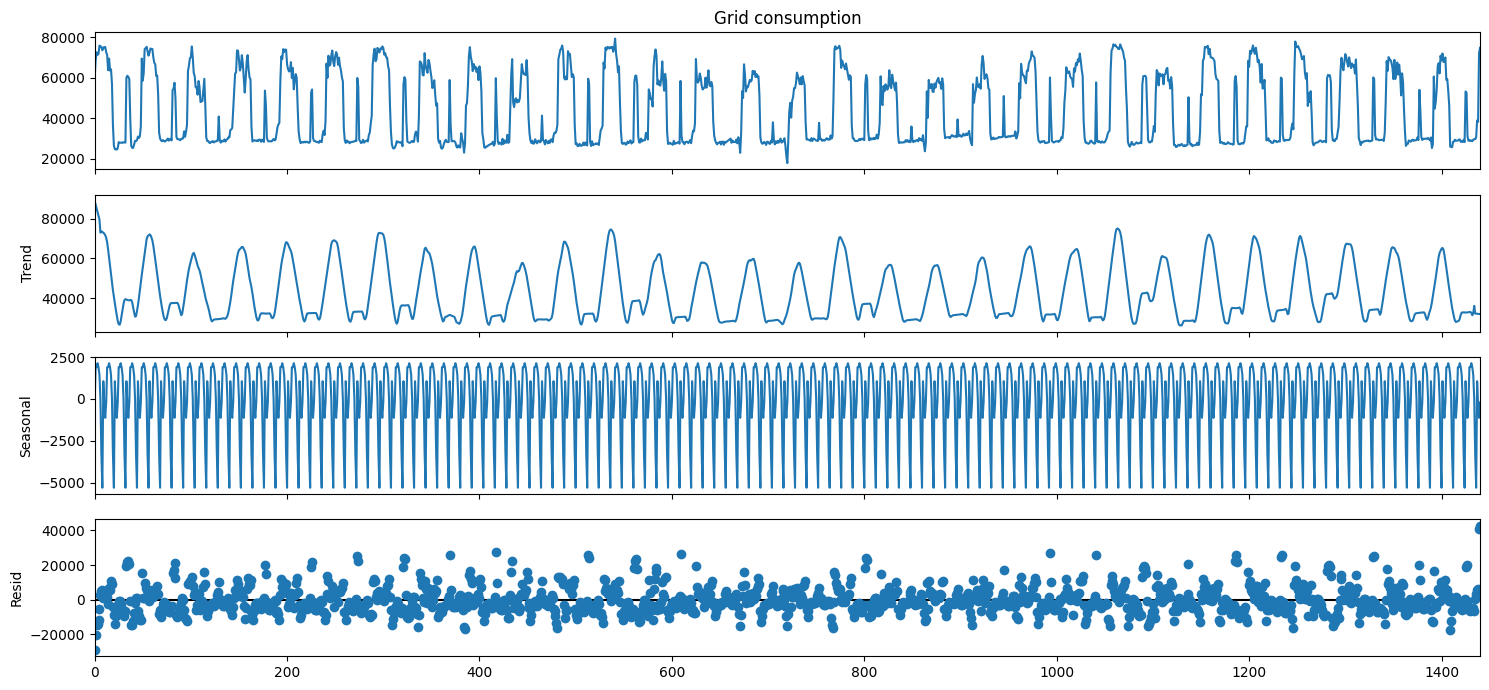

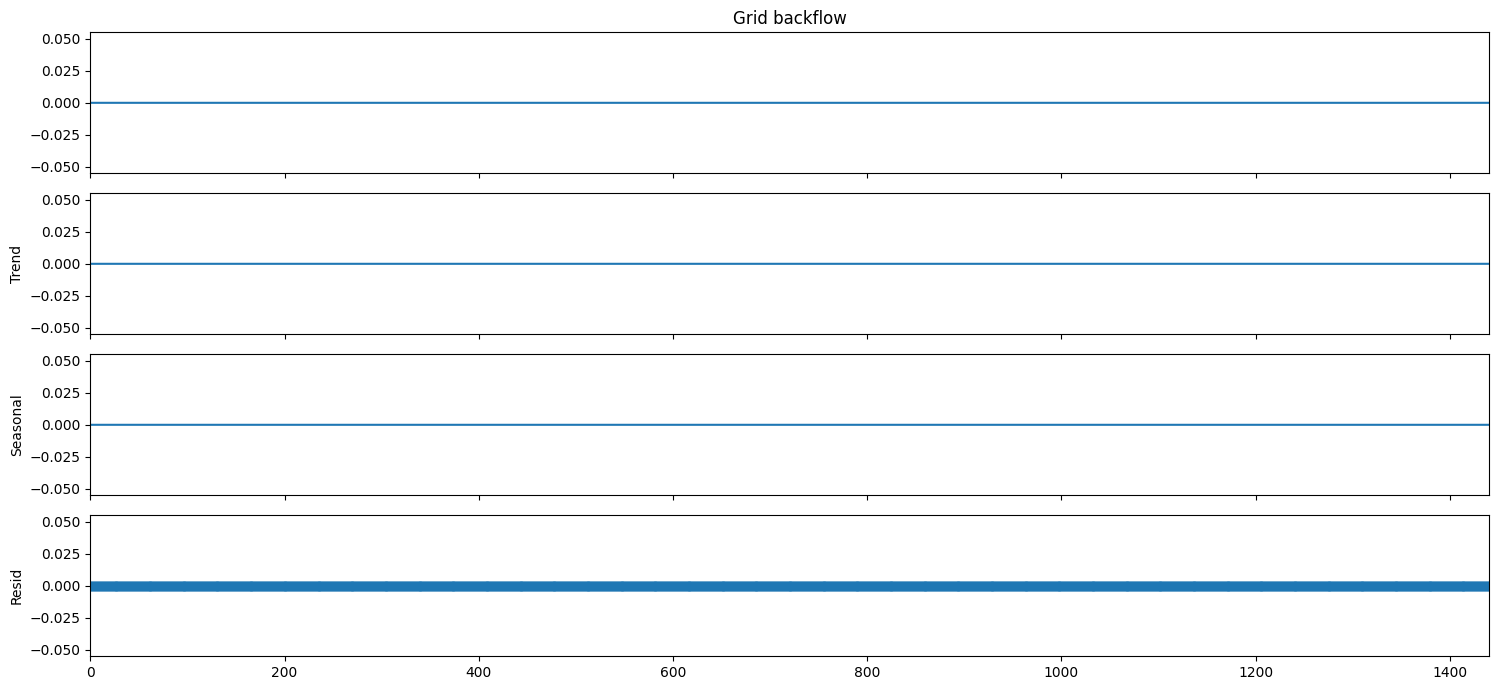

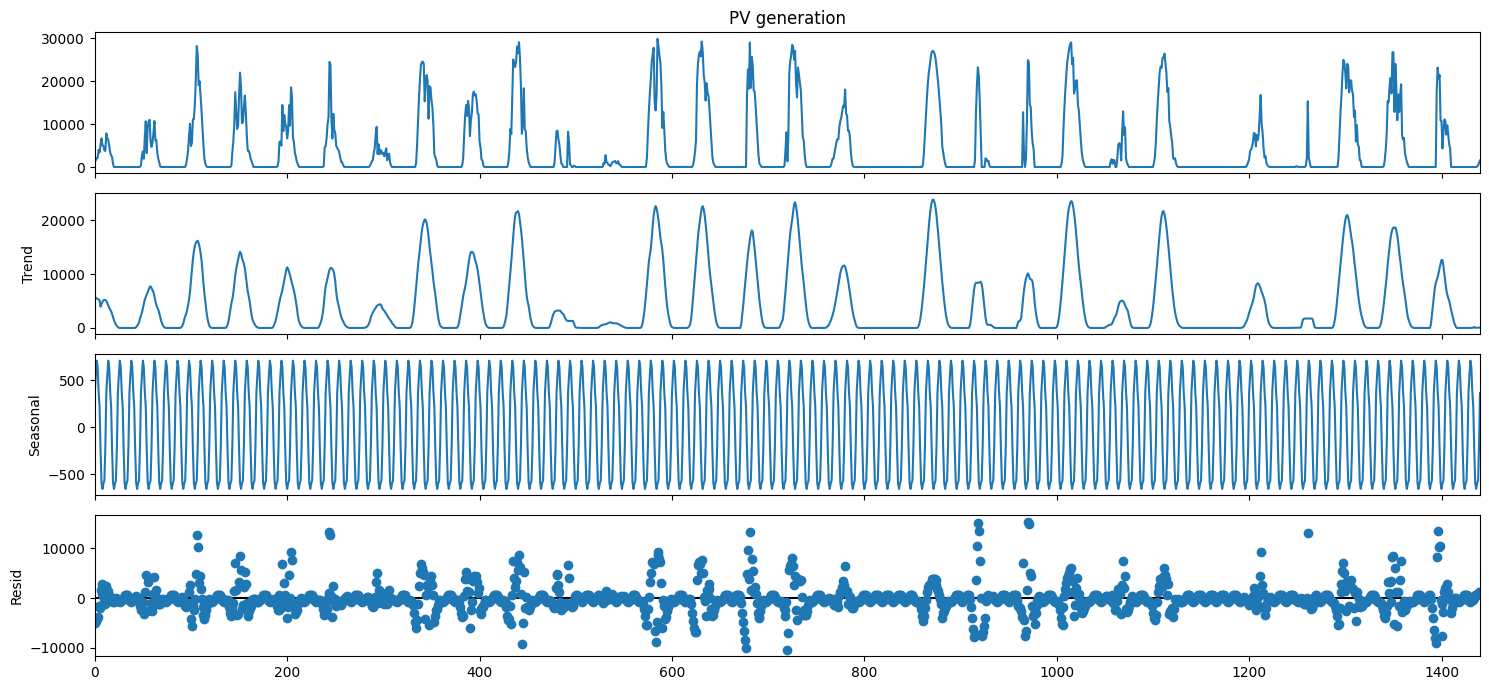

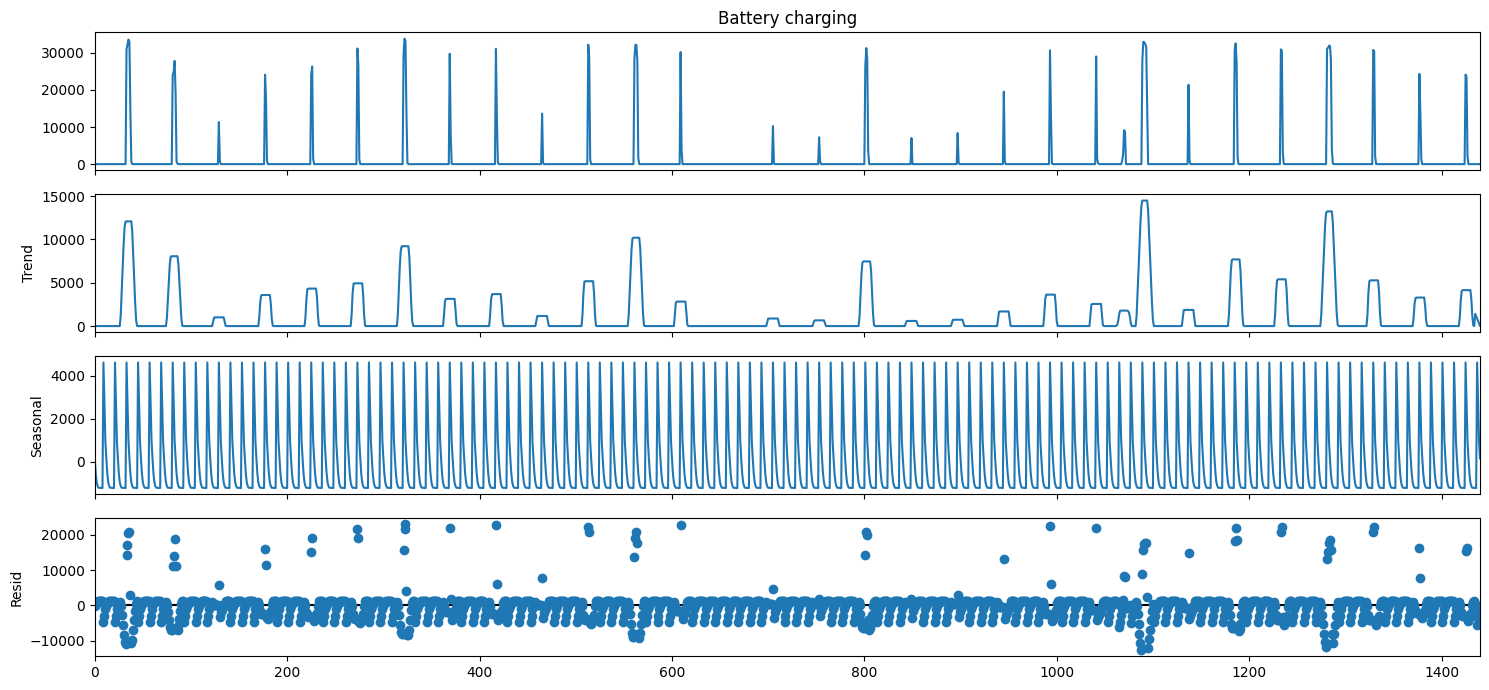

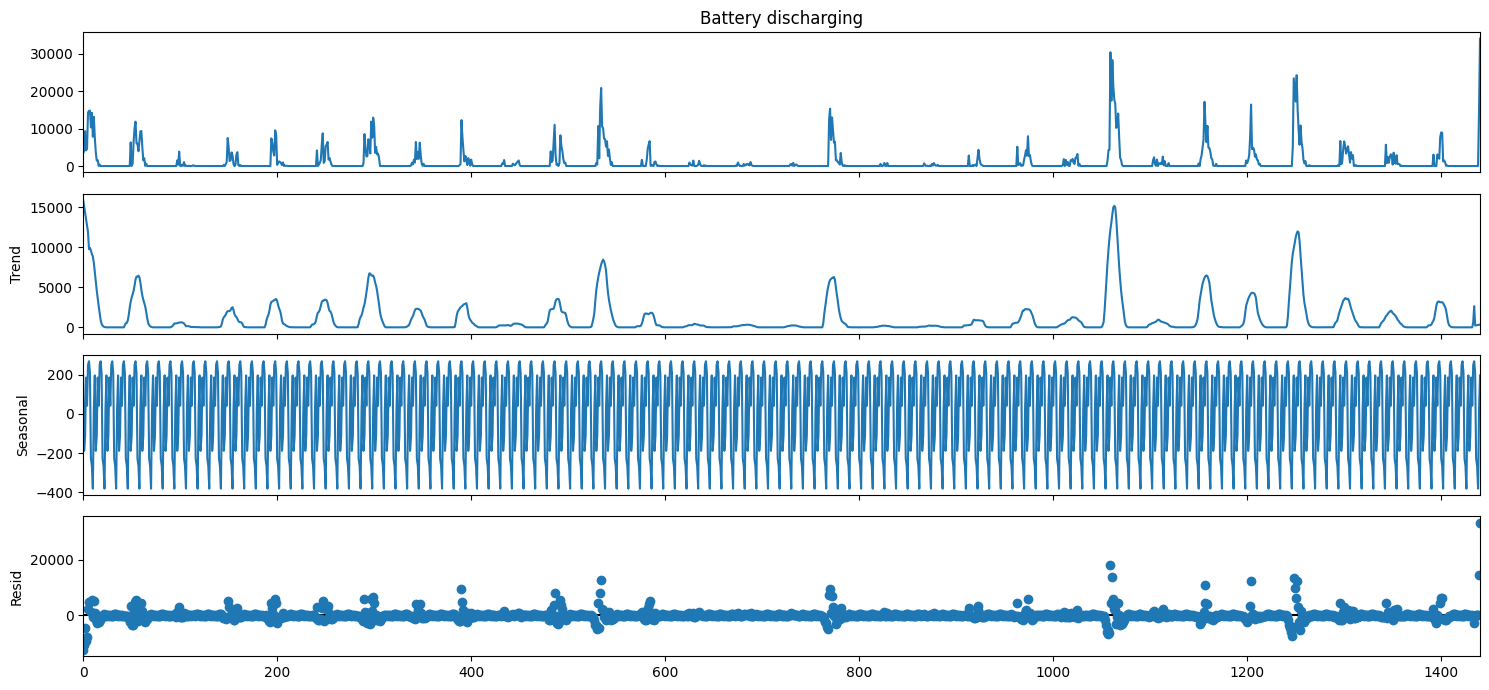

In [535]:
for column in columns:
    result_add = seasonal_decompose(x=data[column], model='additive', extrapolate_trend='freq', period=12)
    plt.rcParams.update({'figure.figsize': (15, 7)})
    result_add.plot()
    plt.show()

## Now lets check corellation between values

/home/alex/.local/share/virtualenvs/wattstor-task-XGDNxoPz/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: divide by zero encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/home/alex/.local/share/virtualenvs/wattstor-task-XGDNxoPz/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/home/alex/.local/share/virtualenvs/wattstor-task-XGDNxoPz/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


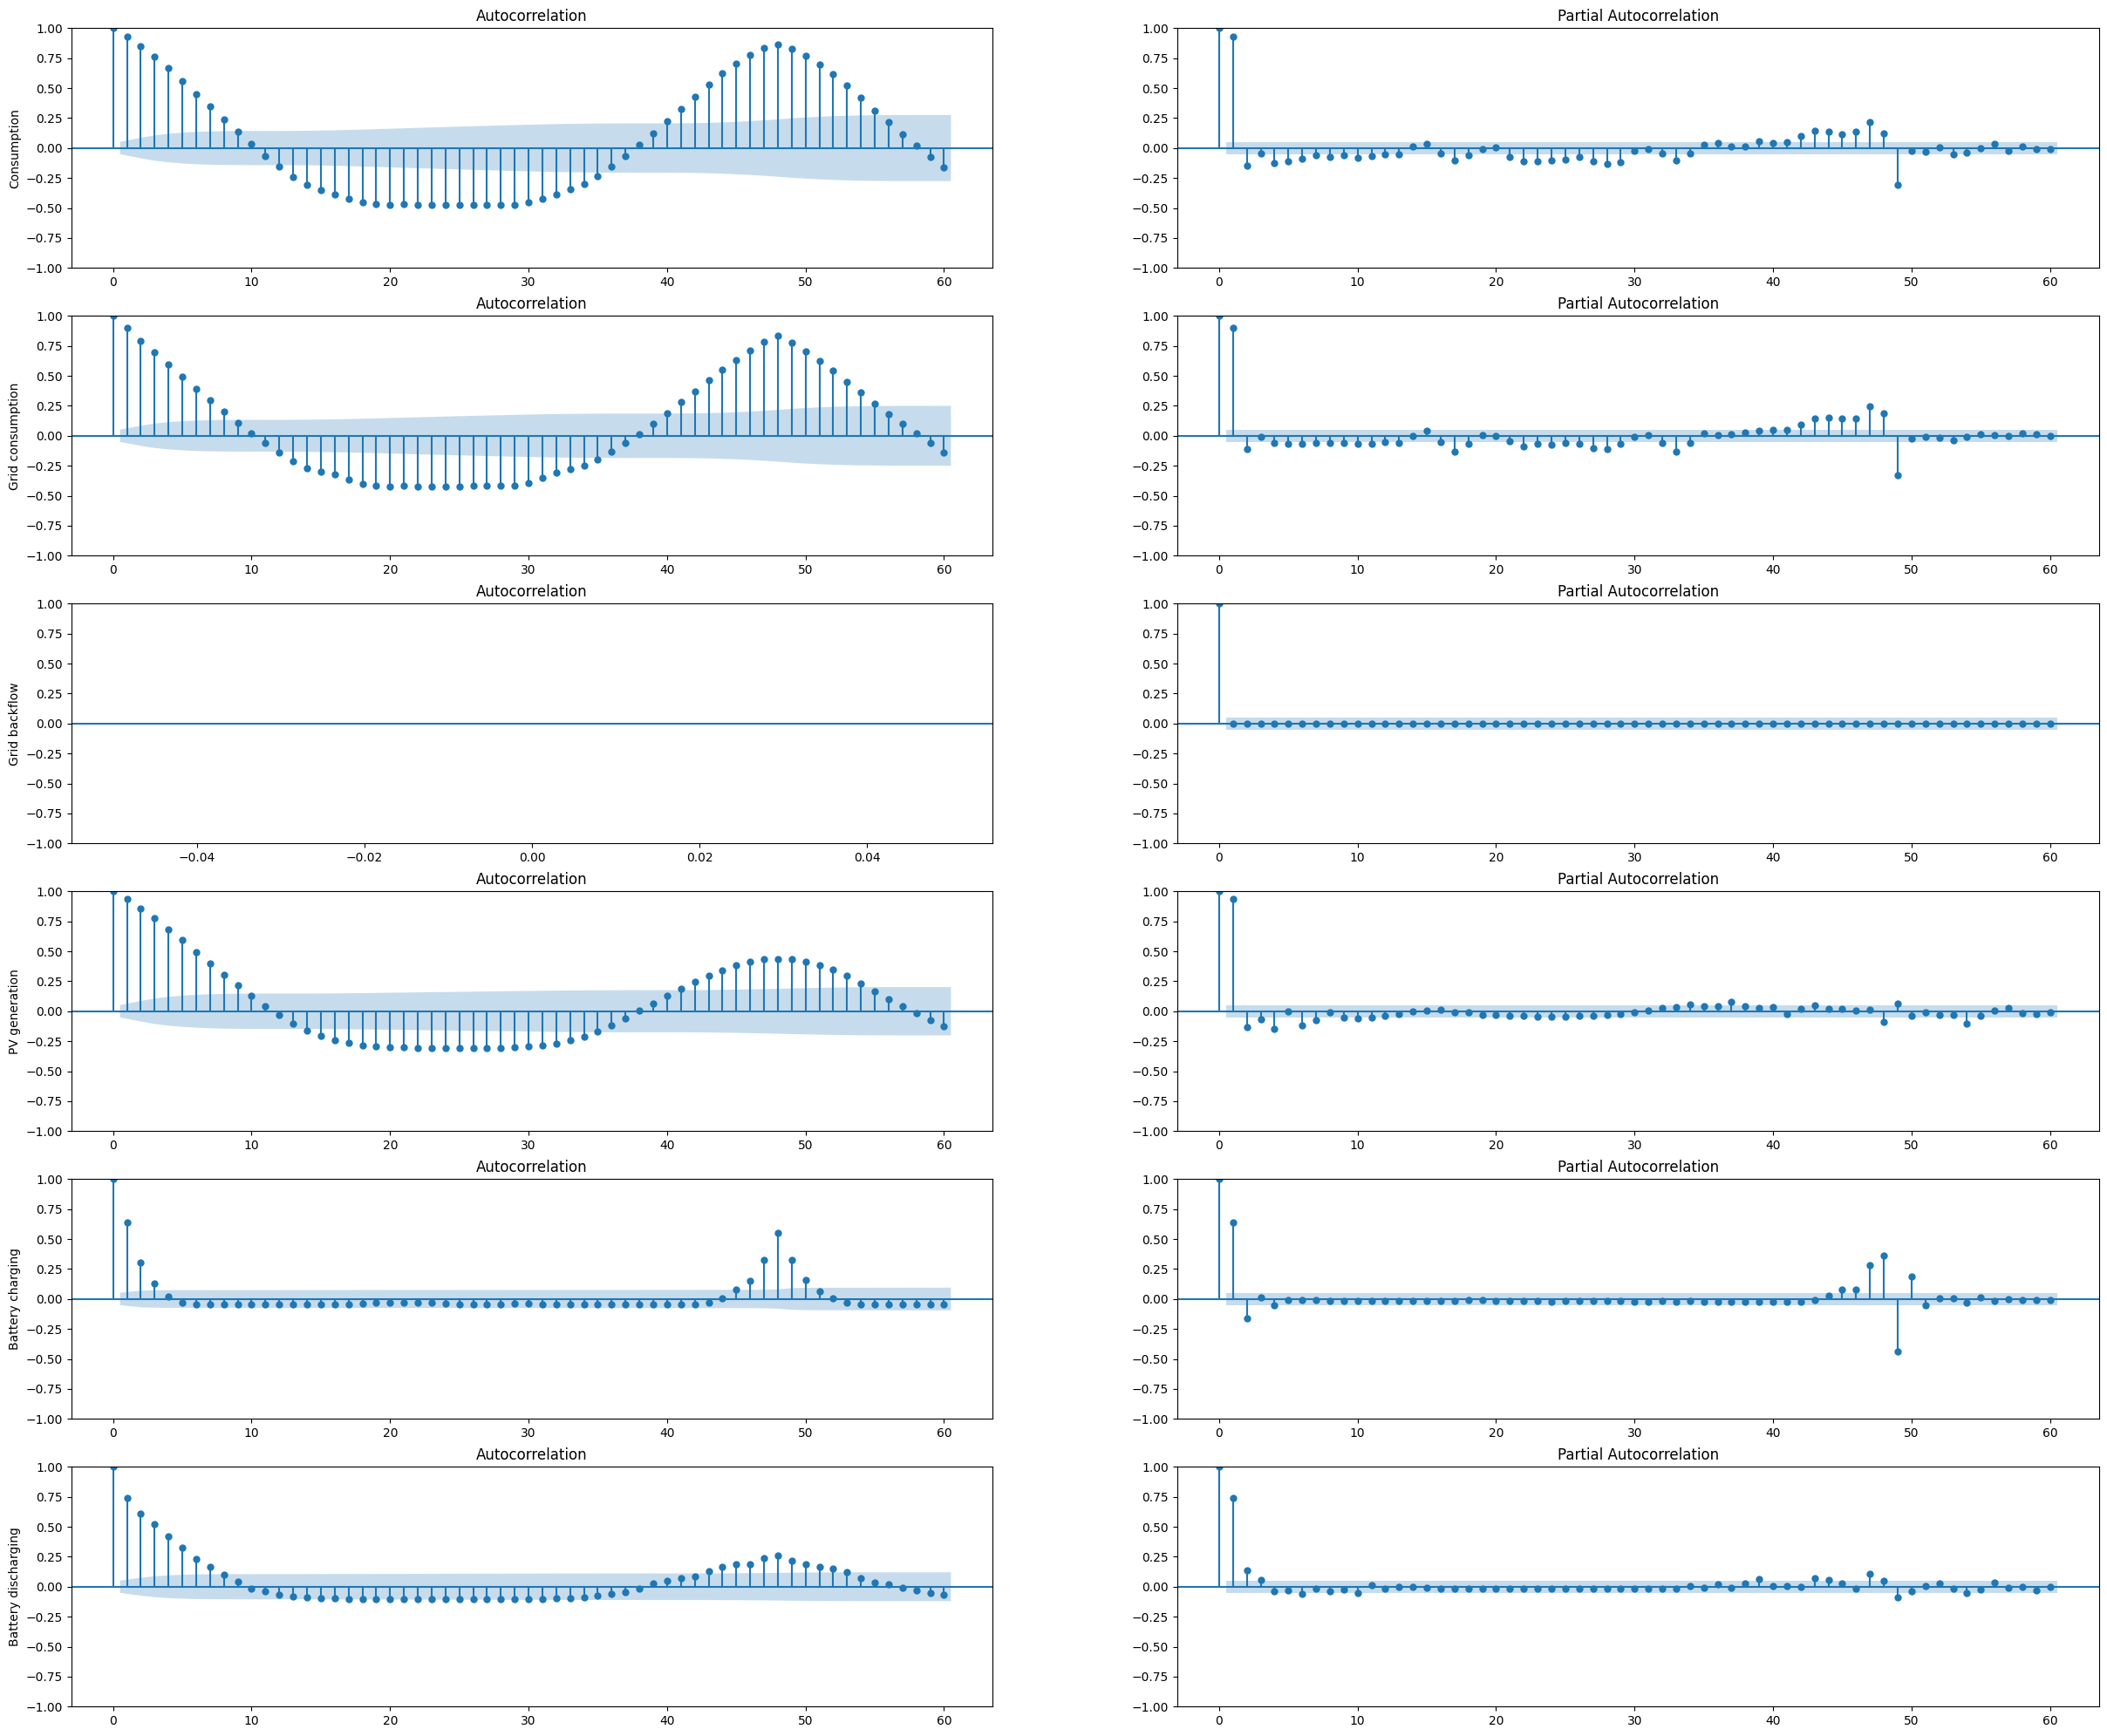

In [546]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(len(columns),2,figsize=(30,25))

for idx, column in enumerate(columns):
    sm.graphics.tsa.plot_acf(data[column], lags=60, ax=ax[idx, 0])
    sm.graphics.tsa.plot_pacf(data[column], lags=60, ax=ax[idx, 1])
    ax[idx, 0].set_ylabel(f"{column}")
# plot_acf(data['Consumption'], lags=60)
# plt.show()

## Lets start with simple AutoRegression

In [584]:
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from math import sqrt
from sklearn.metrics import mean_squared_error

results = {}

def calculate_aic_bic(data, column):

    aics = []
    bics = []
    p_values = []
    residuals = []

    for lags in tqdm(range(1, int(len(data) / 2))):
        model = AutoReg(data, lags=lags)
        result = model.fit()
        aics.append(result.aic)
        bics.append(result.bic)
        residual = result.resid
        residuals.append(residual)
        result = acorr_ljungbox(residual, lags=[lags])
        p_values.append(result.iloc[0,1])

    ticks = range(1, int(len(data) / 2))
    threshold = 0.05
    selected_order = np.argmax(np.array(p_values) < threshold) + 1
    first_lag = np.where(np.isclose(p_values, 1))[0][0]

    results[column] = {
        "order" : selected_order,
        "lags" : first_lag
    }

    print(f"Selected number of lags is: {first_lag}.")

    plt.figure(figsize=(30,7))
    plt.plot(ticks, aics, marker='o', label='AIC')
    plt.plot(ticks, bics, marker='o', label='BIC')
    plt.xlabel('Order (p)')
    plt.ylabel('Information Criterion Value')
    plt.title('Comparison of AIC and BIC')
    plt.xticks(np.arange(1, int(len(data) / 2), 50.0))
    plt.legend()
    plt.show()

Consumption


100%|██████████| 719/719 [00:45<00:00, 15.71it/s]


Selected number of lags is: 96.


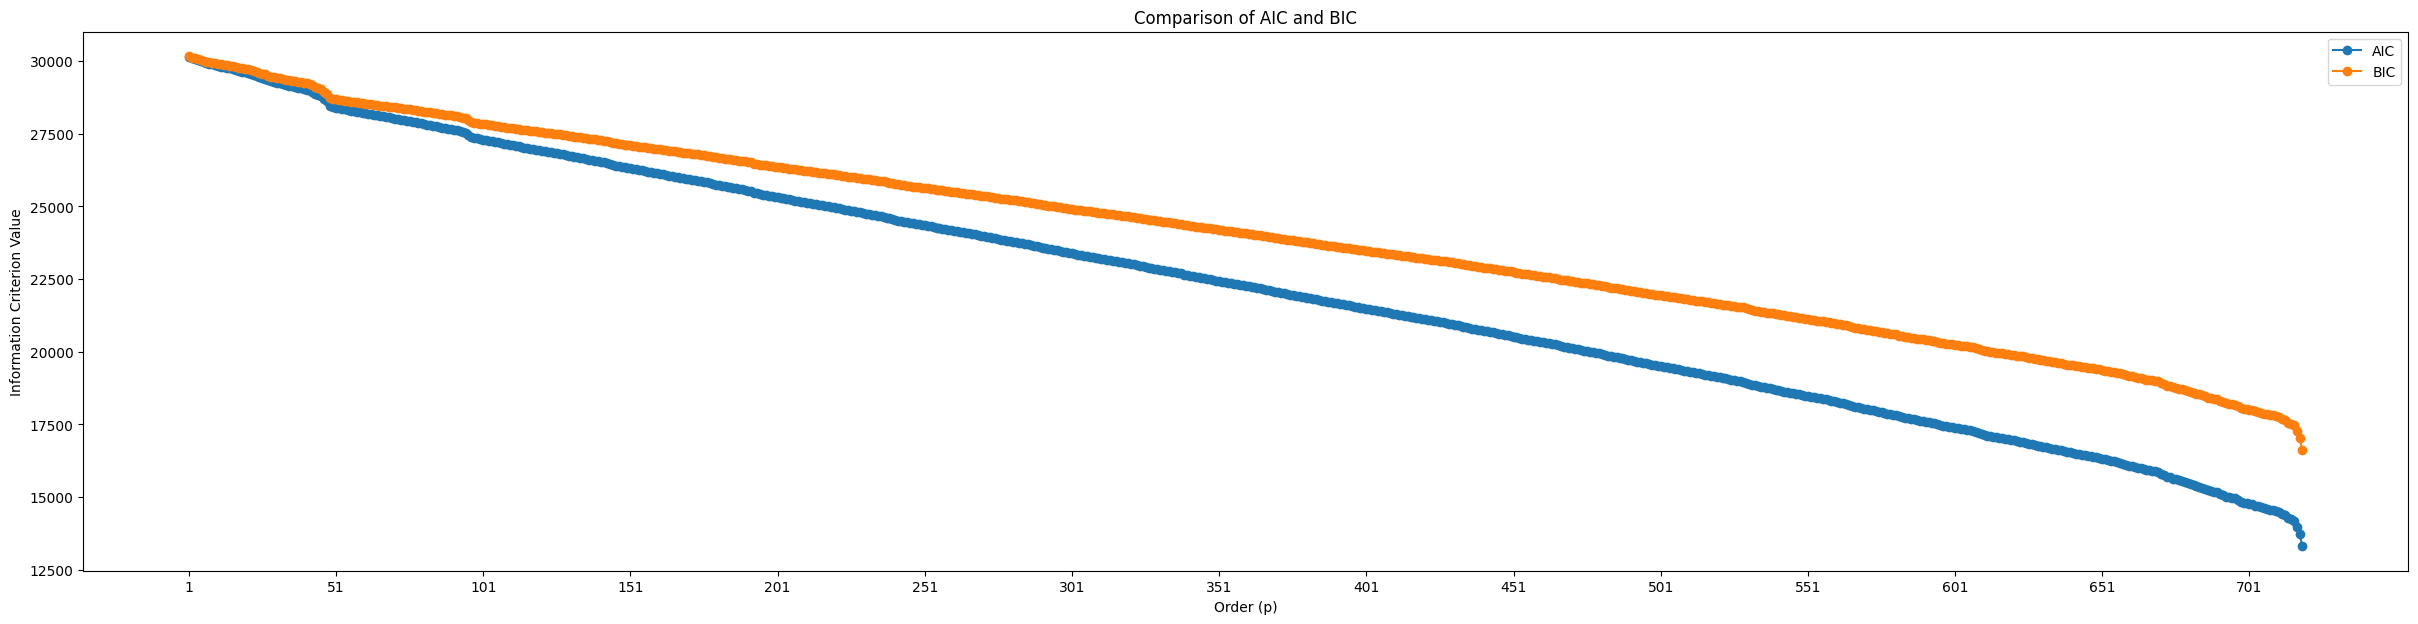

Grid consumption


100%|██████████| 719/719 [00:47<00:00, 15.17it/s] 


Selected number of lags is: 101.


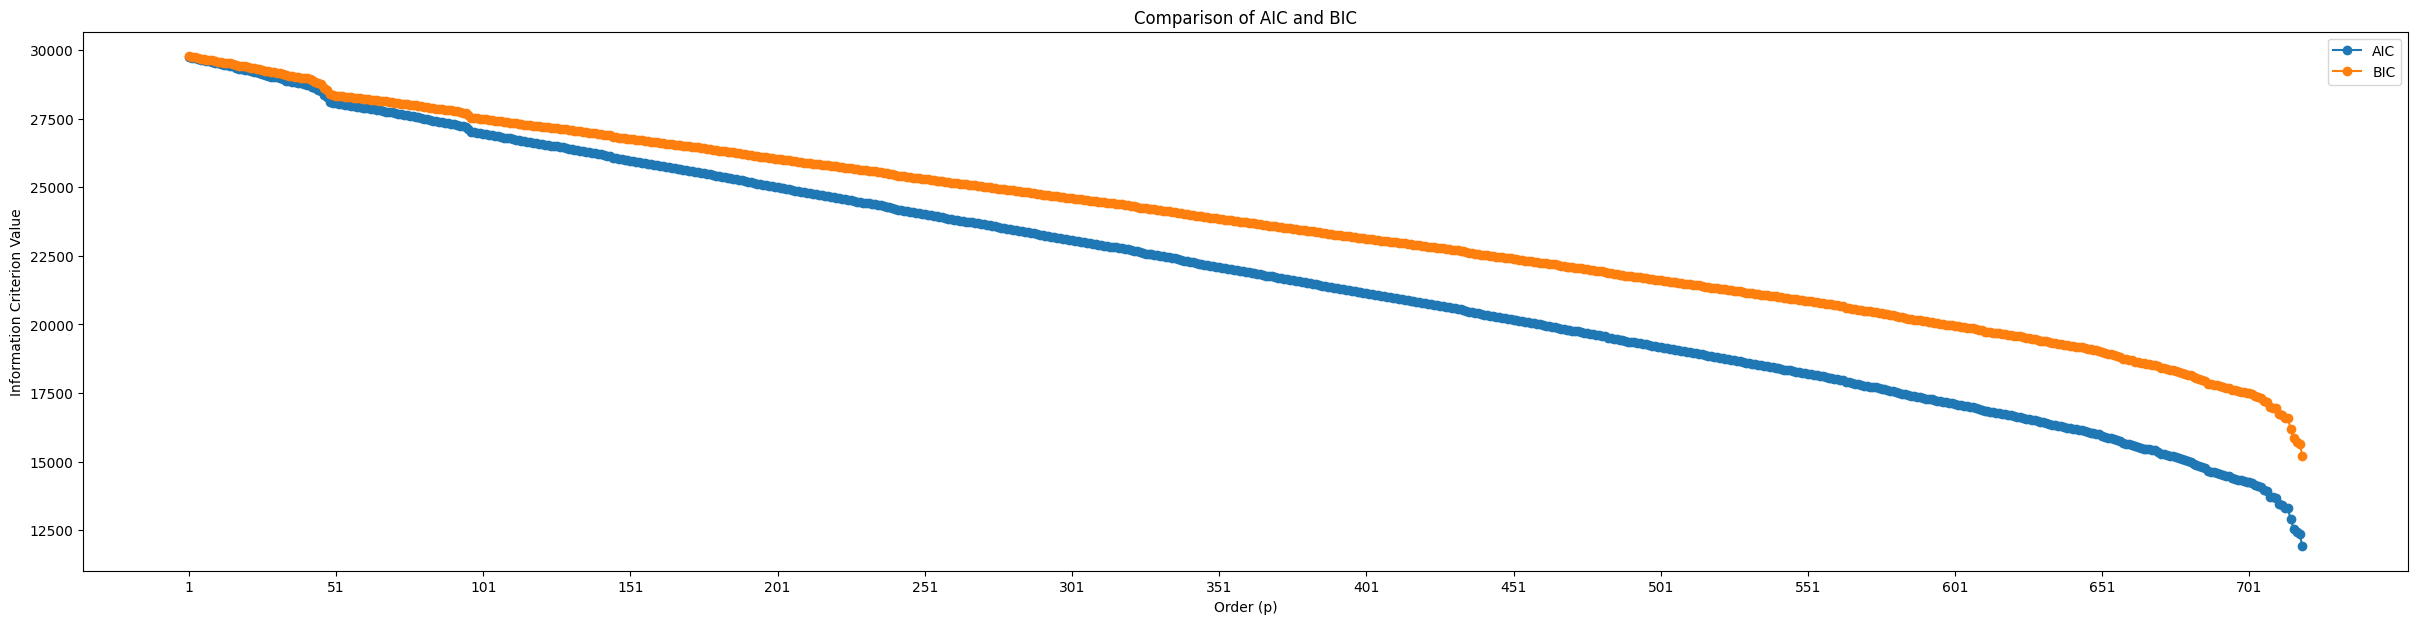

PV generation


100%|██████████| 719/719 [00:46<00:00, 15.33it/s] 


Selected number of lags is: 11.


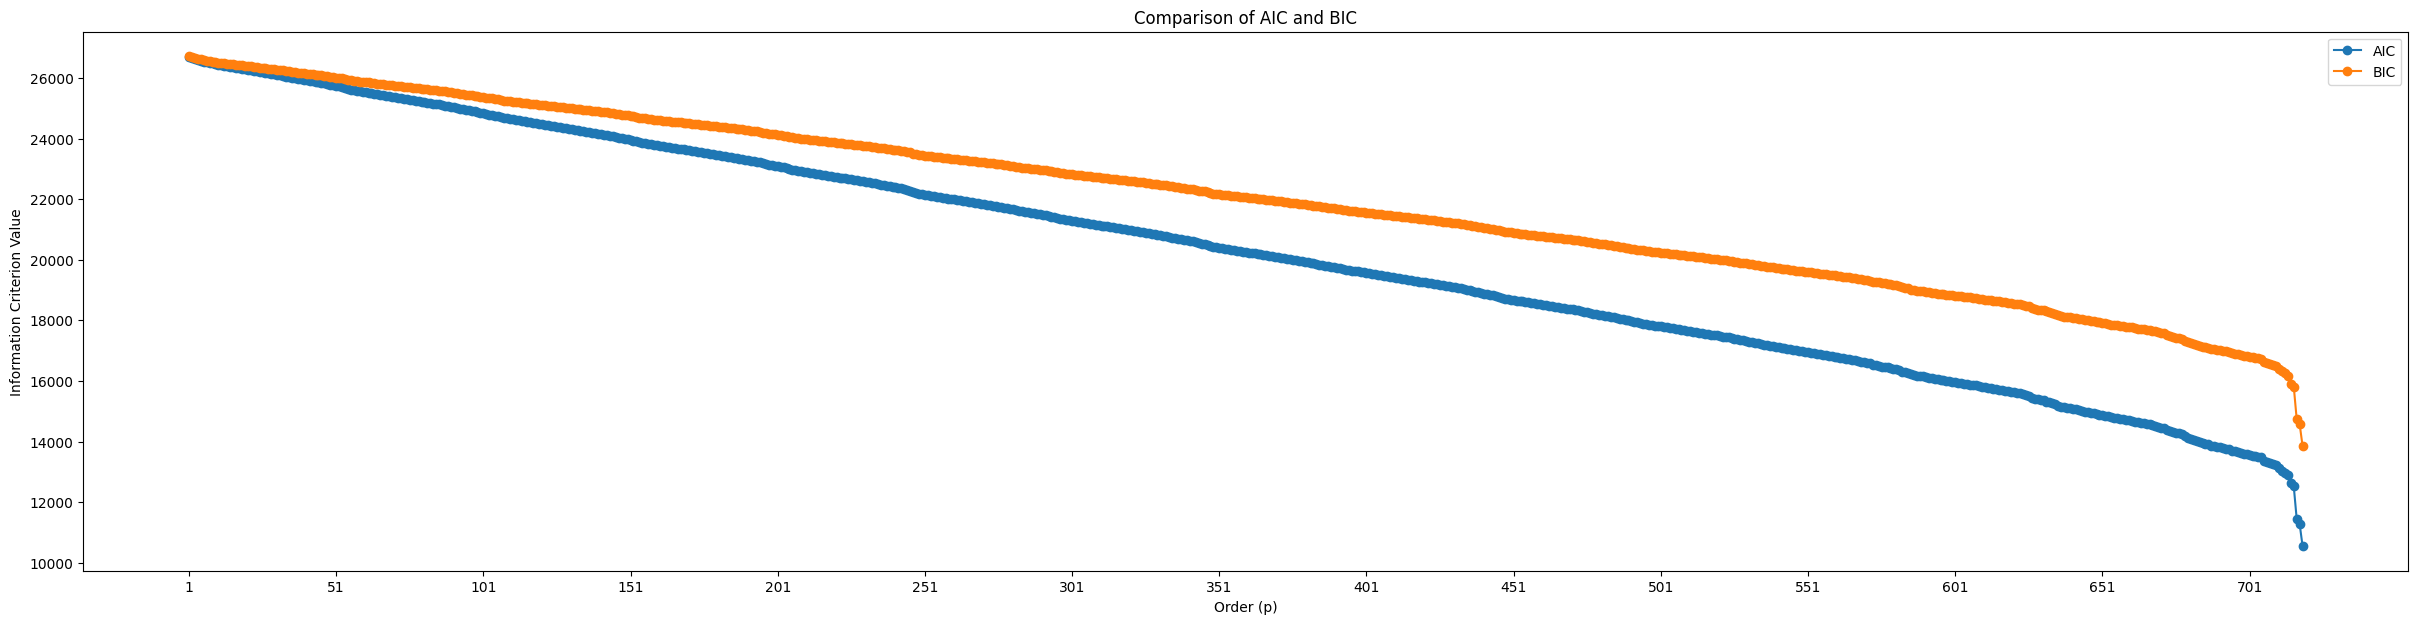

Battery discharging


100%|██████████| 719/719 [00:45<00:00, 15.84it/s] 


Selected number of lags is: 11.


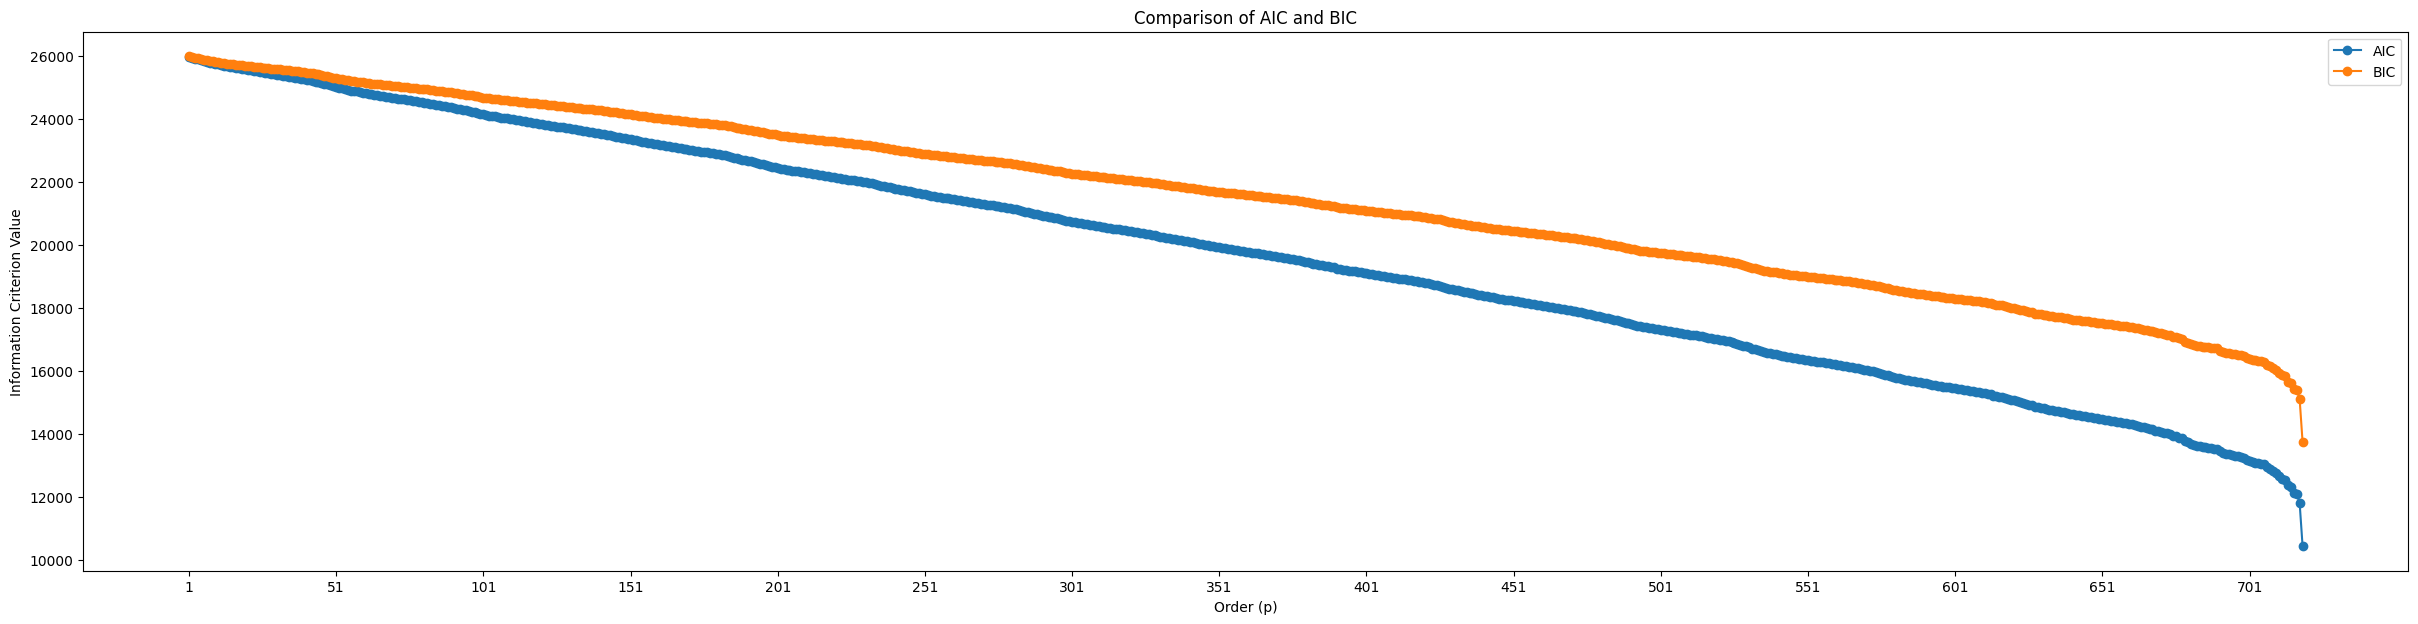

In [586]:
for column in columns:
    if data[column][0] == 0.0:
        continue
    print(column)
    calculate_aic_bic(data[column], column)

In [576]:
def absolute_error_statistics(original : np.array, predicted : np.array):
    assert len(original) == len(predicted)
    return np.absolute(original - predicted)

In [596]:
print(results)

{'Consumption': {'order': 1, 'lags': 96}, 'Grid consumption': {'order': 1, 'lags': 101}, 'PV generation': {'order': 1, 'lags': 11}, 'Battery discharging': {'order': 1, 'lags': 11}}


In [594]:
def train_and_evaluate(column_name):
    print(column_name)
    if column in results.keys():
        first_lag = results[column_name]['lags']
    else:
        first_lag = 1

    X = data[column_name].values
    size = int(len(X) * 0.80)
    train, test = X[0:size], X[size:len(X)]
    MIN_LAGS = 1
    MAX_LAGS = (first_lag * 2) + 1
    rmses = []
    res = {}

    for window in range(MIN_LAGS, MAX_LAGS):
        model = AutoReg(train, lags=window)
        model_fit = model.fit()
        coef = model_fit.params
        # walk forward over time steps in test
        history = train[len(train)-window:]
        history = [history[i] for i in range(len(history))]
        predictions = list()
        for t in range(len(test)):
            length = len(history)
            lag = [history[i] for i in range(length-window,length)]
            yhat = coef[0]
            for d in range(window):
                yhat += coef[d+1] * lag[window-d-1]
                obs = X[t]
            predictions.append(yhat)
            history.append(obs)
        result = absolute_error_statistics(np.array(test), np.array(predictions))
        res[window] = result
        rmse = sqrt(mean_squared_error(test, predictions))
        rmses.append(rmse)

    plt.figure(figsize=(15,7))
    plt.plot(range(MIN_LAGS, MAX_LAGS), rmses, marker='x')
    plt.xticks(range(MIN_LAGS, MAX_LAGS)[::10])
    plt.xlabel('Number of lags')
    plt.ylabel('RMSE')
    plt.title('RMSE evolution')
    plt.show()

    plt.figure(figsize=(30,7))
    plt.plot(data.index[len(train) - 100:len(train)], train[len(train) - 100:], color='b', label='train')
    plt.plot(data.index[len(train):], test, color='g', label='ground truth')
    plt.plot(data.index[len(train):], predictions, color='r', label='predicted')
    plt.xticks([])
    plt.title("Difference between test and predicted data")
    plt.legend(loc='best')
    plt.show()

    df = pd.DataFrame(res)
    described = df.describe()

    mean = []
    fifty = []
    max_error = []

    for item in described.axes[1]:
        mean.append(described[item]['mean'])
        fifty.append(described[item]['50%'])
        max_error.append(described[item]['max'])

    plt.figure(figsize=(30,7))
    plt.plot(range(MIN_LAGS, MAX_LAGS), mean, color='r', label='mean', marker='x')
    plt.plot(range(MIN_LAGS, MAX_LAGS), fifty, color='g', label='median', marker='x')
    plt.plot(range(MIN_LAGS, MAX_LAGS), max_error, color='b', label='max', marker='x')
    plt.xticks(range(MIN_LAGS, MAX_LAGS)[::10])
    plt.xlabel('Number of lags')
    plt.ylabel('Absolute error')
    plt.title("Absolute error evolution for increasing number of lags")
    plt.legend(loc='best')
    plt.show()

Consumption


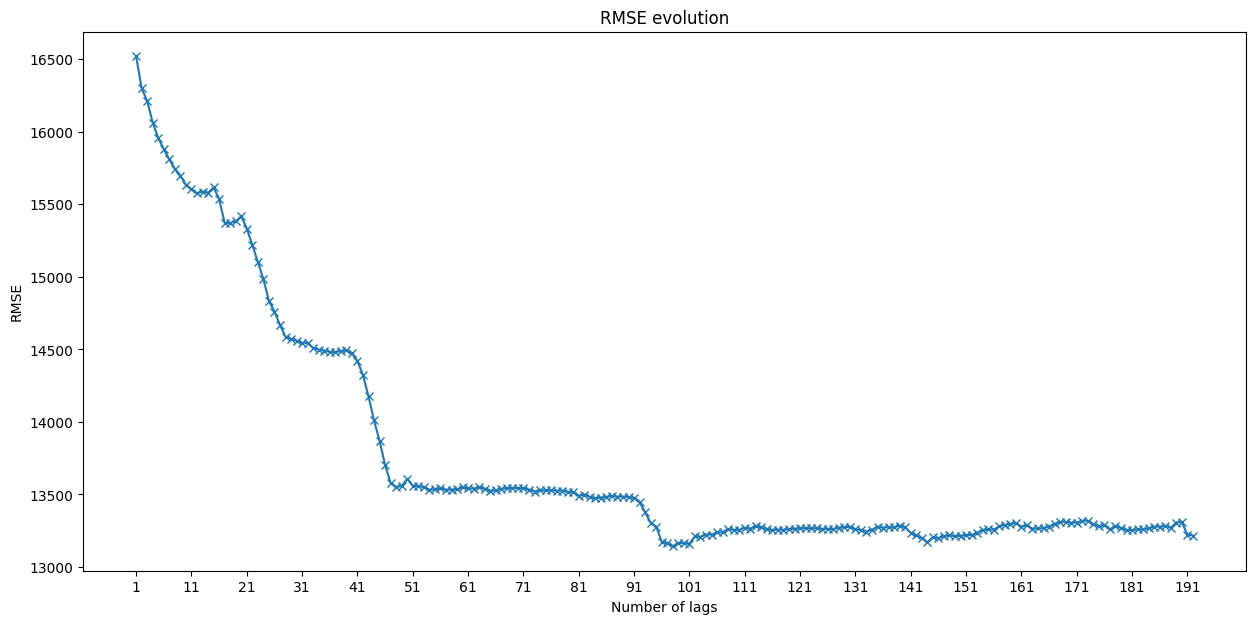

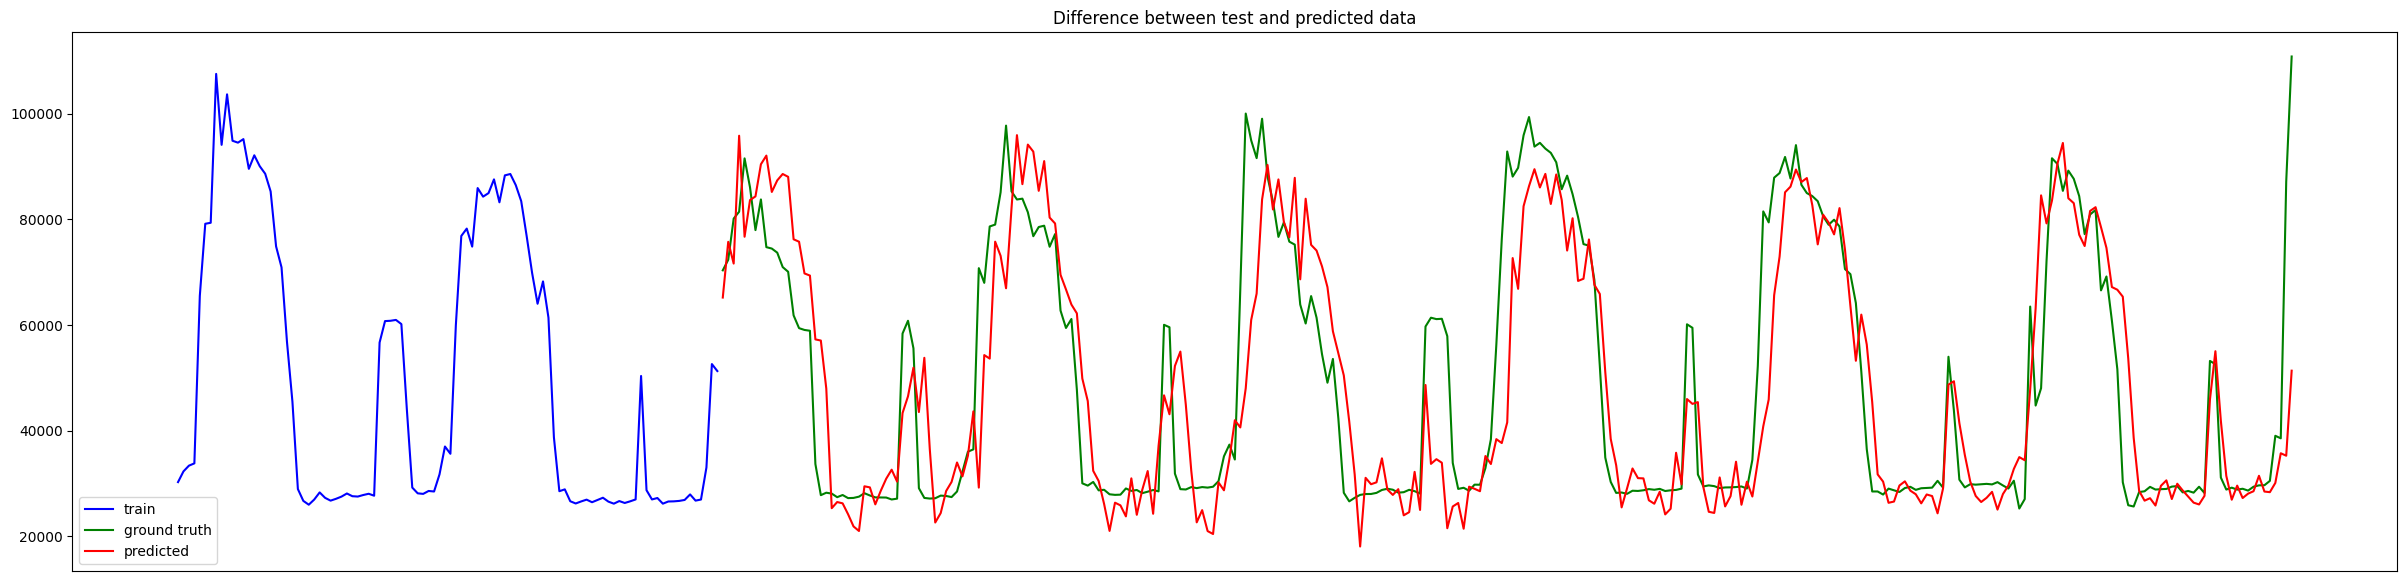

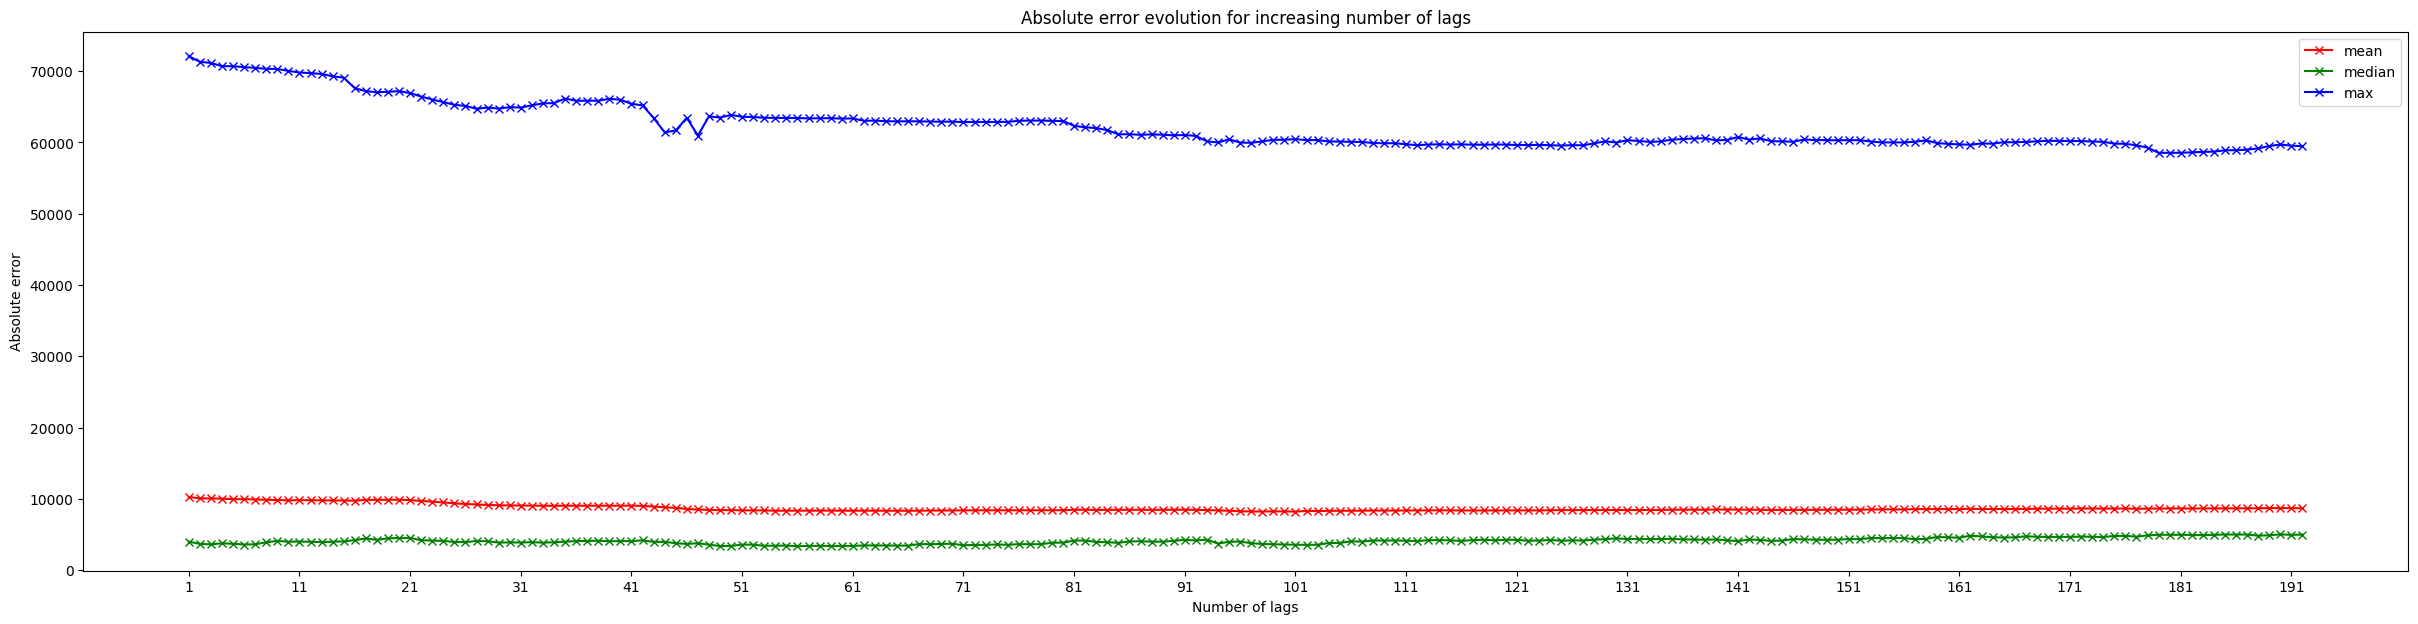

Grid consumption


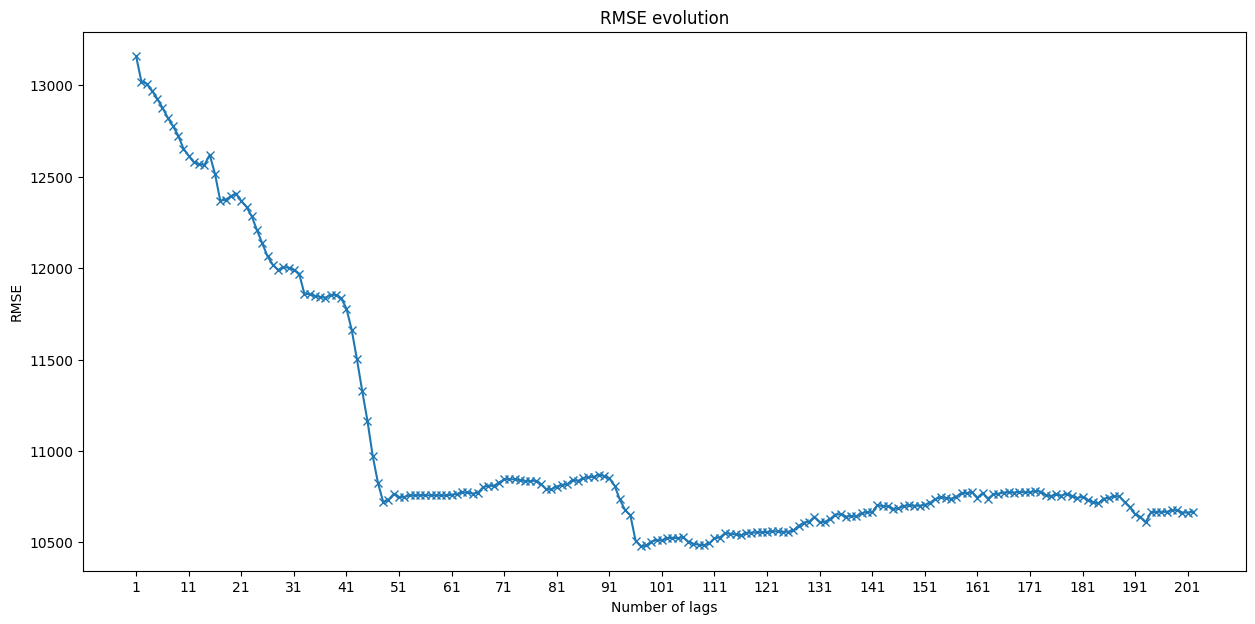

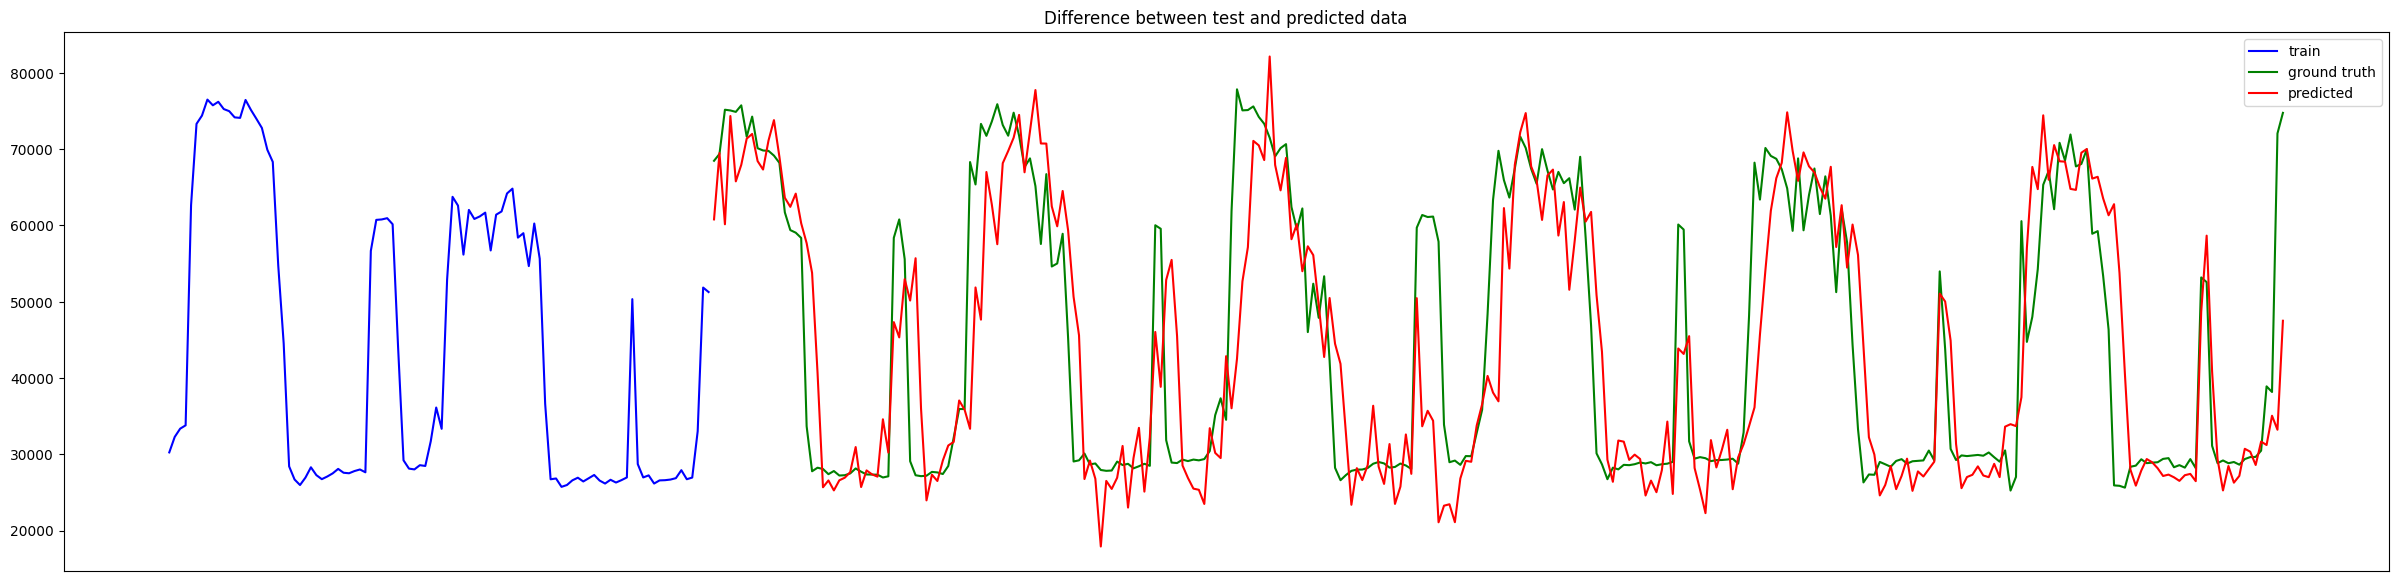

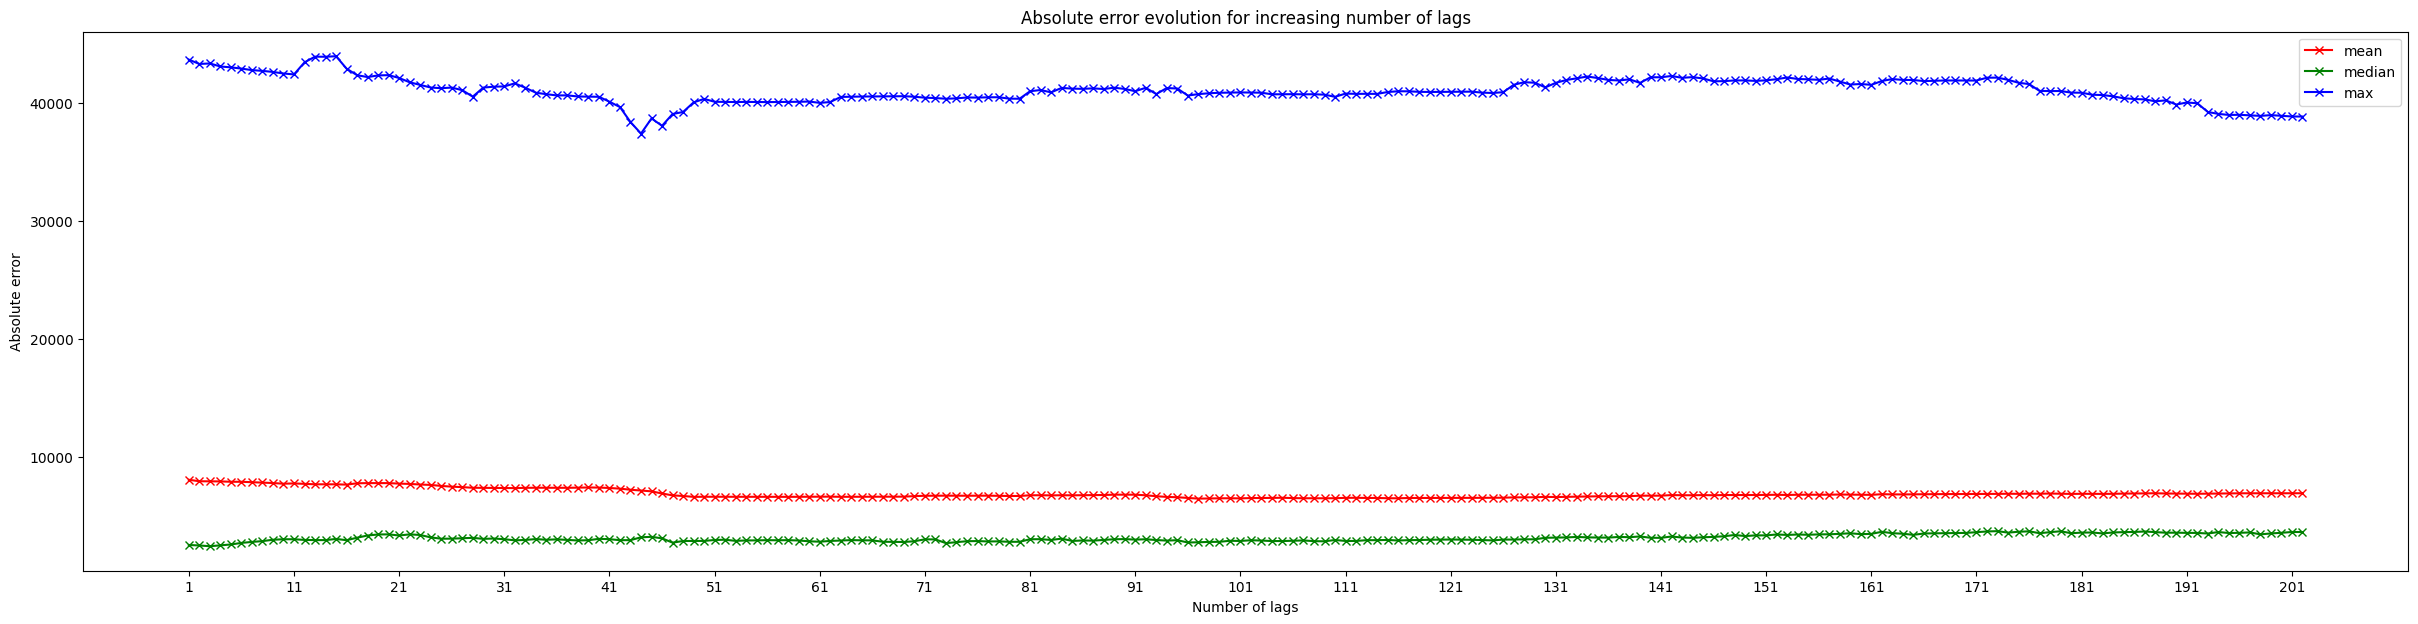

Grid backflow


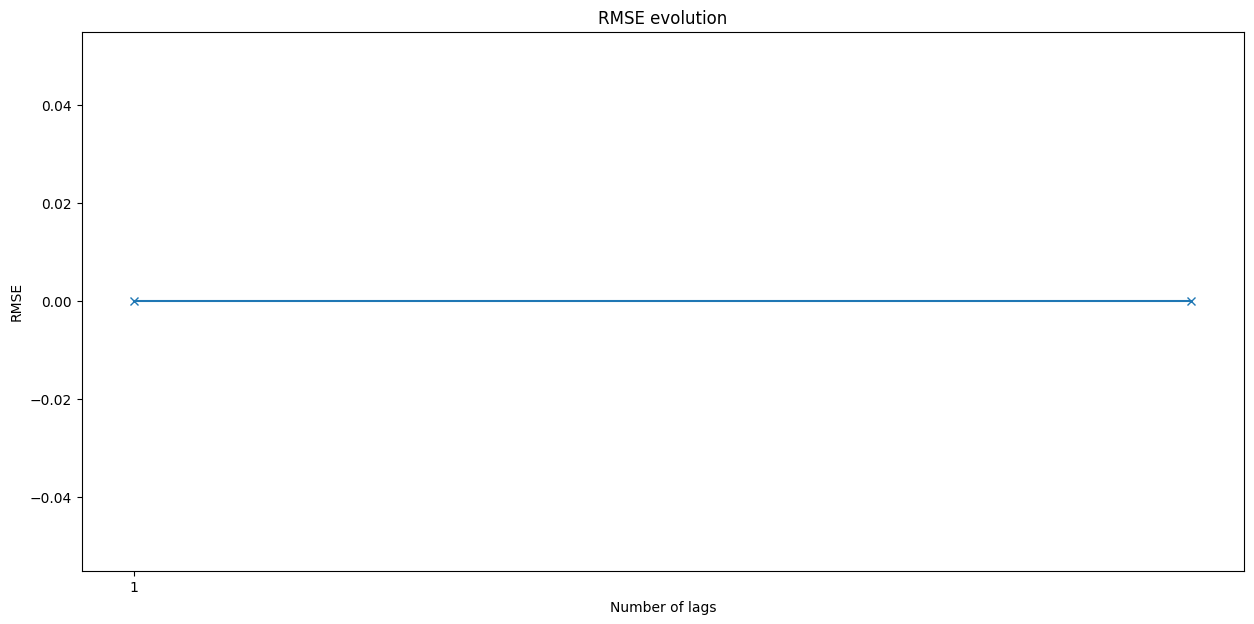

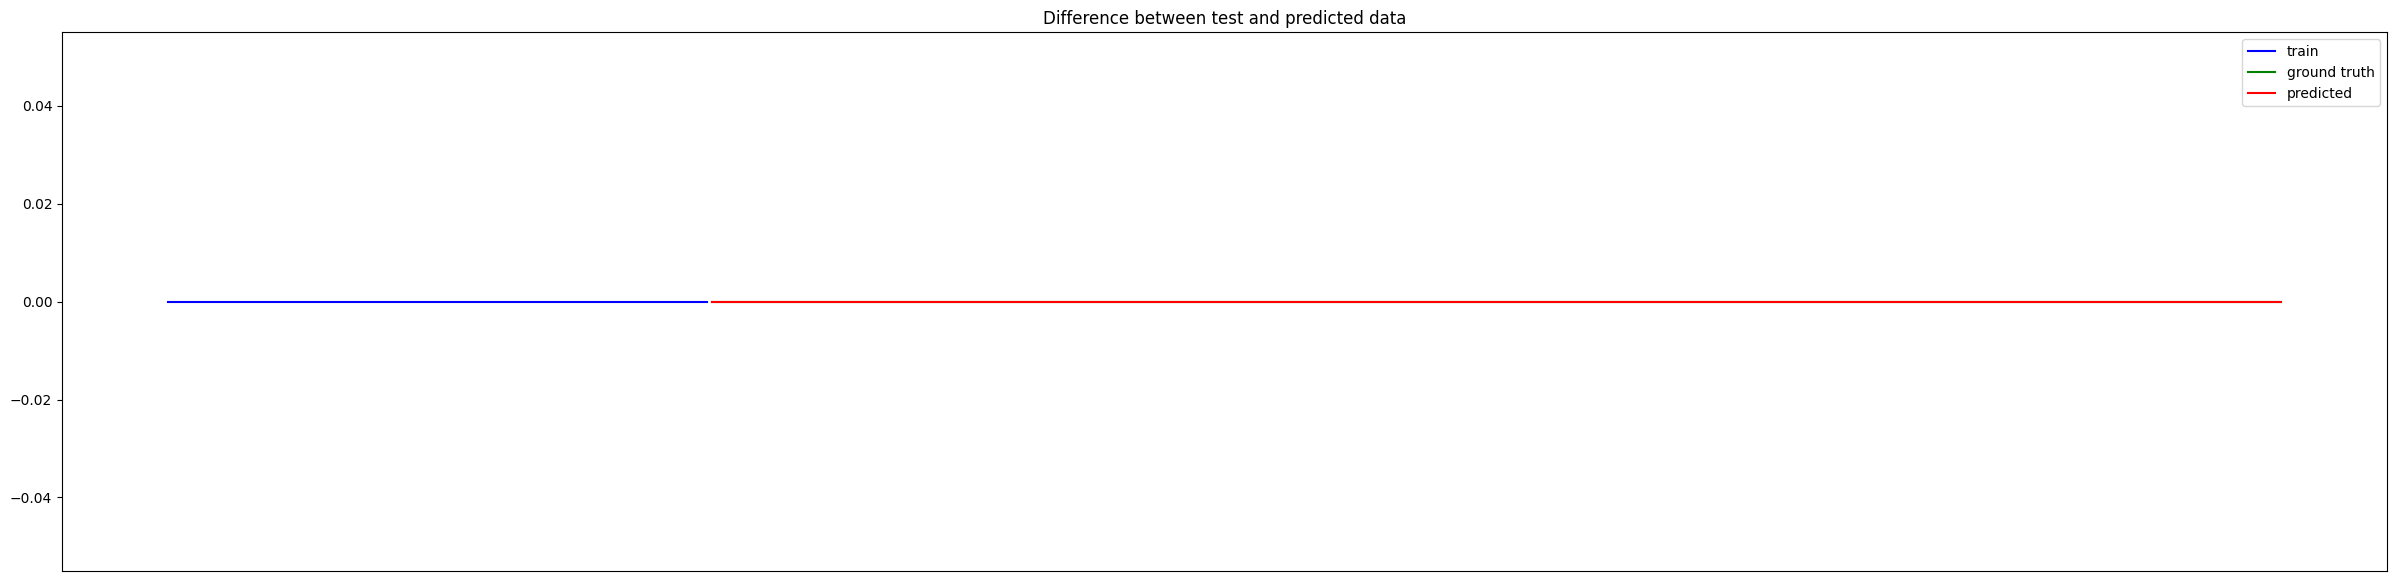

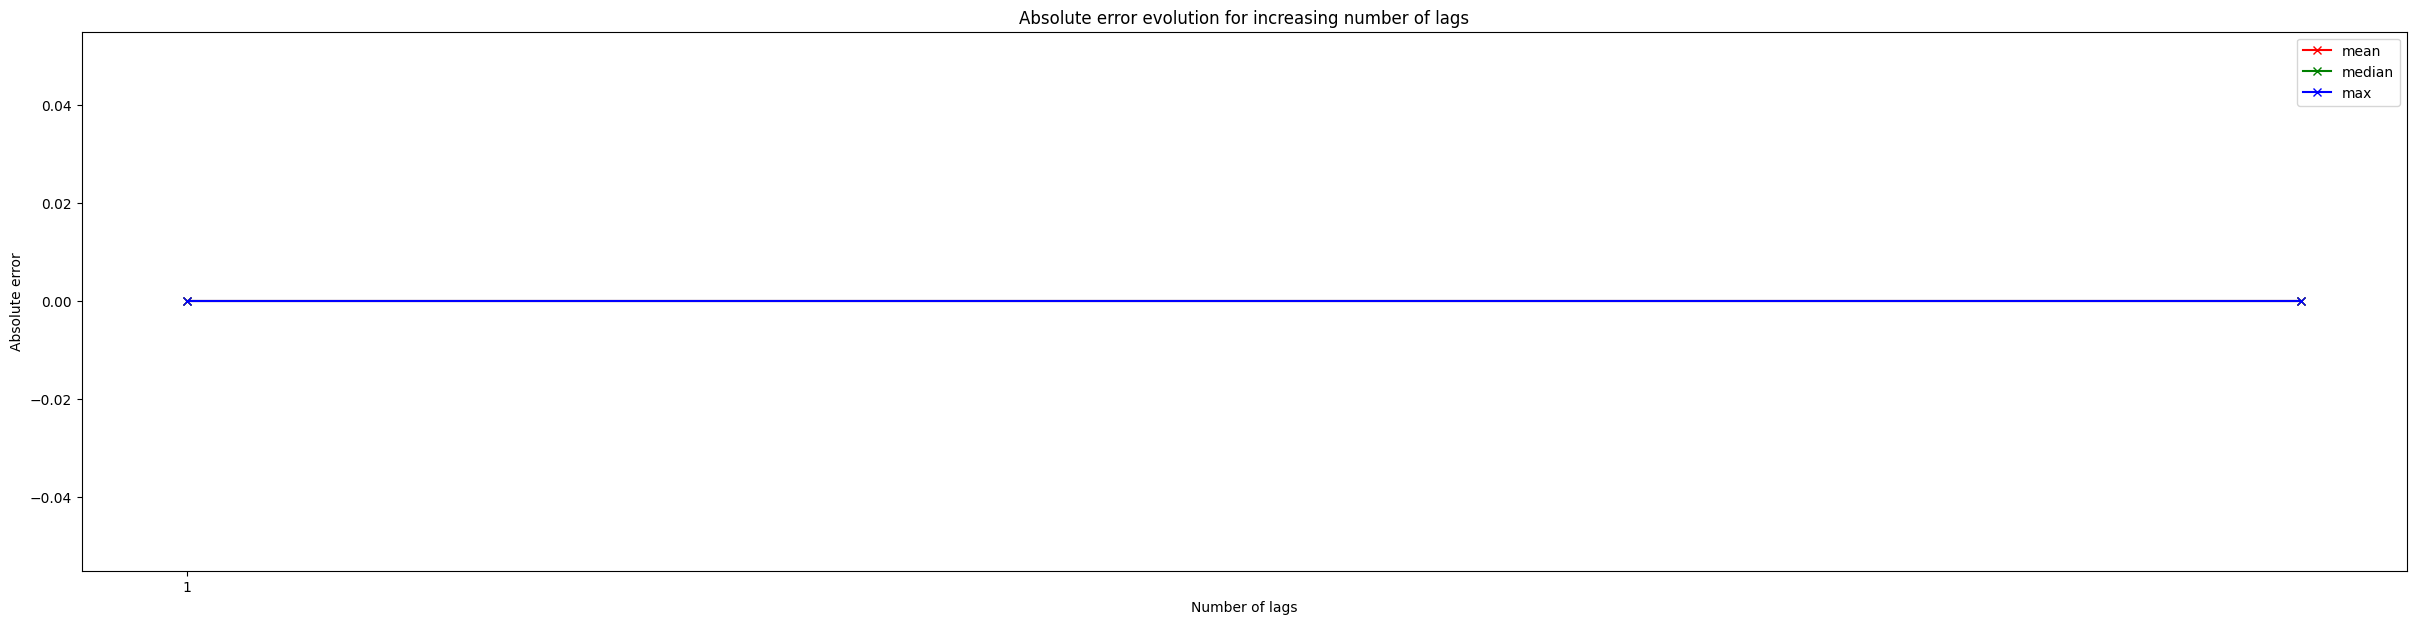

PV generation


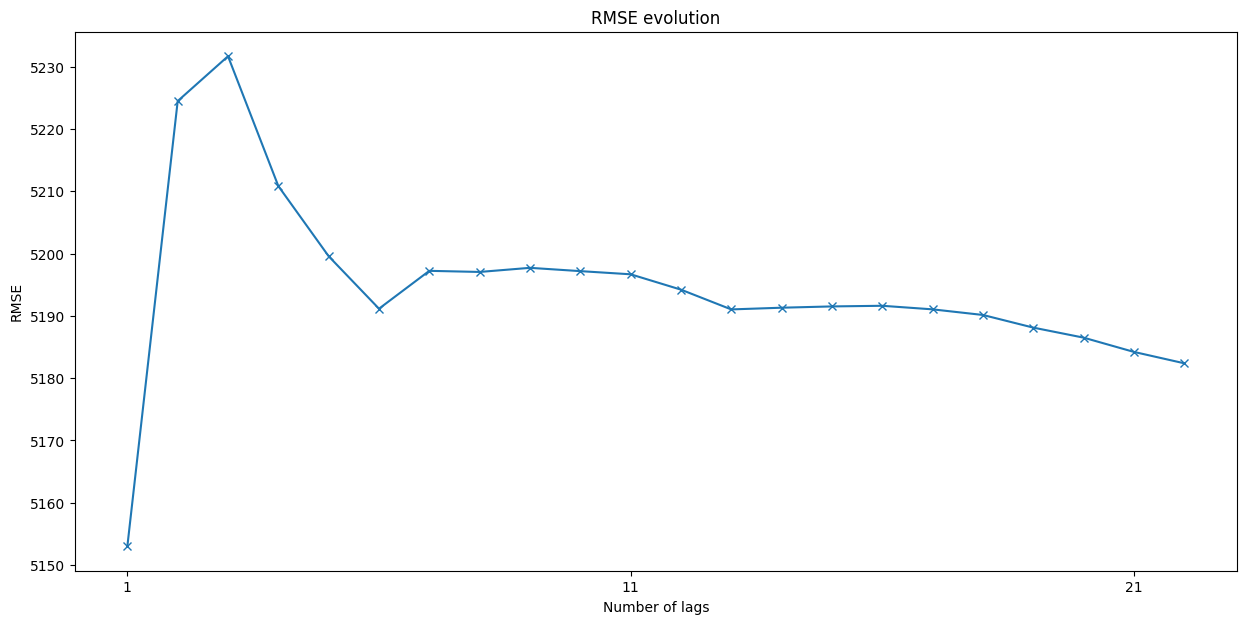

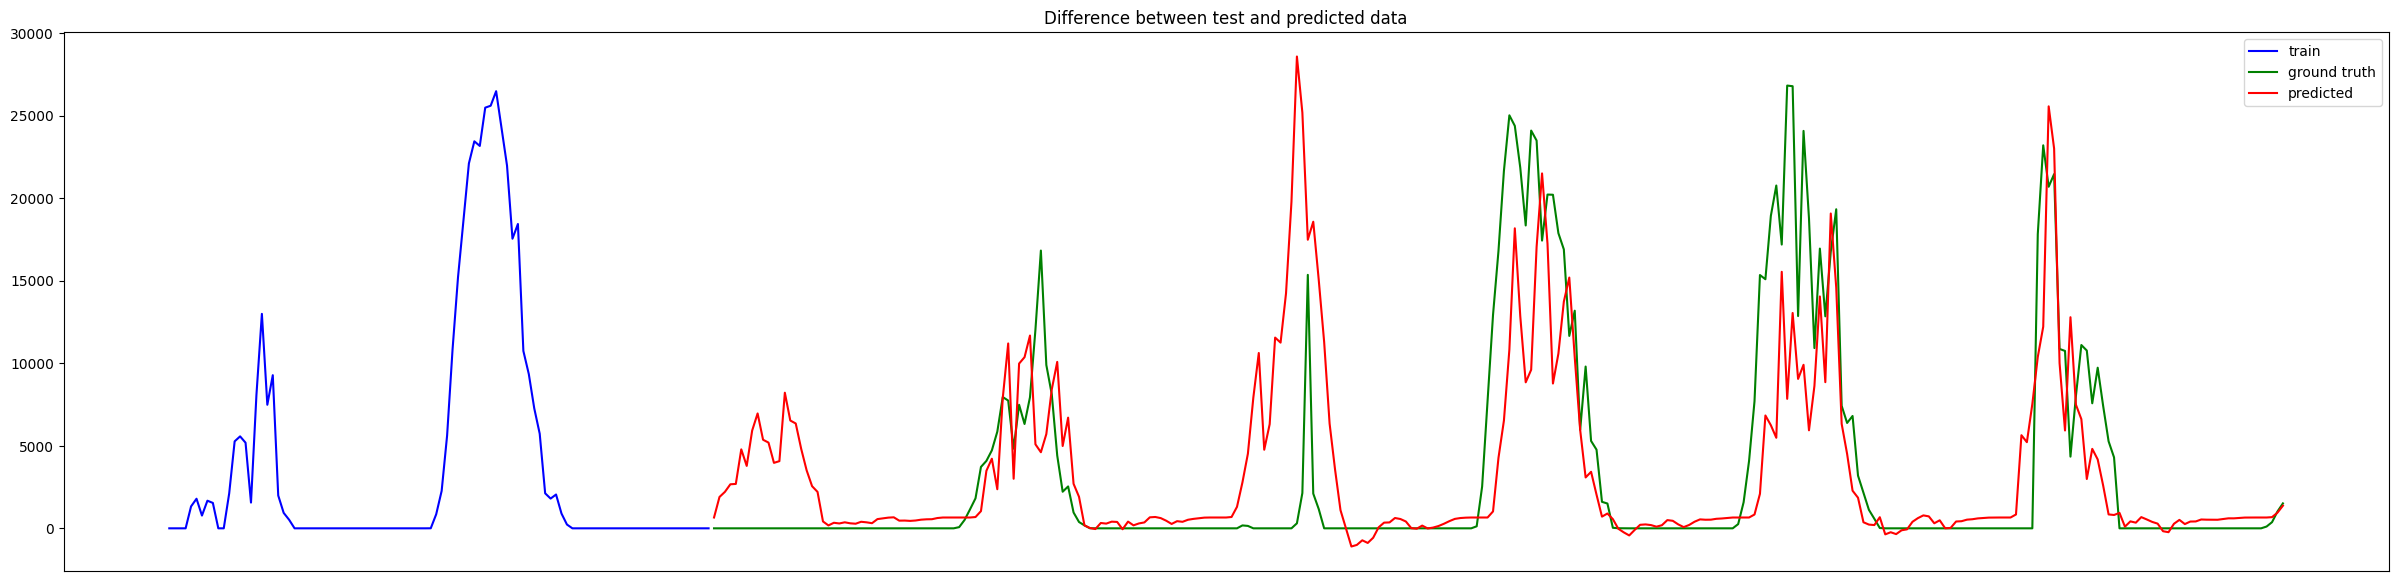

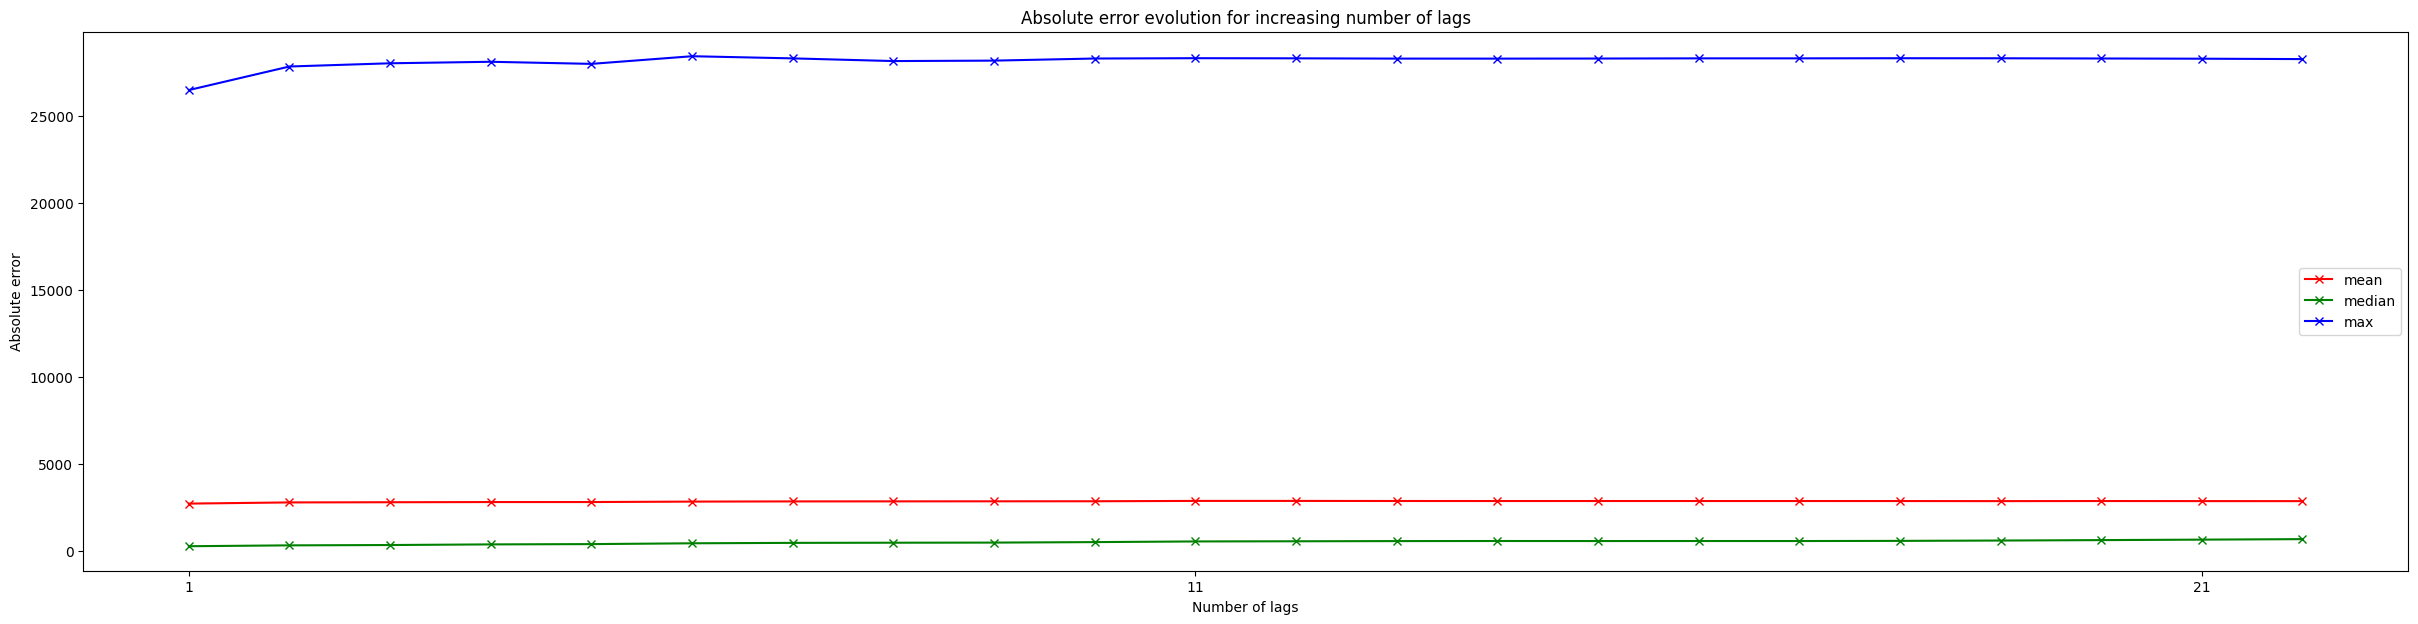

Battery charging


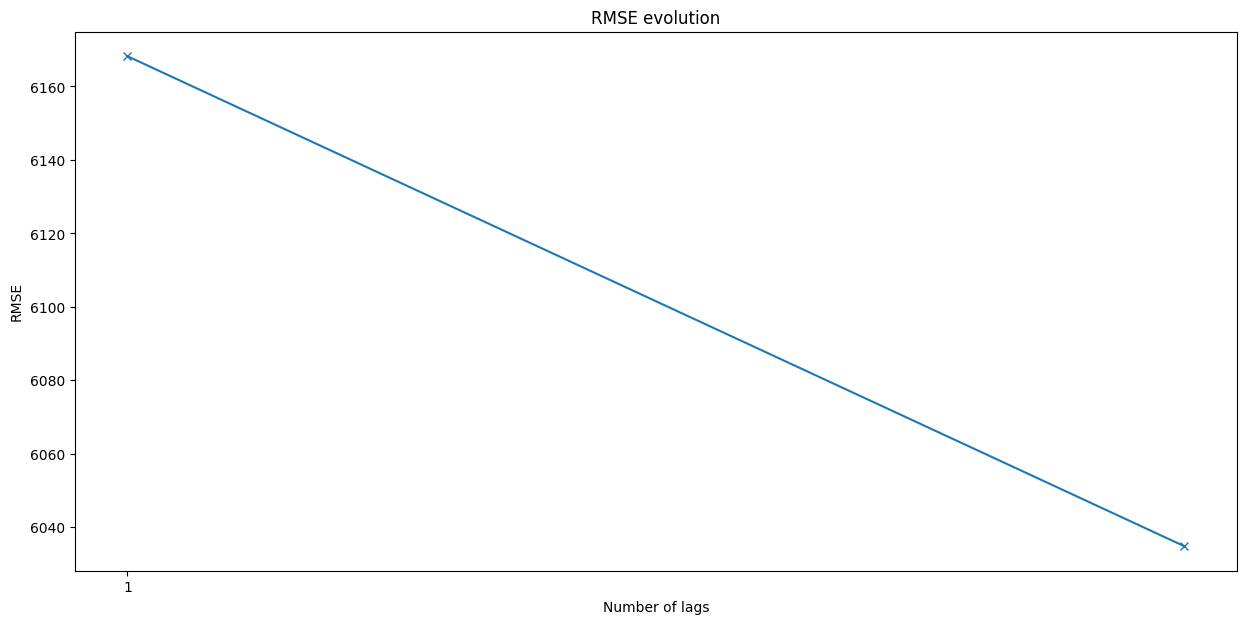

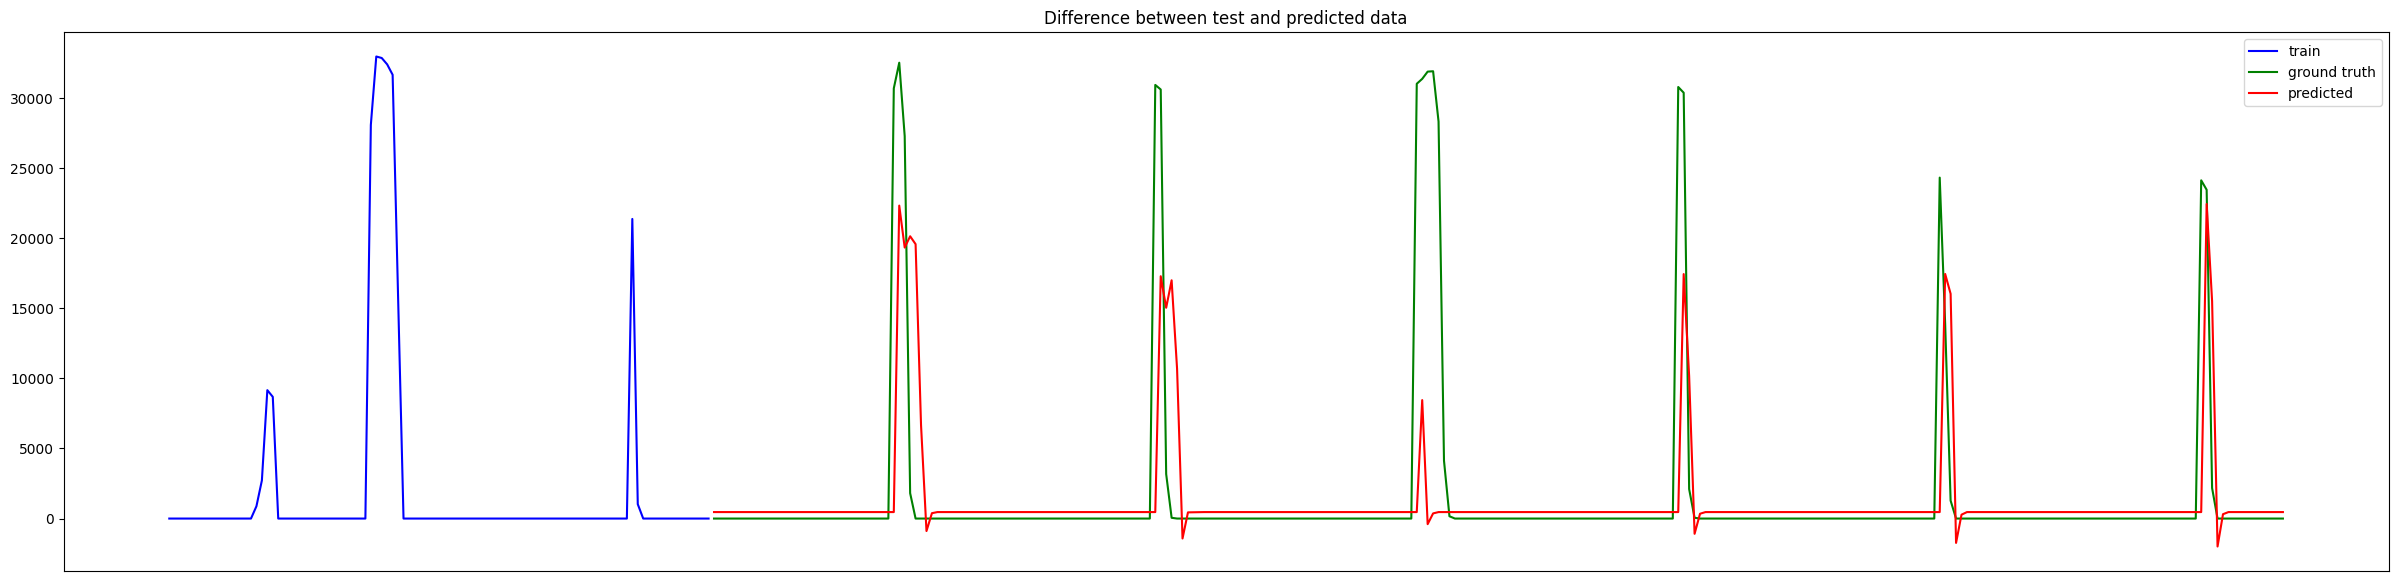

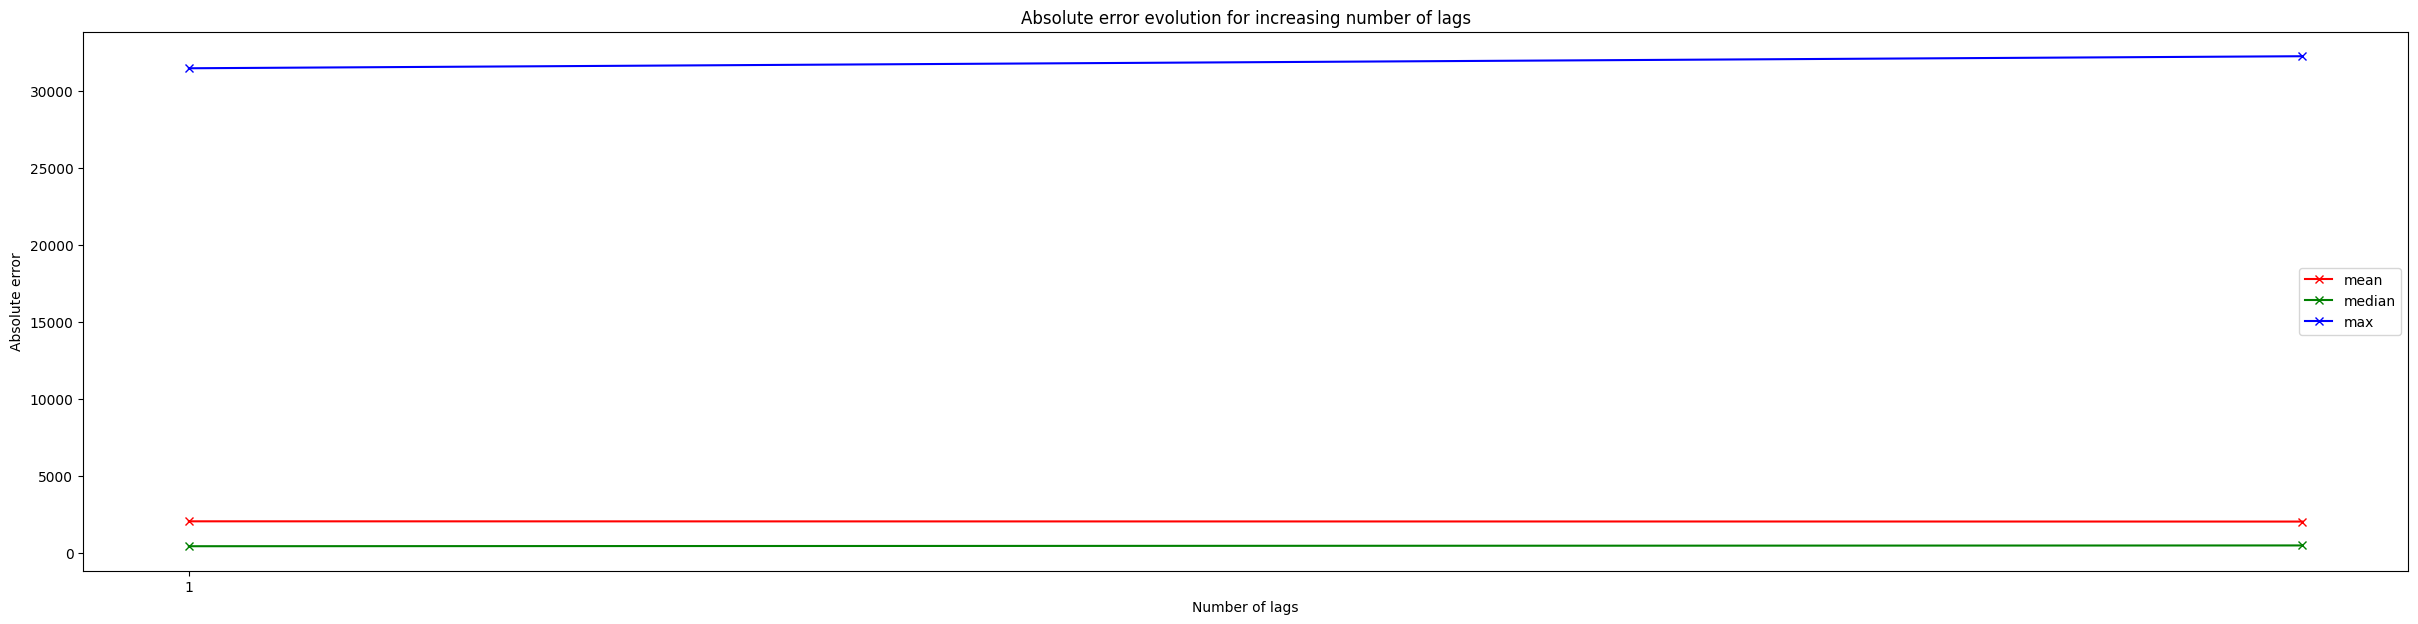

Battery discharging


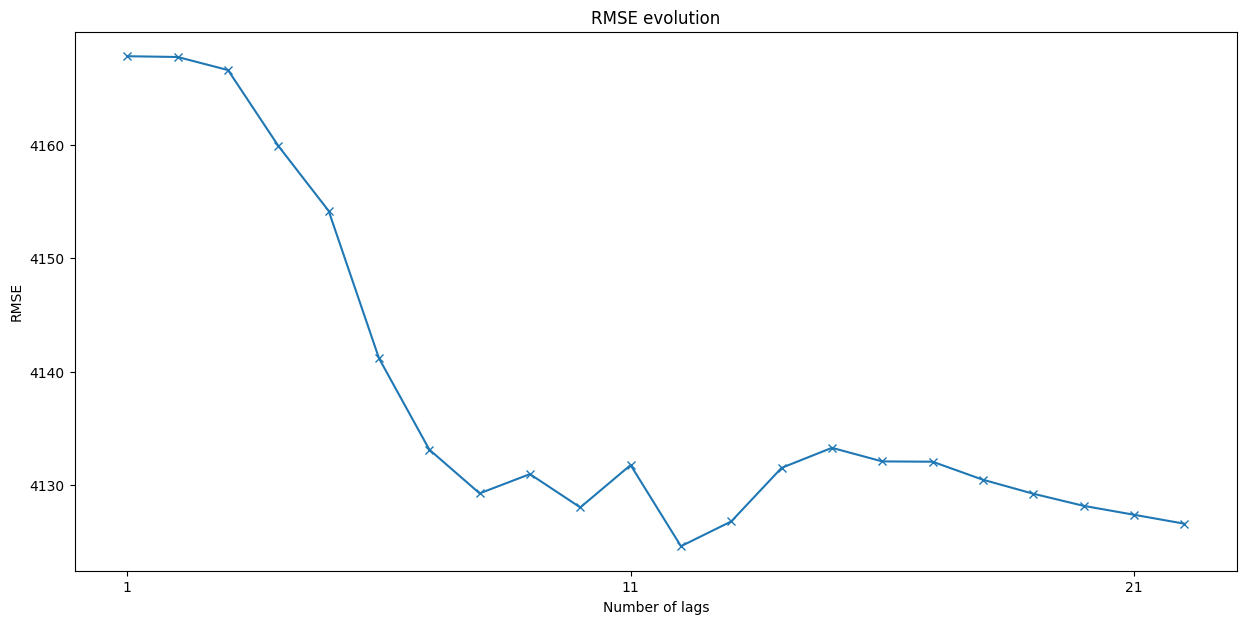

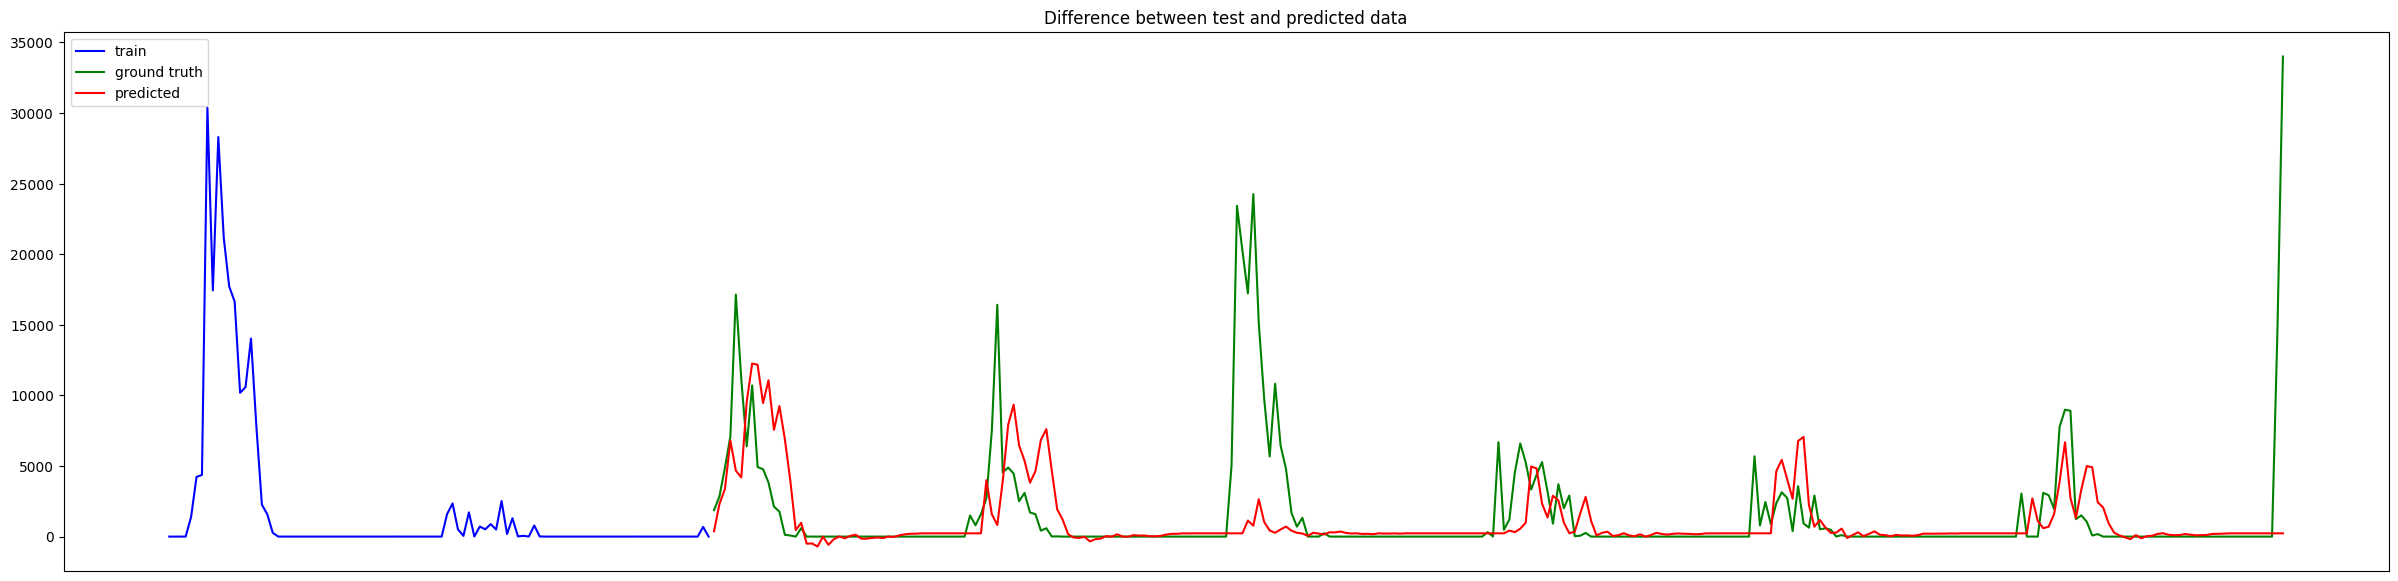

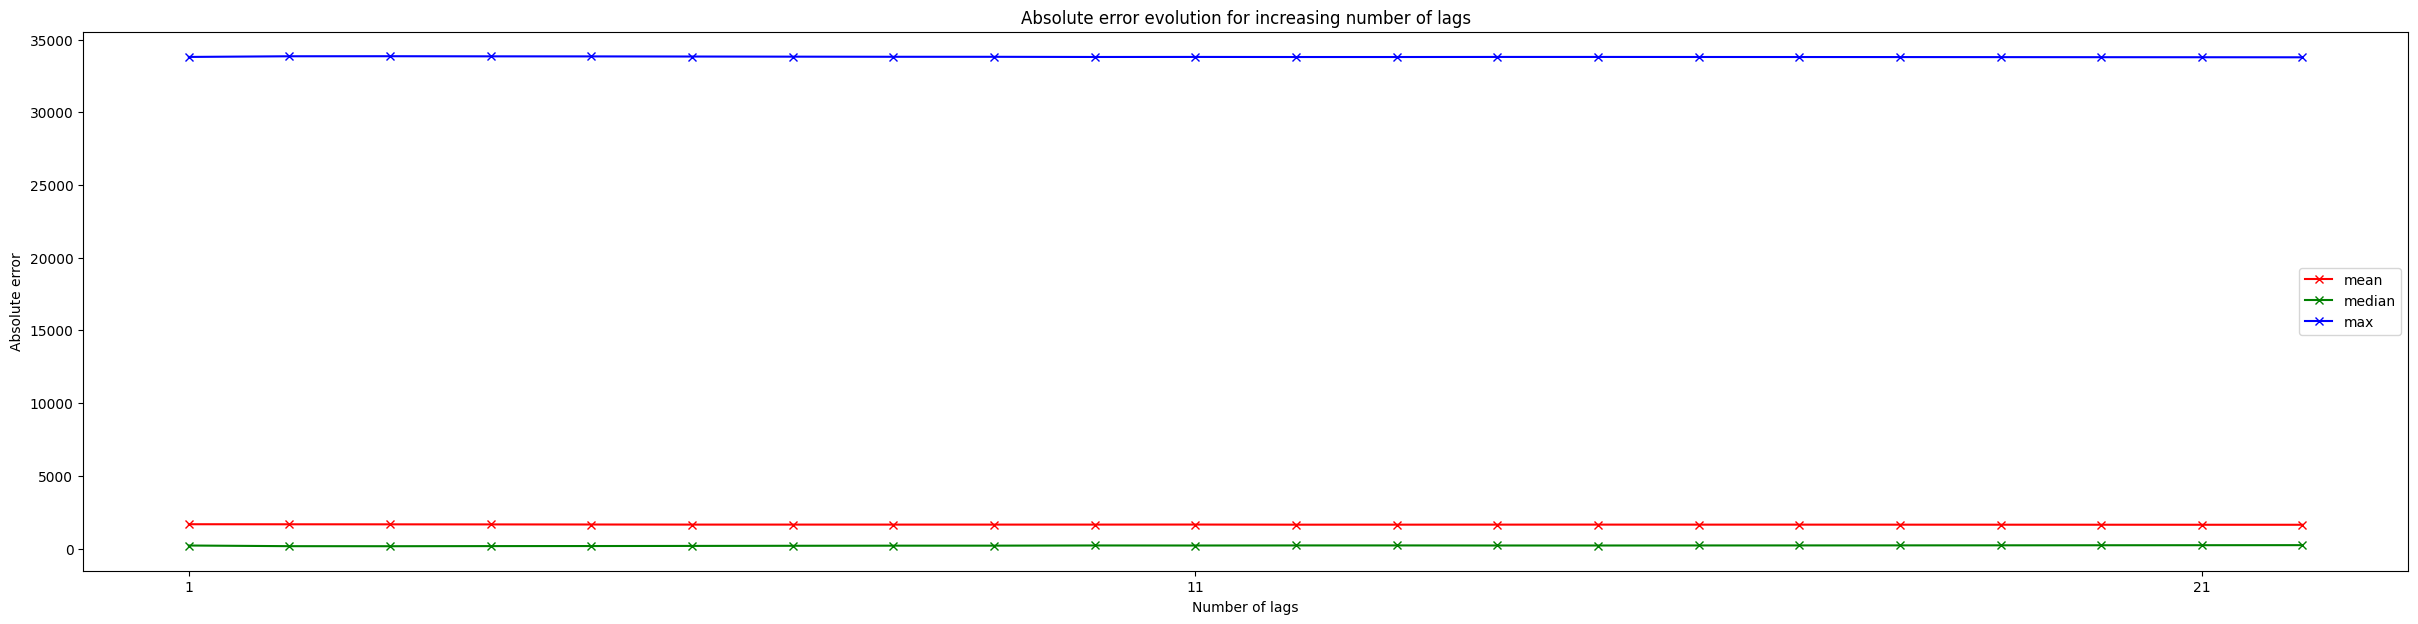

In [595]:
for column in columns:
    train_and_evaluate(column)